In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
submission_df = pd.read_csv("/kaggle/input/playground-series-s4e6/sample_submission.csv")
train_df = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")

### data import

In [298]:
submission_df = pd.read_csv("./data/sample_submission.csv")
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [90]:
submission_df.head()

id    Target
0  76518  Graduate
1  76519  Graduate
2  76520  Graduate
3  76521  Graduate
4  76522  Graduate

In [91]:
train_df.head()

id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   
2                           137.0            1                       3  ...   
3                           131.0            1                      19  ...   
4                           132.0            1                      19  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    6   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    8   
4                                    0                                    7   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       9   
2                                       0   
3                                      11   
4                                      12   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         12.428571   
1                                    0                          0.000000   
2                                    0                          0.000000   
3                                    7                         12.820000   
4                                    6                         12.933333   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP    Target  
0             0.6  2.02  Graduate  
1             0.6  2.02   Dropout  
2             0.3 -0.92   Dropout  
3             0.6  2.02  Enrolled  
4             2.6  0.32  Graduate  

[5 rows x 38 columns]

In [92]:
test_df.head()

id  Marital status  Application mode  Application order  Course  \
0  76518               1                 1                  1    9500   
1  76519               1                 1                  1    9238   
2  76520               1                 1                  1    9238   
3  76521               1                44                  1    9147   
4  76522               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           141.0            1                       3  ...   
1                           128.0            1                       1  ...   
2                           118.0            1                       1  ...   
3                           130.0            1                       1  ...   
4                           110.0            1                       1  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    8   
1                                    0                                    6   
2                                    0                                    6   
3                                    3                                    8   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                      11   
3                                      14   
4                                       9   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.500000   
2                                    5                         11.000000   
3                                    5                         11.000000   
4                                    4                         10.666667   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               13.9   
1                                               0               11.1   
2                                               0               15.5   
3                                               0                8.9   
4                                               2                7.6   

   Inflation rate   GDP  
0            -0.3  0.79  
1             0.6  2.02  
2             2.8 -4.06  
3             1.4  3.51  
4             2.6  0.32  

[5 rows x 37 columns]

## 1. Setting

In [312]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 2000
import os
import pickle

plt.rcParams['figure.dpi'] = 100

sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
sns_c

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

### UCI 원본 데이터
- feature별 unique 데이터의 meta data 확인을 위한 원본 데이터 임포트
   - unique 데이터의 양식이 다양해서 정리하기 힘듦

In [8]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo

student_data = fetch_ucirepo(id=697)
feature_info = student_data.variables
feature_info.head()

name     role     type     demographic  \
0              Marital Status  Feature  Integer  Marital Status   
1            Application mode  Feature  Integer            None   
2           Application order  Feature  Integer            None   
3                      Course  Feature  Integer            None   
4  Daytime/evening attendance  Feature  Integer            None   

                                         description units missing_values  
0  1 – single 2 – married 3 – widower 4 – divorce...  None             no  
1  1 - 1st phase - general contingent 2 - Ordinan...  None             no  
2  Application order (between 0 - first choice; a...  None             no  
3  33 - Biofuel Production Technologies 171 - Ani...  None             no  
4                            1 – daytime 0 - evening  None             no

## 2. EDA

### (1) Data Info

In [10]:
print(f'''
length of train data set : {len(train_df)}
length of test data set : {len(test_df)}
''')


length of train data set : 76518
length of test data set : 51012



In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

### (2) Length of Features

In [13]:
print(f'''
length of train data Featrues : {len(train_df.columns)}
length of test data Featrues : {len(test_df.columns)}
''')


length of train data Featrues : 38
length of test data Featrues : 37



In [14]:
print(f'''
train data Featrues - test data Features = {set(train_df.columns).difference(set(test_df.columns))}
''')


train data Featrues - test data Features = {'Target'}



### (3) Describe
- numeric featurea의 경우 스케일링 필요 : mean, std 값이 feature 마다 다름

In [15]:
train_df.describe()

id  Marital status  Application mode  Application order  \
count  76518.000000    76518.000000      76518.000000       76518.000000   
mean   38258.500000        1.111934         16.054419           1.644410   
std    22088.988286        0.441669         16.682337           1.229645   
min        0.000000        1.000000          1.000000           0.000000   
25%    19129.250000        1.000000          1.000000           1.000000   
50%    38258.500000        1.000000         17.000000           1.000000   
75%    57387.750000        1.000000         39.000000           2.000000   
max    76517.000000        6.000000         53.000000           9.000000   

             Course  Daytime/evening attendance  Previous qualification  \
count  76518.000000                76518.000000            76518.000000   
mean    9001.286377                    0.915314                3.658760   
std     1803.438531                    0.278416                8.623774   
min       33.000000                    0.000000                1.000000   
25%     9119.000000                    1.000000                1.000000   
50%     9254.000000                    1.000000                1.000000   
75%     9670.000000                    1.000000                1.000000   
max     9991.000000                    1.000000               43.000000   

       Previous qualification (grade)   Nacionality  Mother's qualification  \
count                    76518.000000  76518.000000            76518.000000   
mean                       132.378766      1.226600               19.837633   
std                         10.995328      3.392183               15.399456   
min                         95.000000      1.000000                1.000000   
25%                        125.000000      1.000000                1.000000   
50%                        133.100000      1.000000               19.000000   
75%                        140.000000      1.000000               37.000000   
max                        190.000000    109.000000               44.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     76518.00000   
mean   ...                                         0.05796   
std    ...                                         0.40849   
min    ...                                         0.00000   
25%    ...                                         0.00000   
50%    ...                                         0.00000   
75%    ...                                         0.00000   
max    ...                                        12.00000   

       Curricular units 2nd sem (credited)  \
count                         76518.000000   
mean                              0.137053   
std                               0.933830   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                         76518.000000   
mean                              5.933414   
std                               1.627182   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               6.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                            76518.000000   
mean                                 7.234468   
std                                  3.503040   
min                                  0.000000   
25%                                  6.000000   
50%                                  7.000000   
75%                                  9.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                         765

In [16]:
test_df.describe()

id  Marital status  Application mode  Application order  \
count   51012.000000    51012.000000      51012.000000       51012.000000   
mean   102023.500000        1.109092         16.067102           1.648161   
std     14726.040303        0.438084         16.654196           1.235666   
min     76518.000000        1.000000          1.000000           0.000000   
25%     89270.750000        1.000000          1.000000           1.000000   
50%    102023.500000        1.000000         17.000000           1.000000   
75%    114776.250000        1.000000         39.000000           2.000000   
max    127529.000000        6.000000         53.000000           9.000000   

             Course  Daytime/evening attendance  Previous qualification  \
count  51012.000000                51012.000000            51012.000000   
mean    9026.304556                    0.918313                3.635007   
std     1751.328311                    0.273889                8.577250   
min       33.000000                    0.000000                1.000000   
25%     9119.000000                    1.000000                1.000000   
50%     9254.000000                    1.000000                1.000000   
75%     9670.000000                    1.000000                1.000000   
max     9991.000000                    1.000000               43.000000   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                    51012.000000  51012.00000            51012.000000   
mean                       132.328001      1.20009               19.913275   
std                         10.885679      3.26473               15.383823   
min                         95.000000      1.00000                1.000000   
25%                        125.000000      1.00000                1.000000   
50%                        133.100000      1.00000               19.000000   
75%                        139.000000      1.00000               37.000000   
max                        190.000000    109.00000               44.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                    51012.000000   
mean   ...                                        0.057810   
std    ...                                        0.403434   
min    ...                                        0.000000   
25%    ...                                        0.000000   
50%    ...                                        0.000000   
75%    ...                                        0.000000   
max    ...                                       12.000000   

       Curricular units 2nd sem (credited)  \
count                         51012.000000   
mean                              0.129283   
std                               0.877250   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                         51012.000000   
mean                              5.944131   
std                               1.599746   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               6.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                            51012.000000   
mean                                 7.274092   
std                                  3.433149   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                  9.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                         5101

### (4) Null Data
- null data 없음

In [17]:
print(f'''
null data of train data set : {np.sum(train_df.isnull().sum().values)}
null data of test data set : {np.sum(test_df.isnull().sum().values)}
''')


null data of train data set : 0
null data of test data set : 0



In [18]:
import missingno as msno

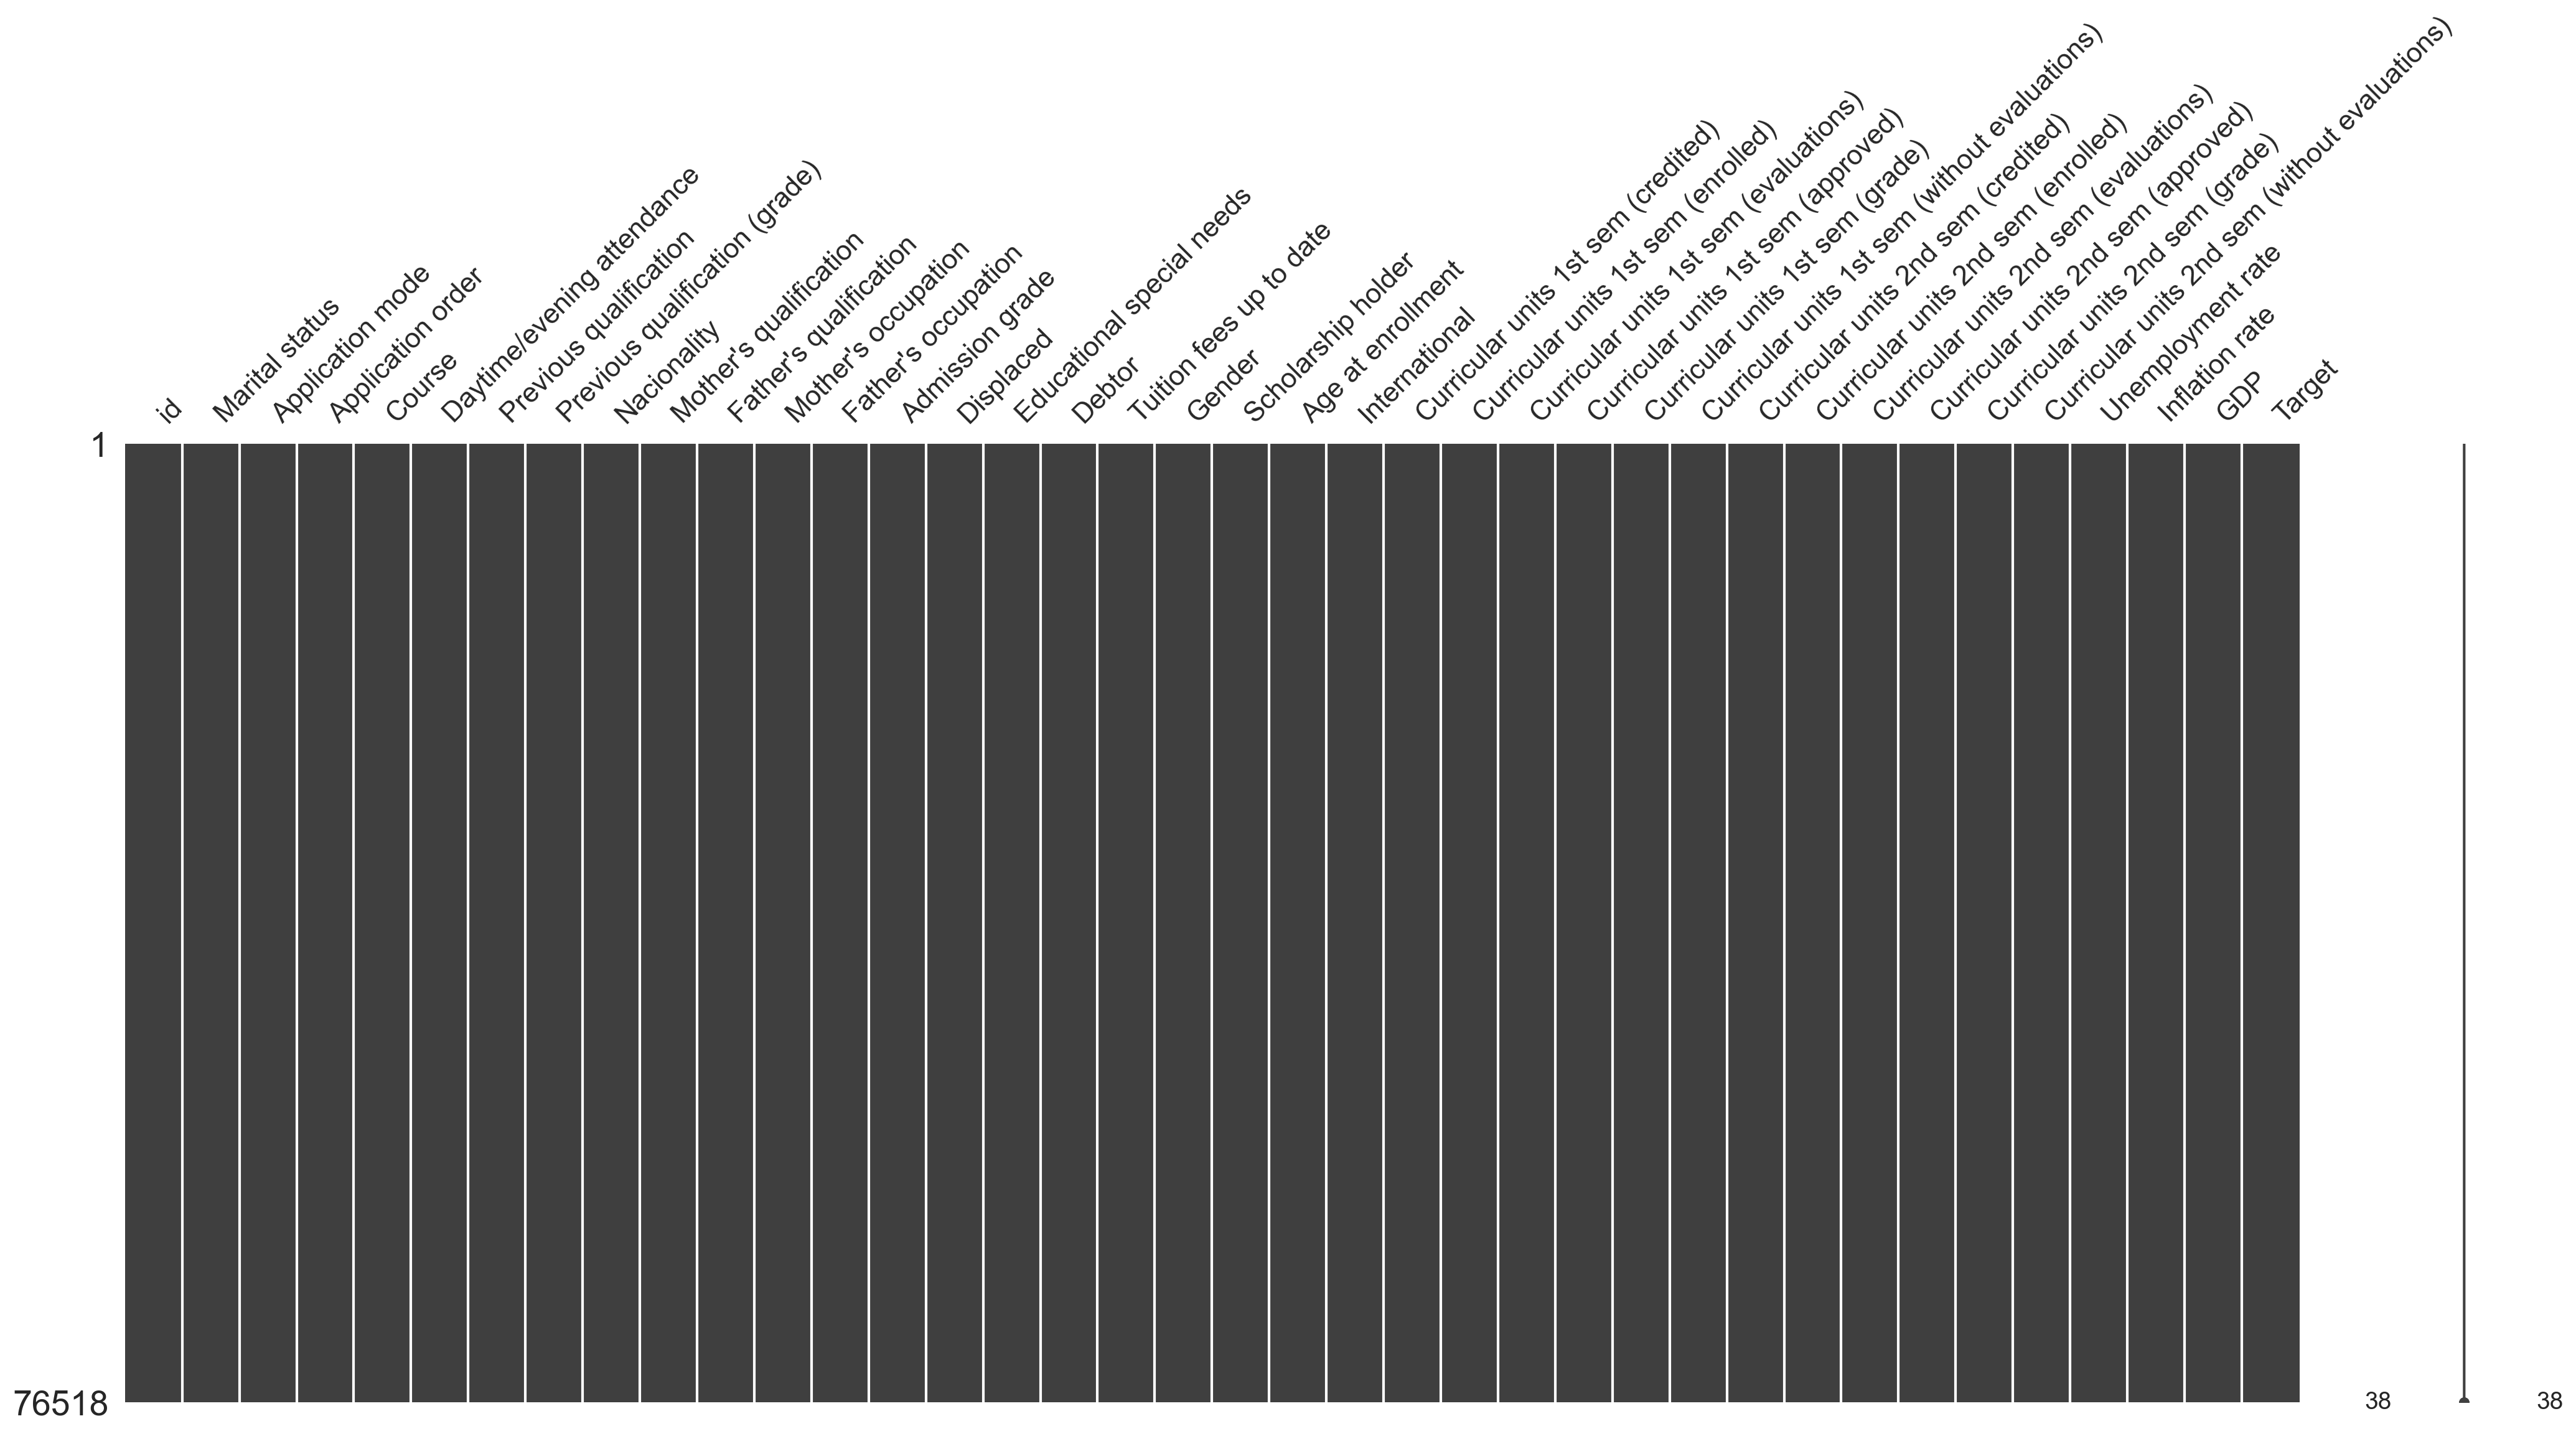

In [19]:
msno.matrix(train_df) ;

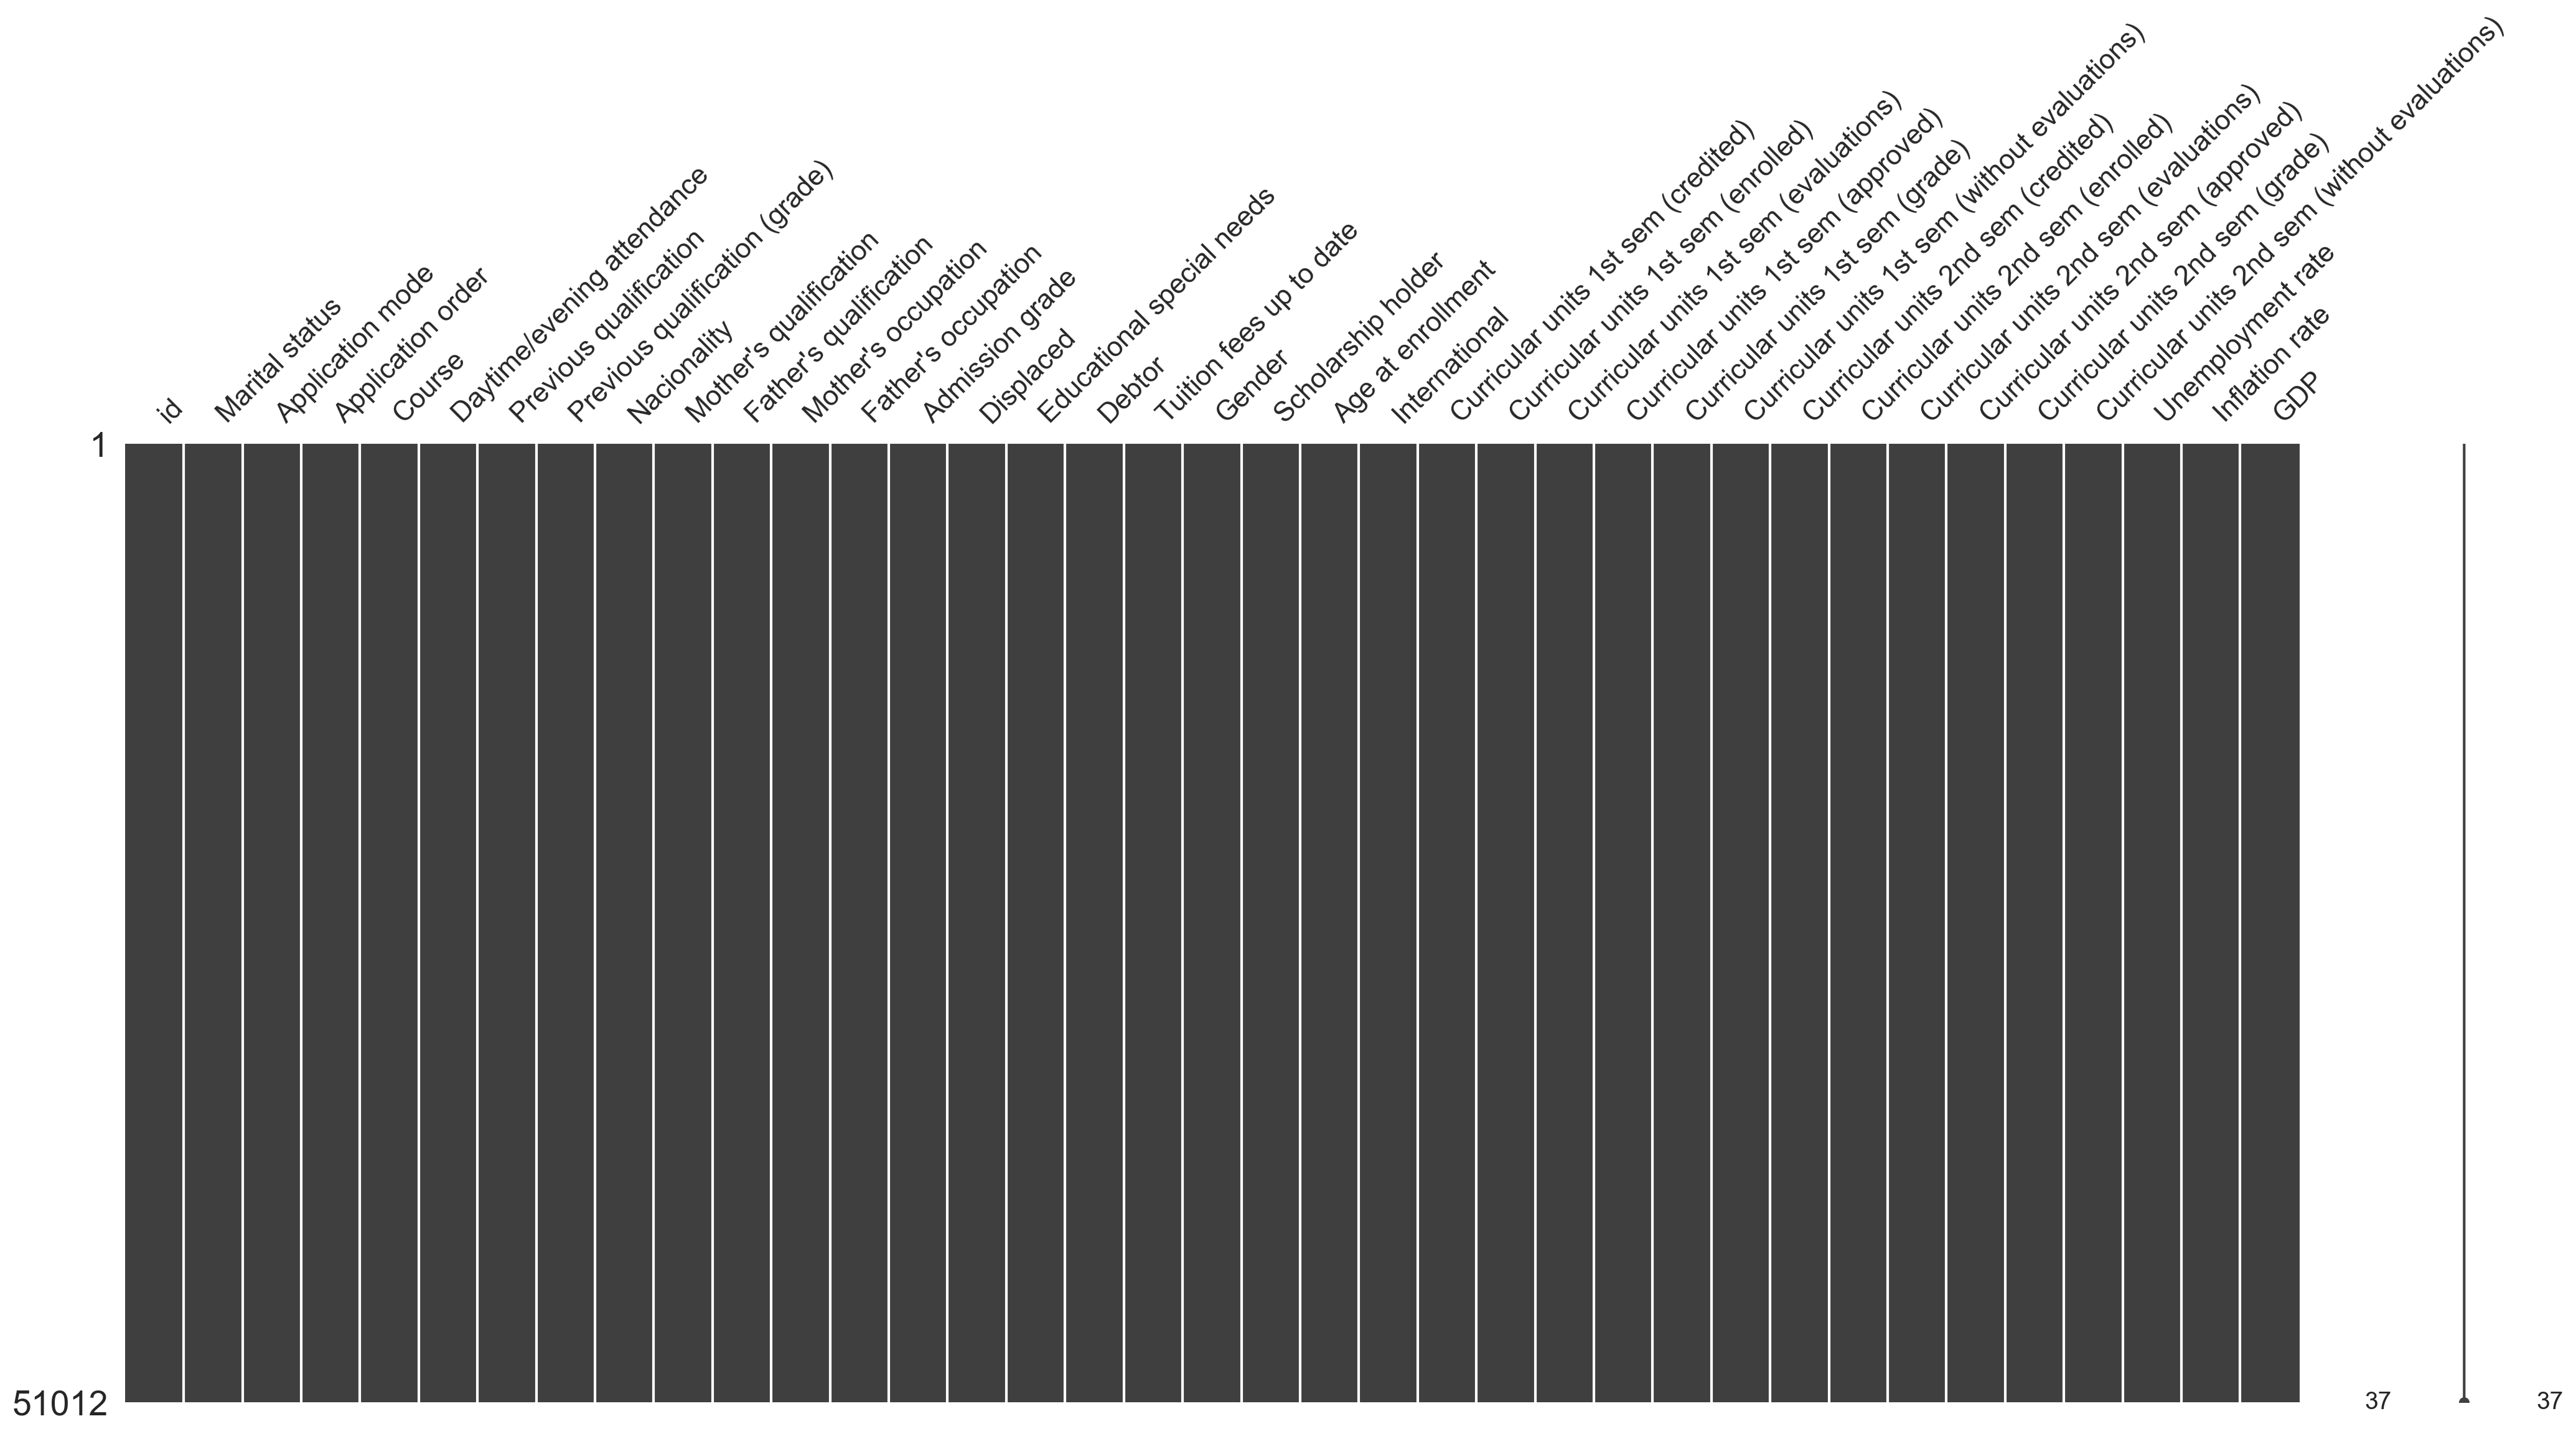

In [20]:
msno.matrix(test_df) ;

### (5) Unique Values
- feature 마다 유니크 값의 갯수가 다르다.
- 대부분 feature가 숫자형 데이터로 이루어져 있으나, 범주형 값을 숫자 데이터로 나타낸 것으로 보인다.
- Target feature의 유니트 데이터
   - Graduate, Dropout, Enrolled
   - **데이터의 종속변수는 다중 클래스에 해당한다.**

In [3]:
count_unique = []
for col in train_df.columns[1:] : 
    count_unique.append(pd.DataFrame({"count": len(train_df[col].value_counts().index)}, index=[col]))
    
train_count_unique_df = pd.concat(count_unique, axis=0)
train_count_unique_df

count
Marital status                                      6
Application mode                                   22
Application order                                   8
Course                                             19
Daytime/evening attendance                          2
Previous qualification                             21
Previous qualification (grade)                    110
Nacionality                                        18
Mother's qualification                             35
Father's qualification                             39
Mother's occupation                                40
Father's occupation                                56
Admission grade                                   668
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International                                       2
Curricular units 1st sem (credited)                21
Curricular units 1st sem (enrolled)                24
Curricular units 1st sem (evaluations)             36
Curricular units 1st sem (approved)                23
Curricular units 1st sem (grade)                 1206
Curricular units 1st sem (without evaluations)     12
Curricular units 2nd sem (credited)                20
Curricular units 2nd sem (enrolled)                22
Curricular units 2nd sem (evaluations)             31
Curricular units 2nd sem (approved)                21
Curricular units 2nd sem (grade)                 1234
Curricular units 2nd sem (without evaluations)     11
Unemployment rate                                  11
Inflation rate                                     13
GDP                                                11
Target                                              3

In [22]:
train_df["Target"].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

### (6) Distribution of Features
- numeric_features : 'Previous qualification (grade)','Admission grade','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)'
- categorical_features : numeric_features 를 제외한 나머지 features
- cate features는 대부분 데이터가 특정 값에 편향되어 있다. : 불균형, 비대칭 데이터로 샘플링을 적용해야 할까?
   - 불균형 문제의 해결방법
      - 언더 샘플링 under sampling : 다수 클래스 데이터 일부만 사용
      - 오버 샘플링 over sampling : 소수 클래스 데이터를 증가 시켜서 사용
      - 복합 샘플링 combining over and under sampling
- 데이터 셋은 실수형 feature, 정수형 feature, 범주형 feature로 이루어져 있다.
   - 나이브 베이즈 모델을 사용하면 데이터의 유형에 따라서 다른 모델로 fitting 한 후 합할 수 있다. 

In [4]:
def get_feature_desc(col) : 
    
    '''
    UCI 패키지에서 feature 별 unique 데이터의 description을 반환하는 함수
    '''
    
    desc = feature_info.query("name == @col")["description"].values[0]
    
    return desc

### feature의 unique data 분포

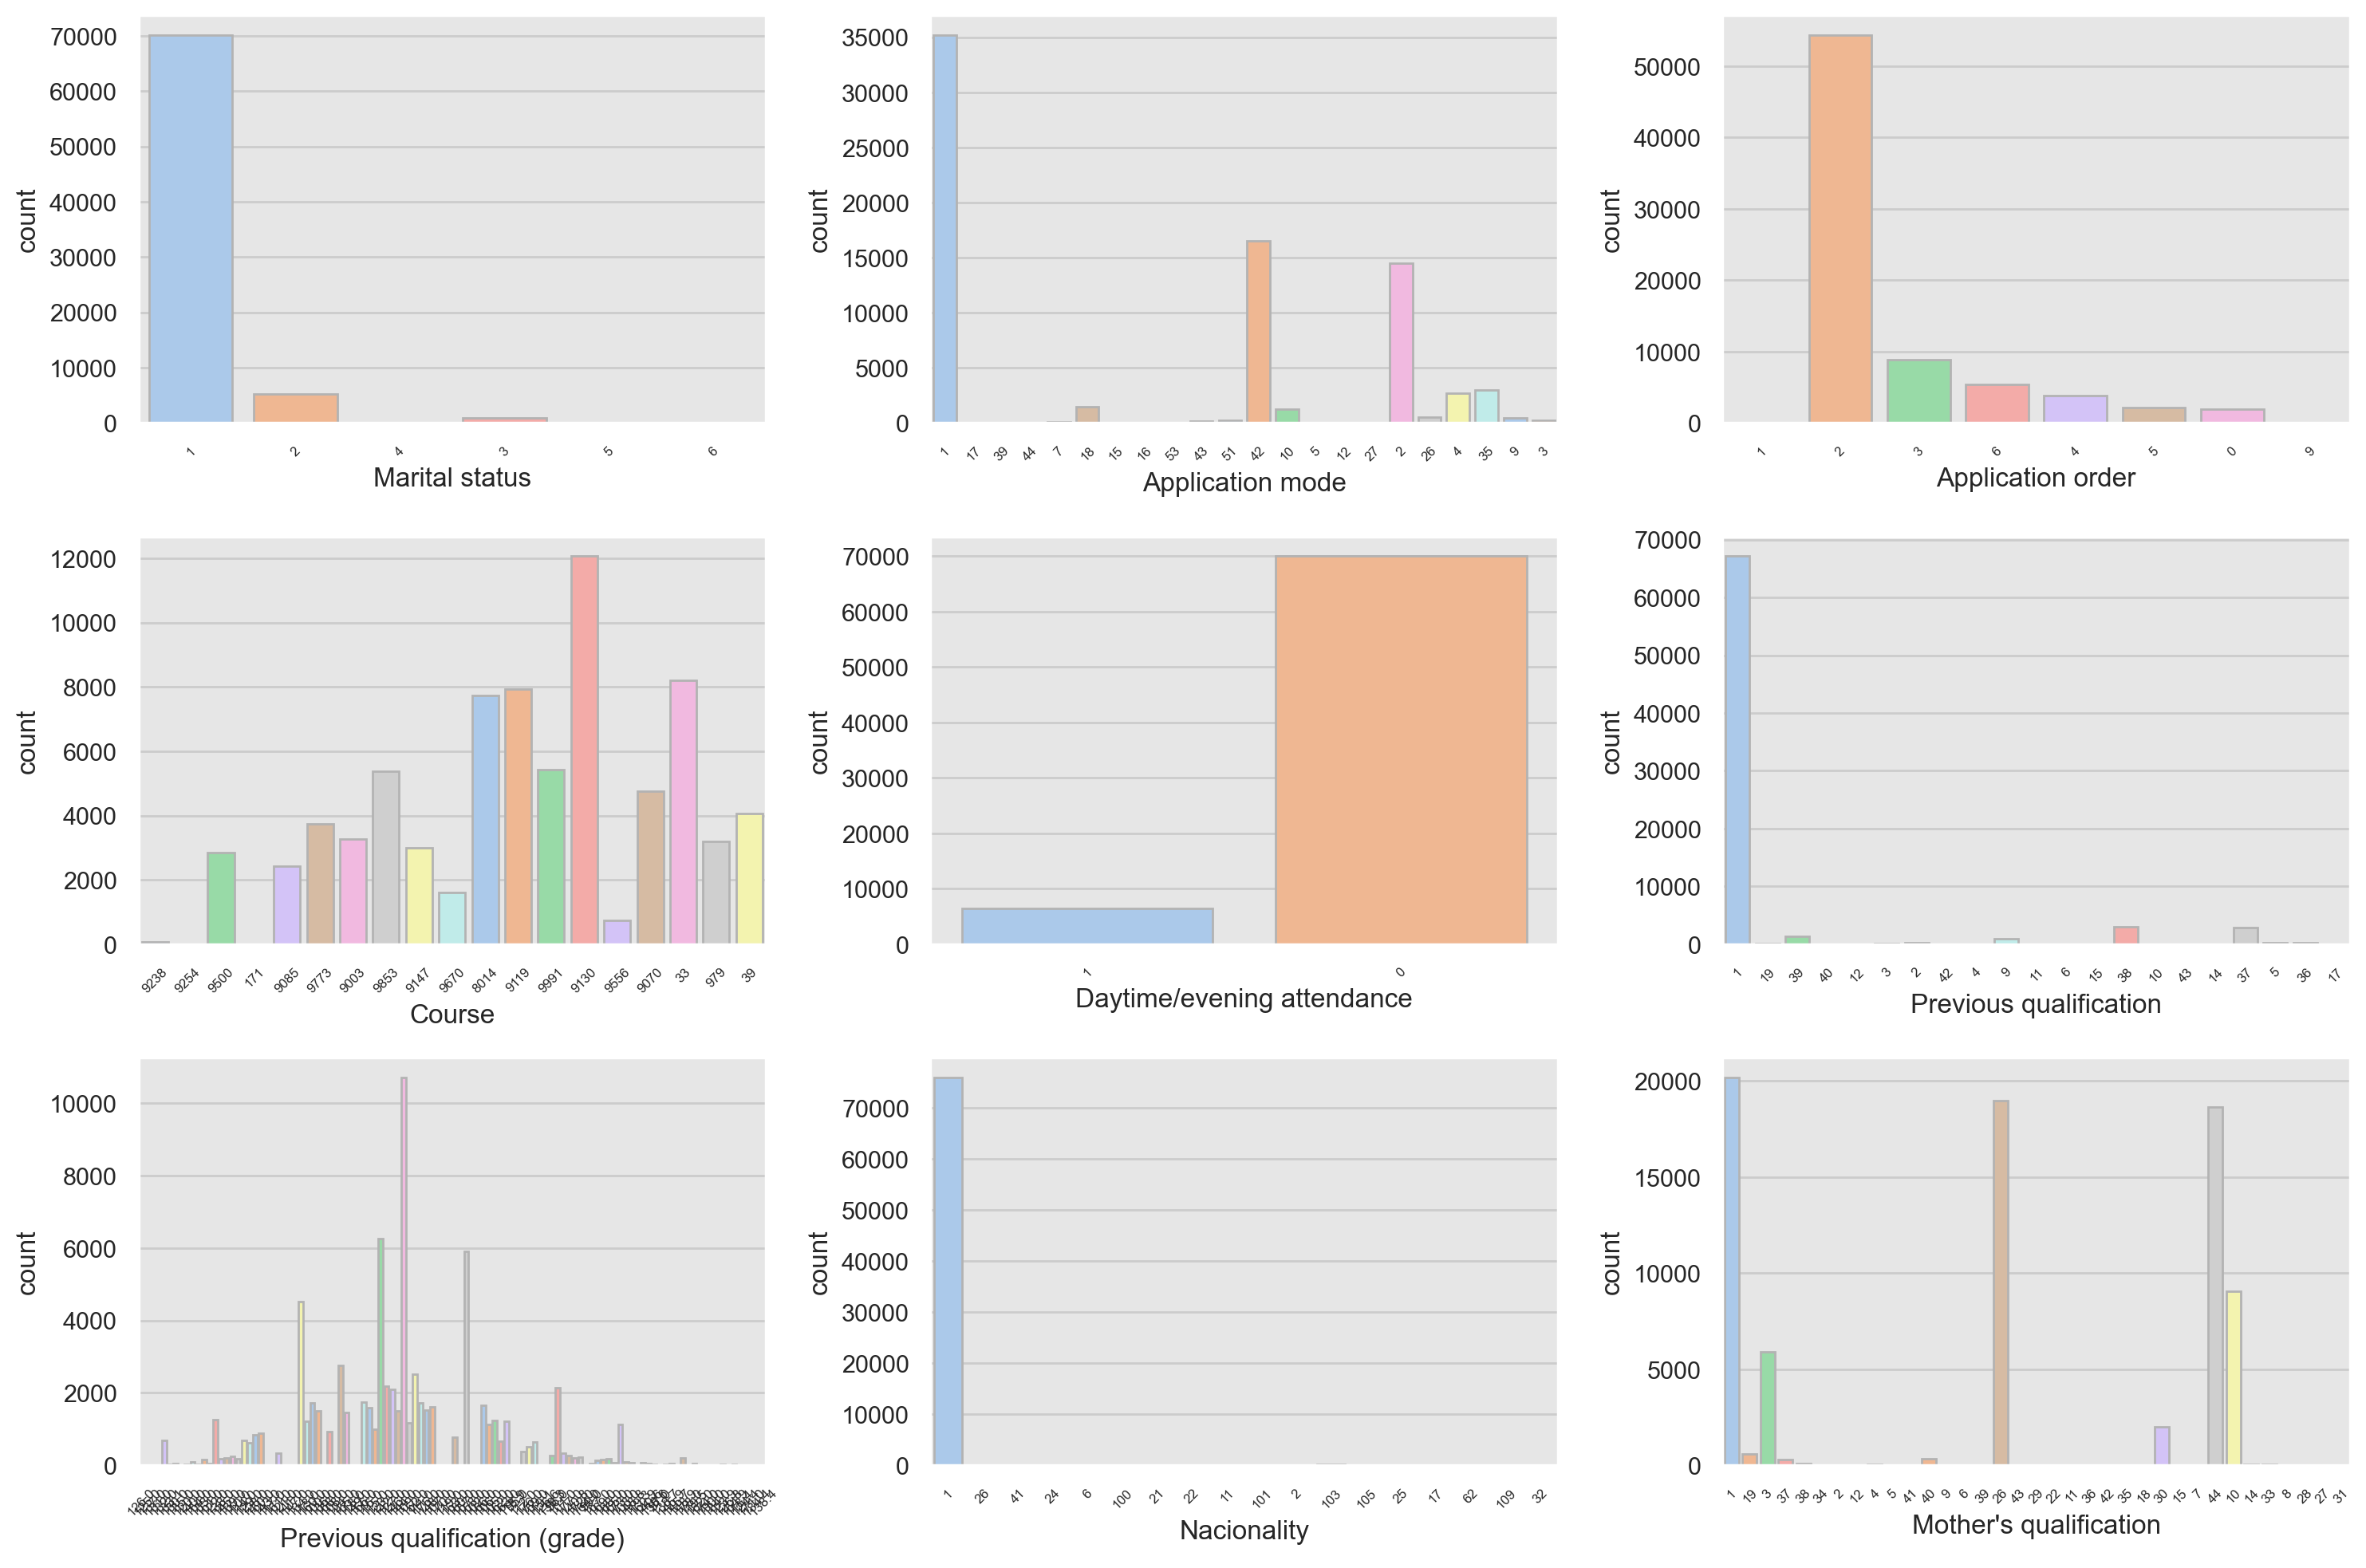

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[1:10]) : 
    ax = axes[i]
    g = sns.countplot(
        data=train_df,
        x=col,
        palette="pastel",
        edgecolor=".7",
        ax=ax
    )
    g.set_xticklabels(labels=train_df[col].unique(), rotation=45, fontsize=6, ha="center")
fig.tight_layout() ; 

### unique data desc

In [24]:
get_feature_desc("Marital Status")

'1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated'

In [25]:
get_feature_desc("Course")

'33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)'

In [26]:
get_feature_desc("Nacionality")

'1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian'

### feature의 unique data 분포

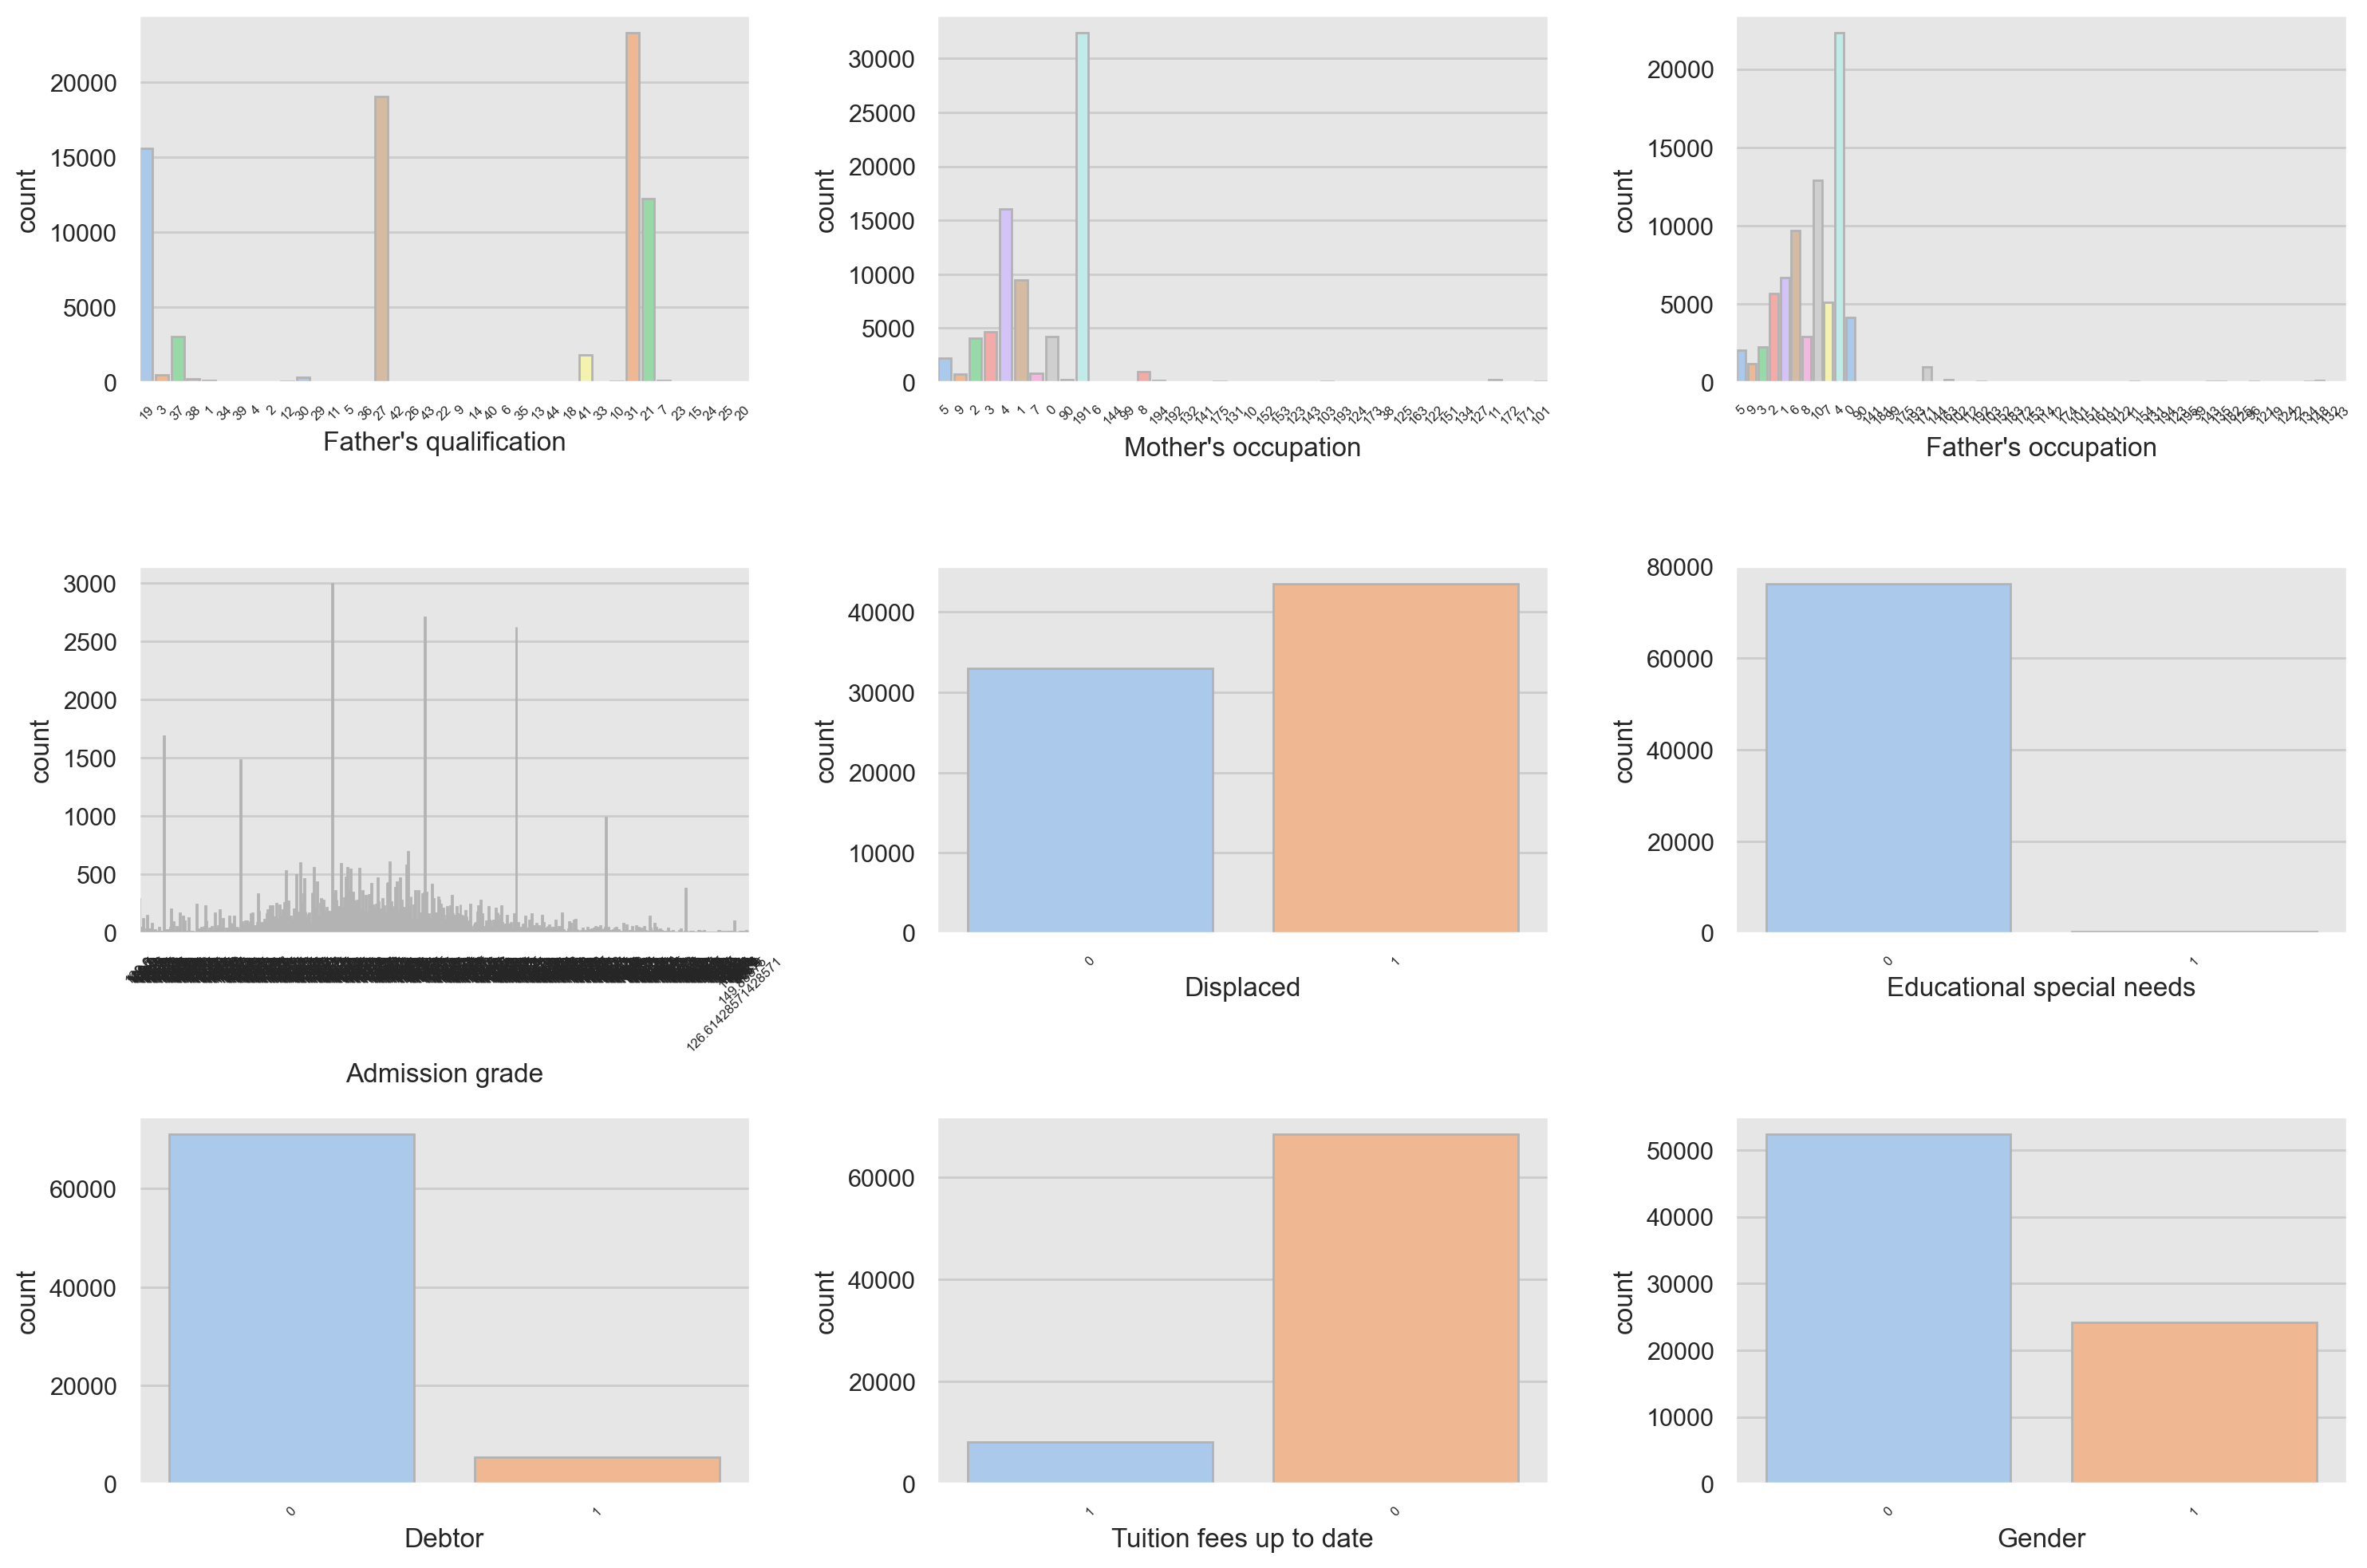

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[10:19]) : 
    ax = axes[i]
    g = sns.countplot(
        data=train_df,
        x=col,
        palette="pastel",
        edgecolor=".7",
        ax=ax
    )
    g.set_xticklabels(labels=train_df[col].unique(), rotation=45, fontsize=6, ha="center")
fig.tight_layout() ; 

### unique data desc

In [27]:
# 어머니의 직업

get_feature_desc("Mother's occupation")

'0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and 

In [28]:
# 난민여부

get_feature_desc("Displaced")

'1 – yes 0 – no'

In [29]:
# 채무여부

get_feature_desc("Debtor")

'1 – yes 0 – no'

### feature의 unique data 분포

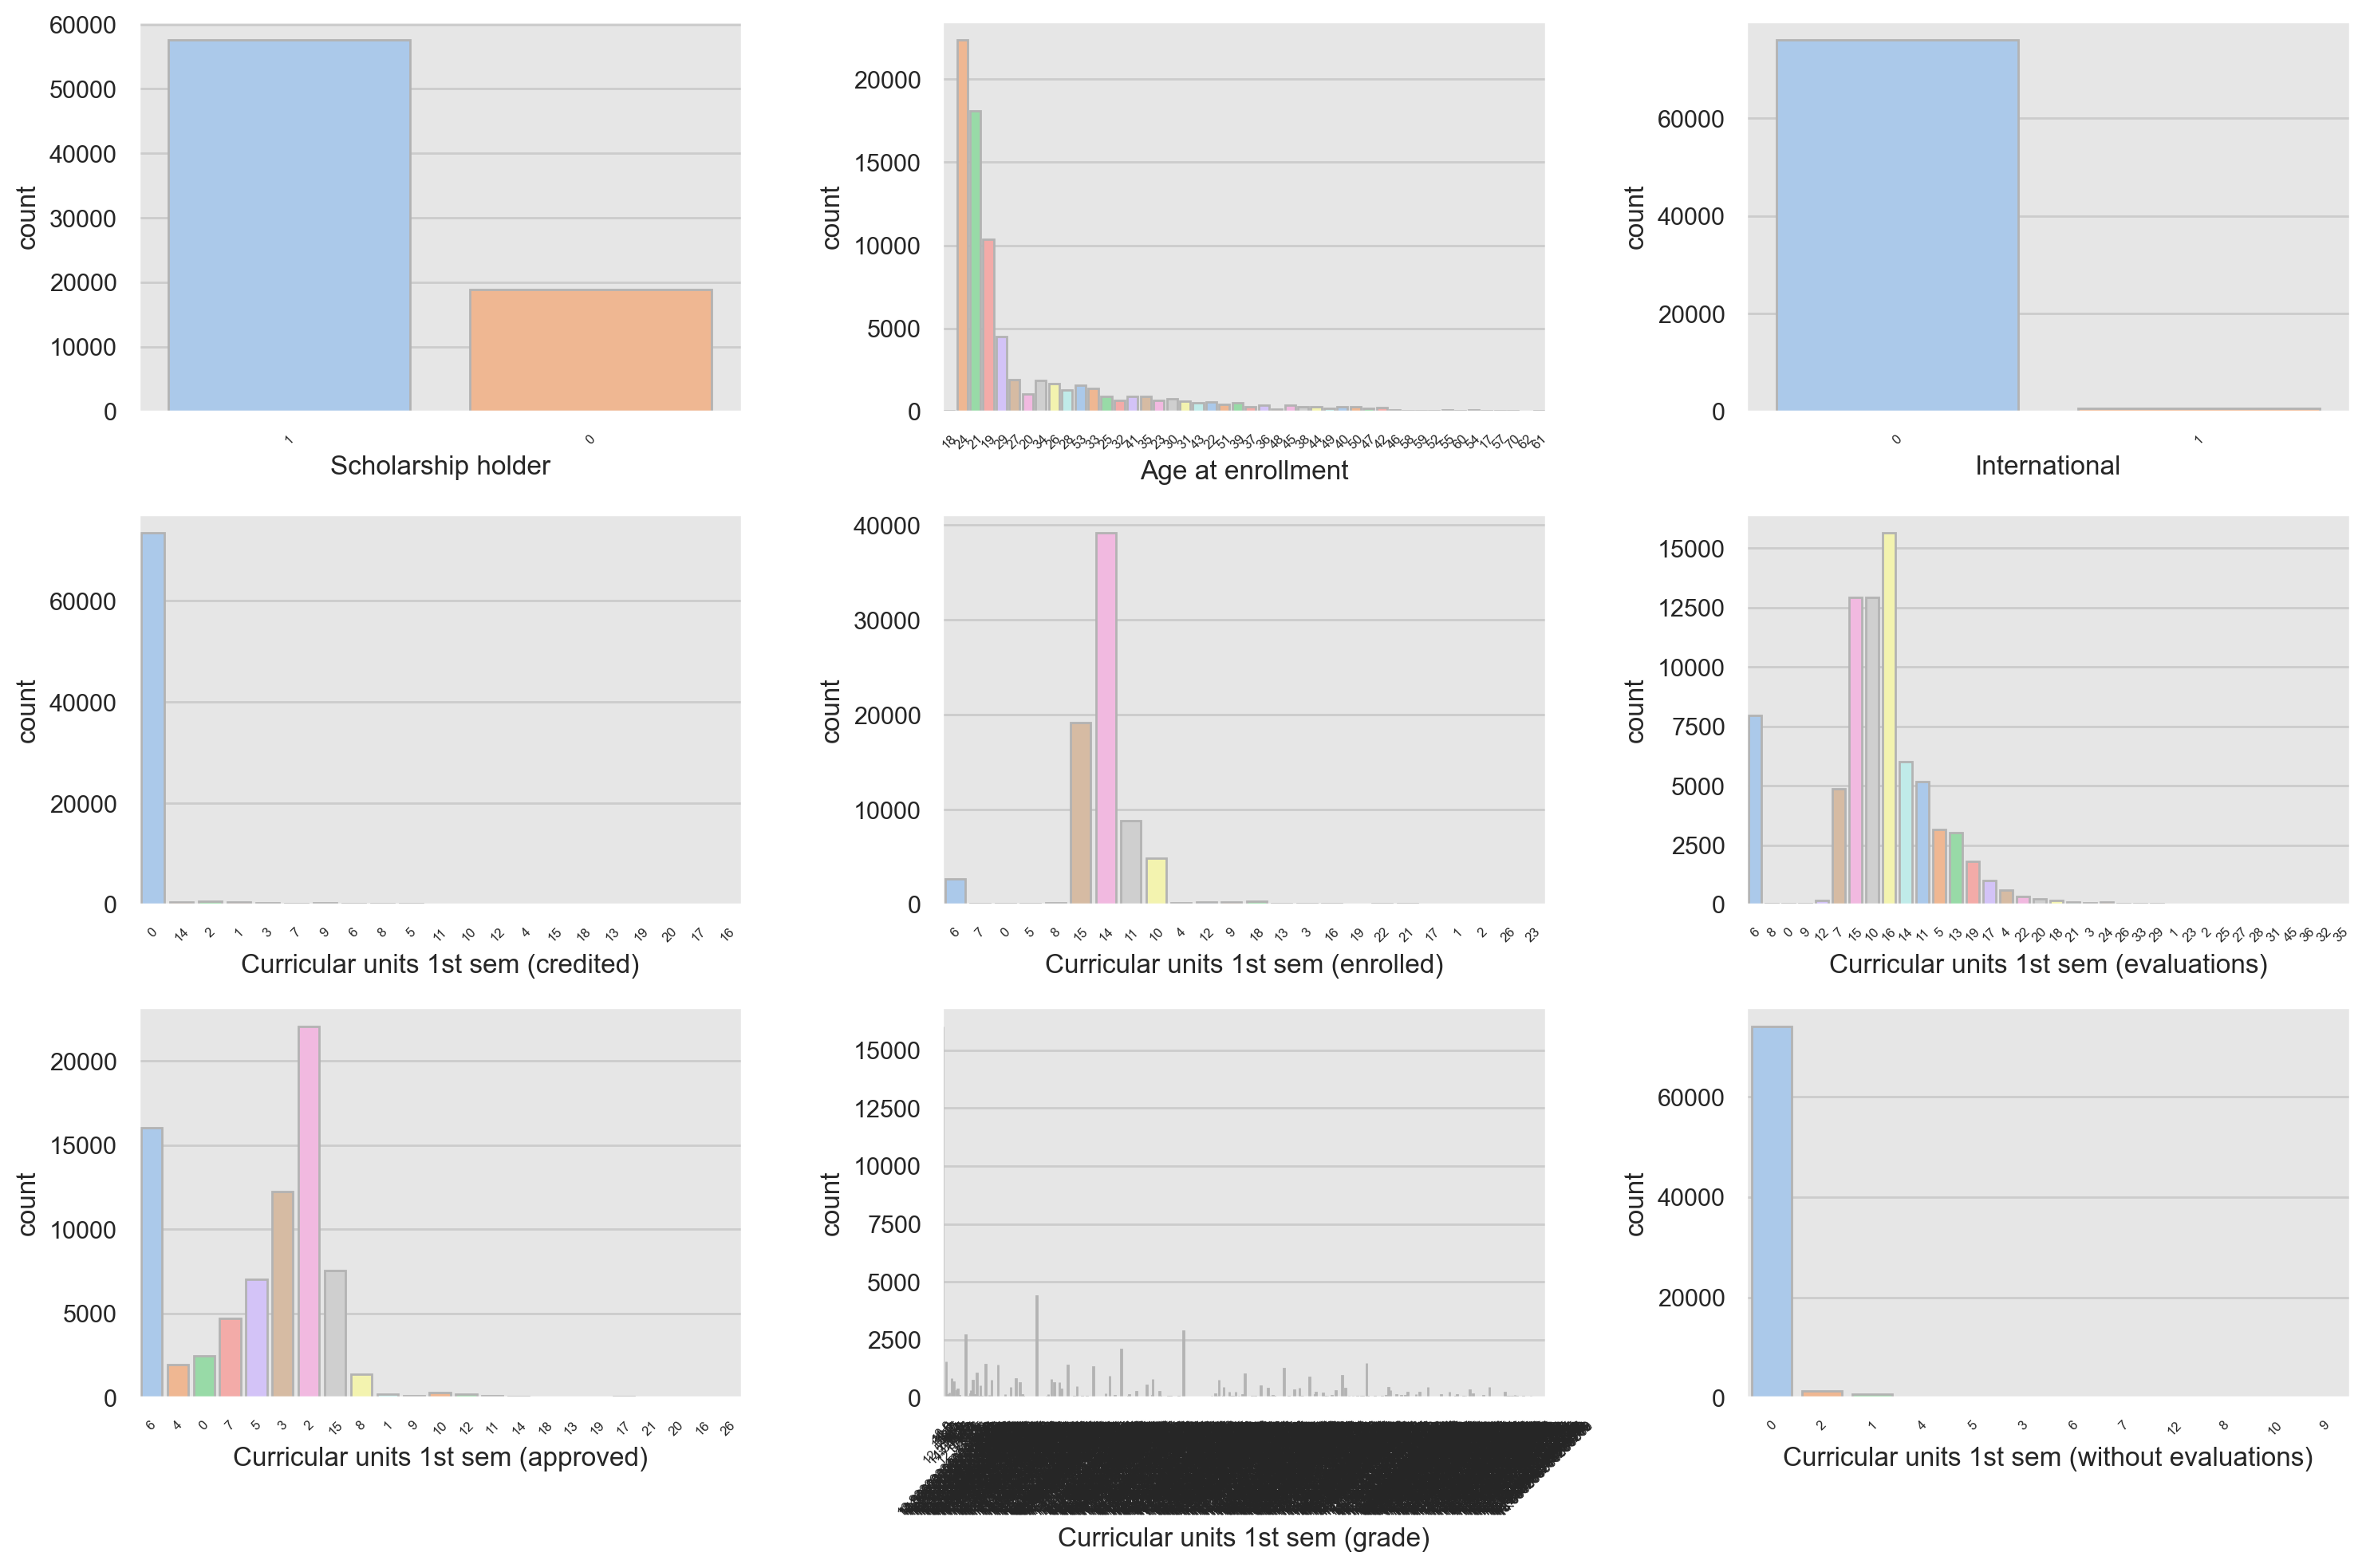

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[19:28]) : 
    ax = axes[i]
    g = sns.countplot(
        data=train_df,
        x=col,
        palette="pastel",
        edgecolor=".7",
        ax=ax
    )
    g.set_xticklabels(labels=train_df[col].unique(), rotation=45, fontsize=6, ha="center")
fig.tight_layout() ; 

### unique data desc

In [30]:
# 학위소지 여부

get_feature_desc("Scholarship holder")

'1 – yes 0 – no'

In [31]:
# 외국인 여부

get_feature_desc("International")

'1 – yes 0 – no'

In [32]:
# 교과단위 1학기 학점

get_feature_desc("Curricular units 1st sem (credited)")

'Number of curricular units credited in the 1st semester'

### feature의 unique data 분포

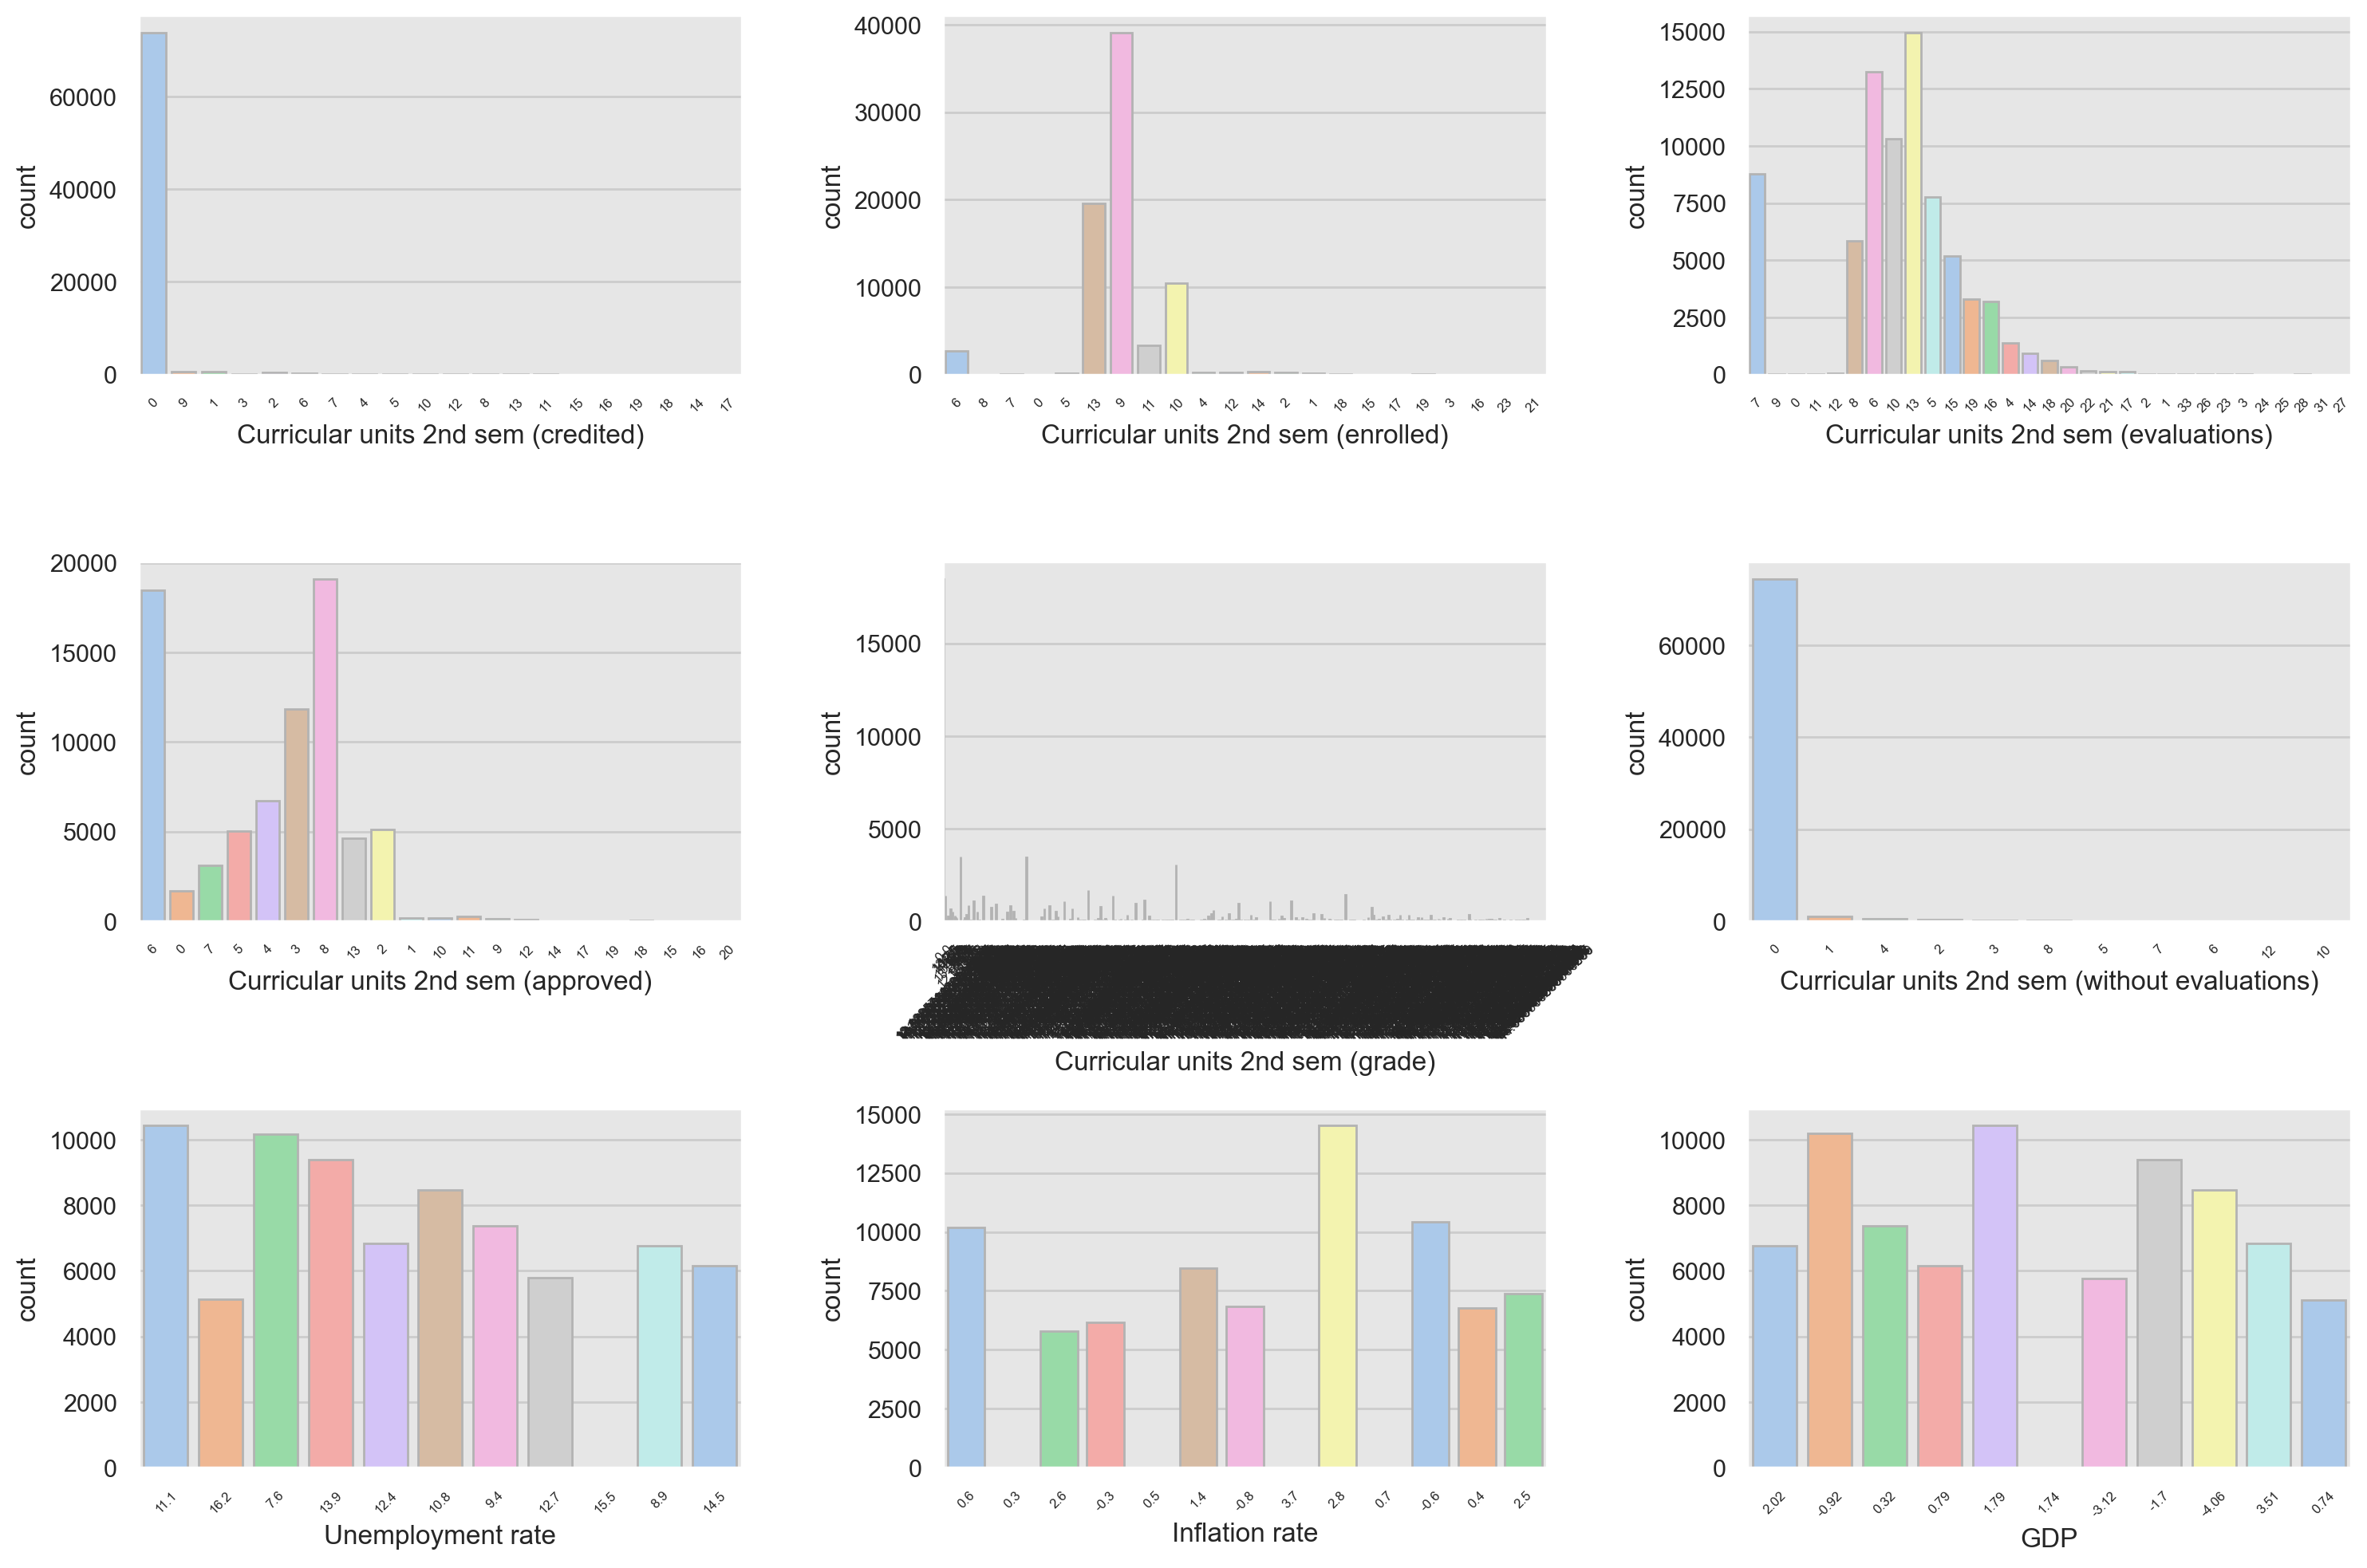

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[28:37]) : 
    ax = axes[i]
    g = sns.countplot(
        data=train_df,
        x=col,
        palette="pastel",
        edgecolor=".7",
        ax=ax
    )
    g.set_xticklabels(labels=train_df[col].unique(), rotation=45, fontsize=6, ha="center")
fig.tight_layout() ; 

### unique data desc

In [33]:
# 실업율

get_feature_desc("Unemployment rate")

'Unemployment rate (%)'

In [34]:
# 물가 상승률

get_feature_desc("Inflation rate")

'Inflation rate (%)'

In [35]:
# GDP : 국내총생산

get_feature_desc("GDP")

'GDP'

### Target feature의 unique data 분포
- 멀티 카테고리형 feature

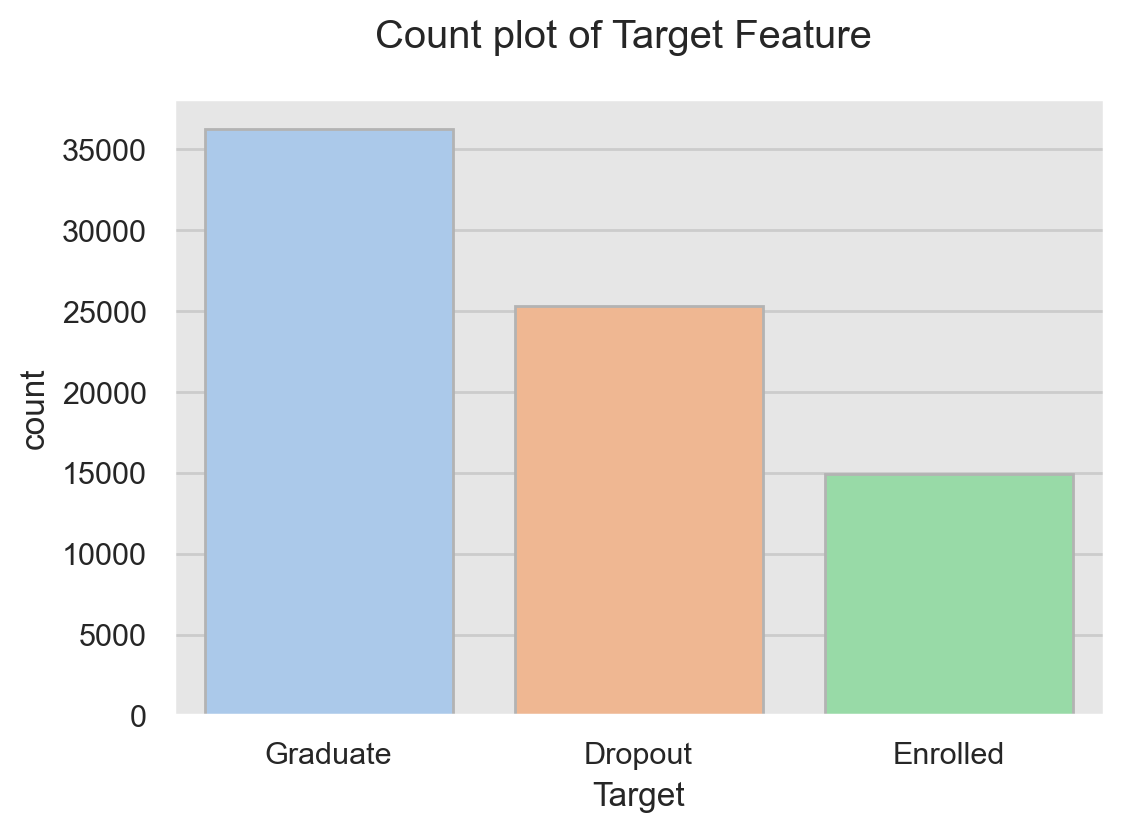

In [45]:
fig, ax = plt.subplots()
sns.countplot(
    data=train_df,
    x="Target",
    palette="pastel",
    edgecolor=".7"
) 
fig.suptitle("Count plot of Target Feature");

### (7) create numeric, categorical feature
- numeric features : 크기 비교가 가능한 데이터
   - grade features : 등급에 관한 컬럼
   - rage features : 비율에 과한 컬럼
   - age features : 나이에 관한 컬럼
   - curricular features : 교과과목의 수에 관한 컬럼
      - UCI 페이지에서 해당 컬럼의 유니크 값의 의미를 확인하면 범주형 데이터가 아닌 숫자 데이터라는 것을 알 수 있다.
      - "Number of curricular ~"

### grade features

In [5]:
grade_cols = list(train_df.filter(regex=".*grade").columns)

for col in grade_cols : 
    print(f'''
    * column : {col}
    * type   : {feature_info.query("name == @col")["type"].values[0]}
    * length : {len(train_df[col].unique())}
    * unique : {np.sort(train_df[col].unique()[:30])}
    ''')


    * column : Previous qualification (grade)
    * type   : Continuous
    * length : 110
    * unique : [110.  113.  114.  117.  120.  121.  122.  125.  126.  128.  129.  130.
 131.  132.  133.  133.1 134.  135.  137.  138.  139.  140.  141.  143.
 145.  147.  150.  151.  154.  161. ]
    

    * column : Admission grade
    * type   : Continuous
    * length : 668
    * unique : [100.  107.7 110.  114.3 119.7 119.8 120.1 120.8 121.5 122.6 126.1 126.8
 127.3 128.  130.  131.9 132.1 133.  133.1 133.9 134.5 134.9 135.1 140.
 141.8 142.8 144.7 147.5 154.  170. ]
    

    * column : Curricular units 1st sem (grade)
    * type   : Integer
    * length : 1206
    * unique : [ 0.         10.         10.5        10.8        10.92307692 11.
 11.25       11.6        11.66666667 11.77777778 11.8        11.83333333
 12.         12.25       12.4        12.58571429 12.59125    12.63333333
 12.75       12.93333333 12.96666667 13.         13.07571429 13.33333333
 13.3475     13.83333333 14.1666666

### ratio features

In [6]:
ratio_cols = list(train_df.filter(regex=".rate").columns) + ["GDP"]

for col in ratio_cols : 
    print(f'''
    * column : {col}
    * type   : {feature_info.query("name == @col")["type"].values[0]}
    * length : {len(train_df[col].unique())}
    * unique : {np.sort(train_df[col].unique()[:50])}
    ''')


    * column : Unemployment rate
    * type   : Continuous
    * length : 11
    * unique : [ 7.6  8.9  9.4 10.8 11.1 12.4 12.7 13.9 14.5 15.5 16.2]
    

    * column : Inflation rate
    * type   : Continuous
    * length : 13
    * unique : [-0.8 -0.6 -0.3  0.3  0.4  0.5  0.6  0.7  1.4  2.5  2.6  2.8  3.7]
    

    * column : GDP
    * type   : Continuous
    * length : 11
    * unique : [-4.06 -3.12 -1.7  -0.92  0.32  0.74  0.79  1.74  1.79  2.02  3.51]
    



### age features

In [7]:
age_cols = list(train_df.filter(regex="^Age").columns)

for col in age_cols : 
    print(f'''
    * column : {col}
    * type   : {feature_info.query("name == @col")["type"].values[0]}
    * length : {len(train_df[col].unique())}
    * unique : {np.sort(train_df[col].unique()[:50])}
    ''')


    * column : Age at enrollment
    * type   : Integer
    * length : 46
    * unique : [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 57 58 59 60 61 62 70]
    


### Number of curricular units features

In [8]:
curricular_cols = list(train_df.filter(regex="^Curricular").columns)

for col in curricular_cols : 
    print(f'''
    * column : {col}
    * type   : {feature_info.query("name == @col")["type"].values[0]}
    * length : {len(train_df[col].unique())}
    * unique : {np.sort(train_df[col].unique()[:30])}
    ''')


    * column : Curricular units 1st sem (credited)
    * type   : Integer
    * length : 21
    * unique : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
    

    * column : Curricular units 1st sem (enrolled)
    * type   : Integer
    * length : 24
    * unique : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 26]
    

    * column : Curricular units 1st sem (evaluations)
    * type   : Integer
    * length : 36
    * unique : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 33]
    

    * column : Curricular units 1st sem (approved)
    * type   : Integer
    * length : 23
    * unique : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 26]
    

    * column : Curricular units 1st sem (grade)
    * type   : Integer
    * length : 1206
    * unique : [ 0.         10.         10.5        10.8        10.92307692 11.
 11.25       11.6        11.66666667 11.77777778 11.8        11.833333

### numeric features

In [9]:
# set() : 중복 데이터 제거

numeric_features = grade_cols + ratio_cols + age_cols + curricular_cols
numeric_features = list(set(numeric_features))
numeric_features

['Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Curricular units 2nd sem (grade)',
 'Curricular units 1st sem (approved)',
 'GDP',
 'Curricular units 1st sem (enrolled)',
 'Previous qualification (grade)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Inflation rate',
 'Admission grade',
 'Age at enrollment']

### categorical features

In [10]:
categorical_features = list(set(train_df.columns).difference(numeric_features + ["id", "Target"]))
categorical_features

["Father's occupation",
 'Nacionality',
 'Educational special needs',
 'Debtor',
 'Daytime/evening attendance',
 "Mother's qualification",
 'Previous qualification',
 "Father's qualification",
 'Gender',
 'Application mode',
 "Mother's occupation",
 'Application order',
 'Marital status',
 'Displaced',
 'Course',
 'Tuition fees up to date',
 'International',
 'Scholarship holder']

### (8) Association
- indiv features와 target feature 간의 연관성 확인
- 데이터 타입에 따라서 상관관계 계산 함수를 다르게 적용
   - 연속형과 범주형(3개) : Point biserial correlation
   - 범주형(2개)과 범주형(2개) : Chi2 Test, Phi coefficient
   - 범주형(3개)과 범주형(3개) : Chi2 Test, Cramer's V coefficient
- 참고자료
   - https://eunhye-zz.tistory.com/29
   - https://recipesds.tistory.com/entry/%EA%B5%90%EC%B0%A8%EB%B6%84%EC%84%9D%EC%9D%98-%EC%99%84%EC%84%B1-Cross-Tabulation-%CF%87%C2%B2-Testing-Cramer-V-%EC%97%B0%EA%B4%80%EB%8F%84

### temp df

In [13]:
# Target data Encoded

mapper = {"Graduate": 0, "Dropout": 1, "Enrolled": 2}
encoded_target = train_df["Target"].map(mapper)

# temp df
temp_train_df = train_df.copy()
temp_train_df["Target"] = encoded_target
temp_train_df = temp_train_df.drop(["id"], axis=1) # data index remove
temp_train_df["Target"].unique()

array([0, 1, 2], dtype=int64)

### numeric features와 Target의 correlation
- Target이 3개의 범주형 데이터로 이루어져 있으므로 polyserial correlation 방법을 사용하려고 했으나 구현 방법을 찾지 못함. 대신 연속형과 범주형 2개 데이터의 상관관계를 구하는 pointbiserialr 패키지를 사용하여 계산
   - pearson 방법으로 계산한 것과 같음

In [14]:
from scipy import stats
from itertools import product

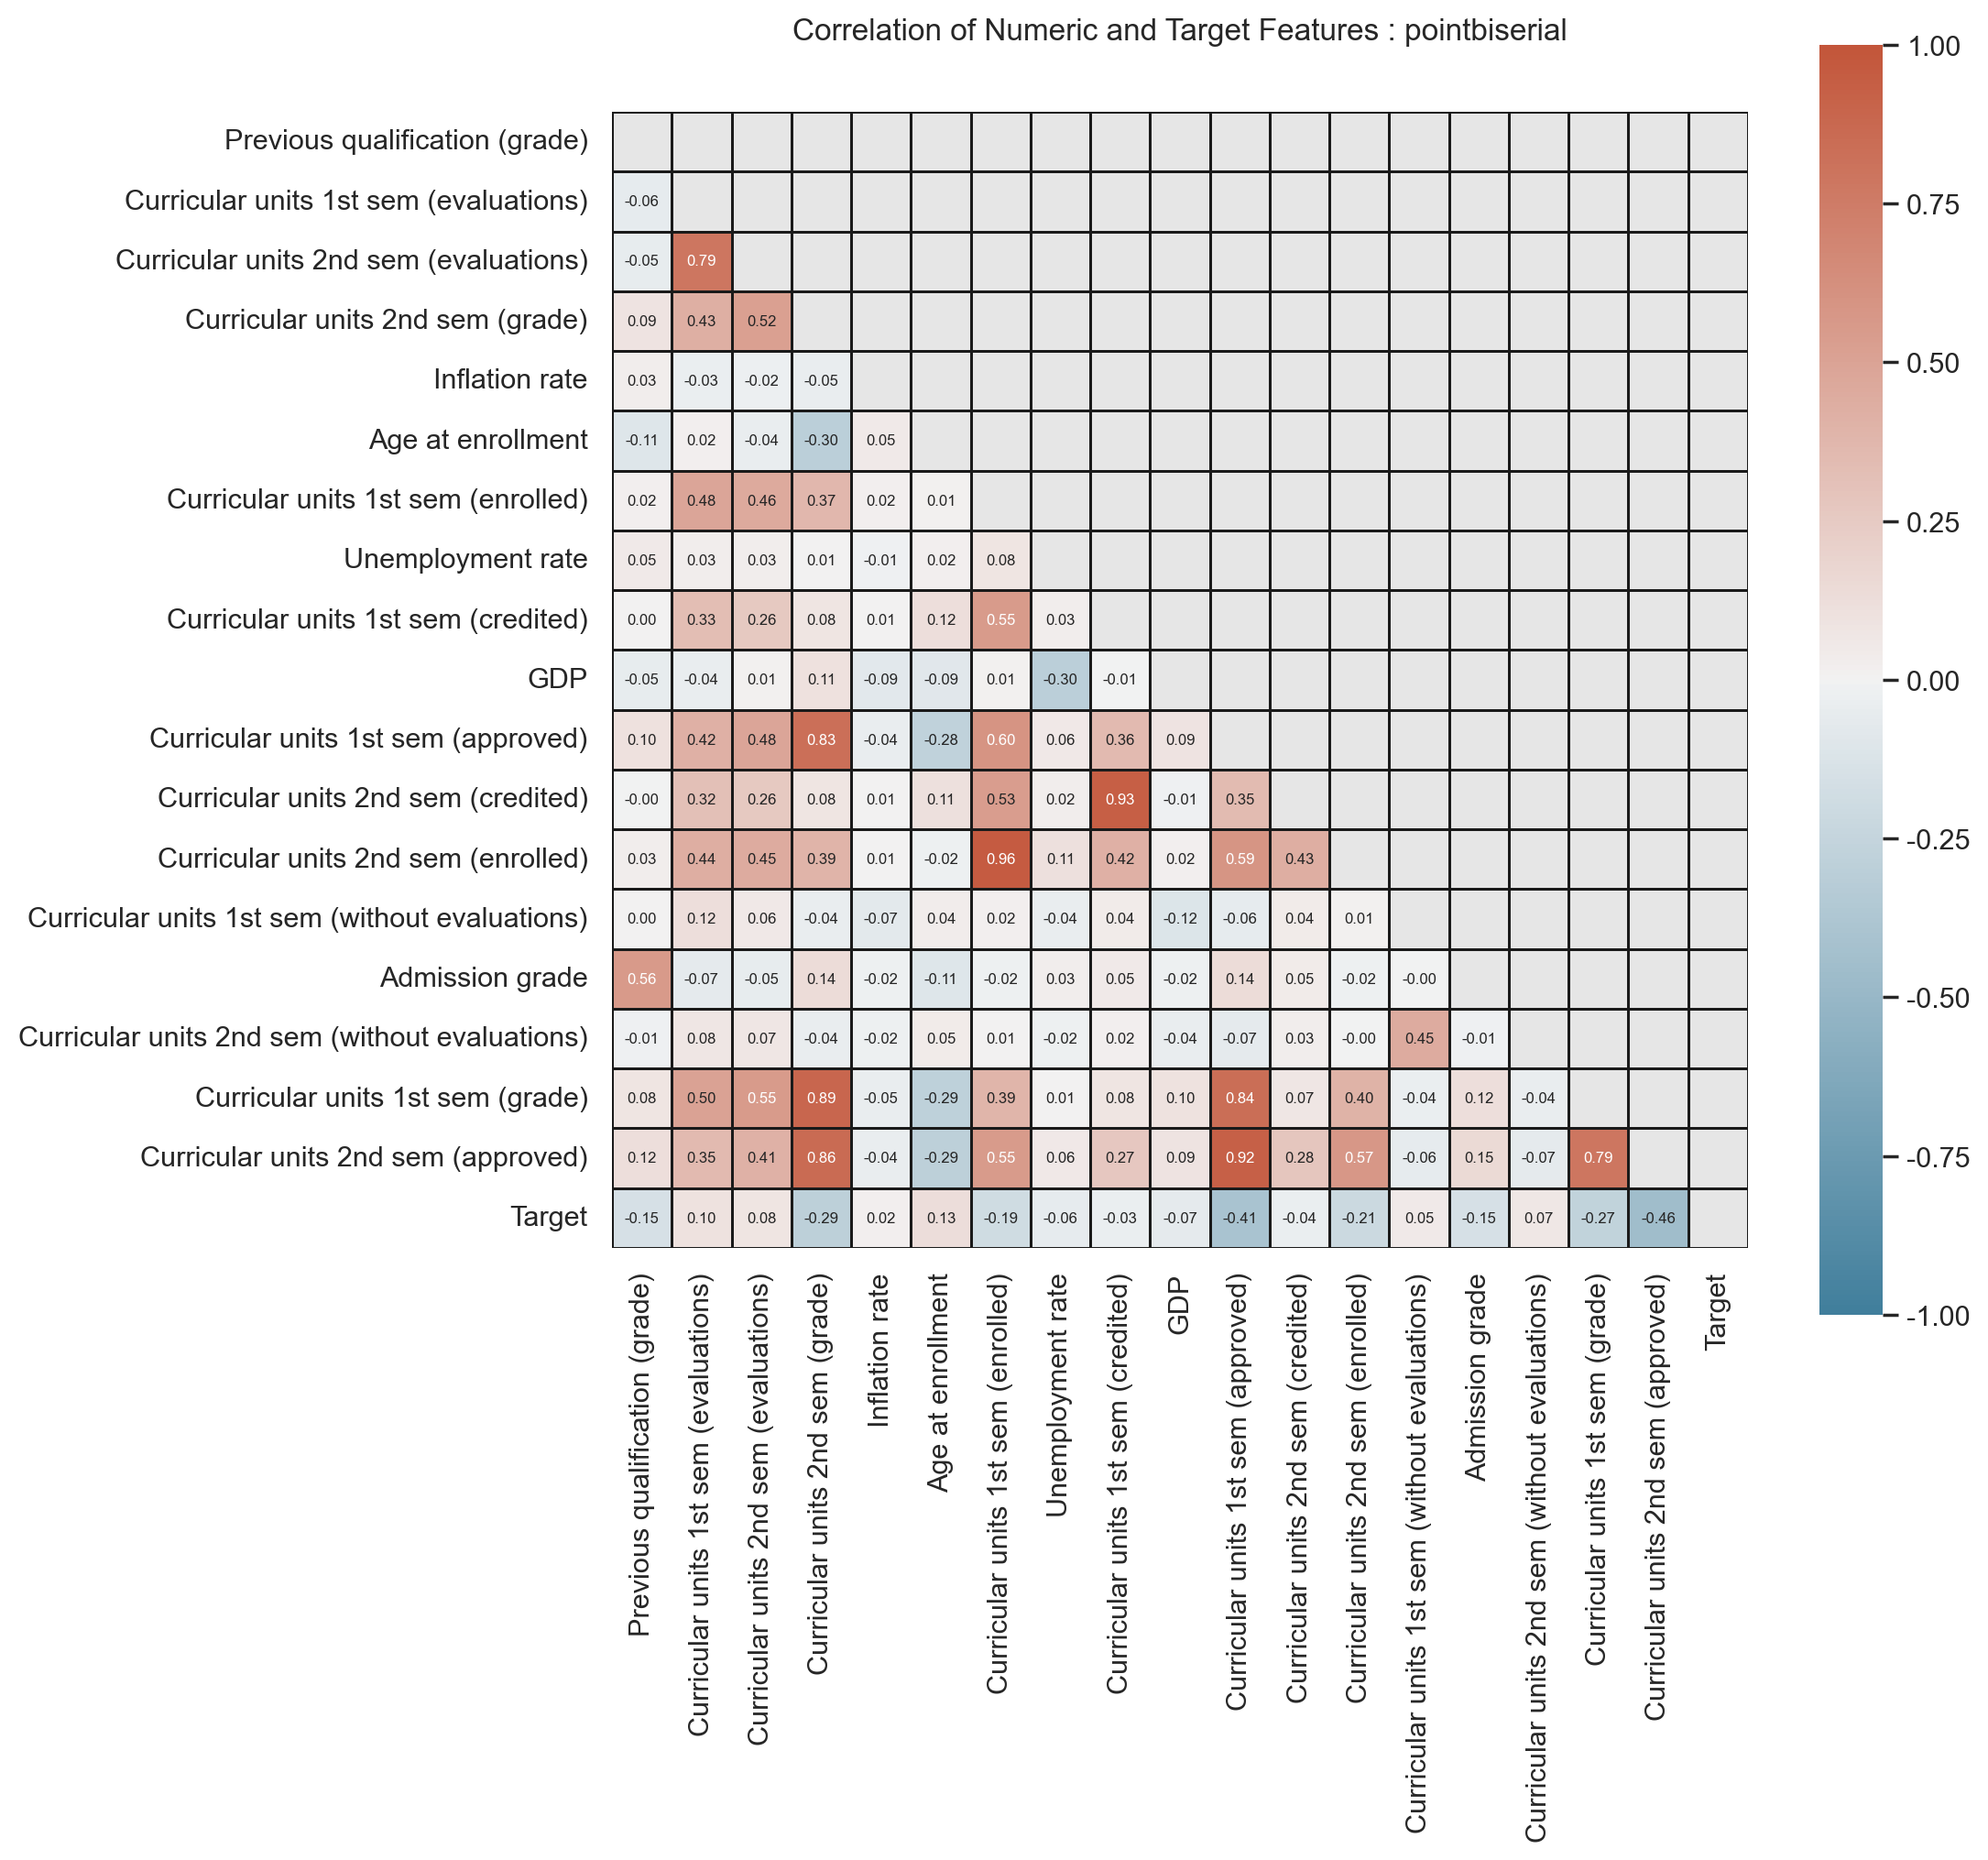

In [15]:
num_target_features = numeric_features + ["Target"]

# numeric features와 target feature의 조합을 사용하여 연관성 계산
numeric_target_corr = []
for col_pair in product(num_target_features, num_target_features) : 
    # corr of numeric and categorical features : pointbiserial coeff
    if "Target" in col_pair : 
        pointbiserial_val = stats.pointbiserialr(temp_train_df[col_pair[0]], temp_train_df[col_pair[1]]).statistic
        numeric_target_corr.append(pointbiserial_val)
    
    # corr of numeric features : pearson coeff
    else : 
        pearson_val = stats.pearsonr(temp_train_df[col_pair[0]], temp_train_df[col_pair[1]]).statistic
        numeric_target_corr.append(pearson_val)

# corr df
numeric_target_corr = np.array(numeric_target_corr).reshape(19, 19)        
numeric_target_corr_df = pd.DataFrame(numeric_target_corr, index=num_target_features, columns=num_target_features)

cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(numeric_target_corr_df, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(
    data=numeric_target_corr_df,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=0.5,
    linecolor="k",
    annot=True,
    annot_kws={"fontsize": 6},
    fmt=".2f",
    ax=ax
)
ax.set_title("Correlation of Numeric and Target Features : pointbiserial", y=1.05)
ax.grid(False) ; 

### 교차분석 : categorical features와 Target의 연관성
- 범주형 feature 간의 교차분석을 위해 교차빈도집계표를 만들고 이를 통해 Chi2 Test, Phi coeff, Cramer's coeff 를 사용하여 연관성(association)을 계산한다.
   - 교차빈도집계표 : pd.crosstab(df1, df2)
- 모든 범주형 feature : 
   - Chi2 Test
      - 귀무가설 H0 : 두 변수는 독립이다.
      - 대립가설 H1 : 두 변수는 독립이 아니다.
   - p-value : 0.05 보다 크면 귀무가설(독립이다), 0.05 보다 작으면 대립가설(독립이 아니다)
- 비교하는 2개의 feature 모두 2개의 유니크 값을 가진 경우
   - phi coefficient
   - 0에 가까울 수록 연관성이 작고, 1에 가까울 수록 연관성이 크다.
- 그외 비교하려는 2개의 feature가 3개 이상의 유니크 값을 가진 경우
   - cramer's V coefficient
   - 0에 가까울 수록 연관성이 작고, 1에 가까울 수록 연관성이 크다.
   - 0.6 이상이면 연관성이 크다고 판단할 수 있다.
- **Chi2 Test 결과와 phi,cramer coeff 결과 비교**
   - 연관성 여부가 대체로 일치하며, 연관성의 정도는 phi,crammer coeff가 더 정확한 것 같다.   

### Chi2 Test
- "두 변수는 독립이다."라는 귀무가설에 대한 검정
   - 유의수준 5%보다 크면 귀무가설을 채택할 수 있으므로 독립이고,
   - 유의수준 5%보다 작으면 대립가설을 채택할 수 있으므로 독립이 아님(=연관성이 있음)

In [16]:
from scipy.stats import chi2_contingency

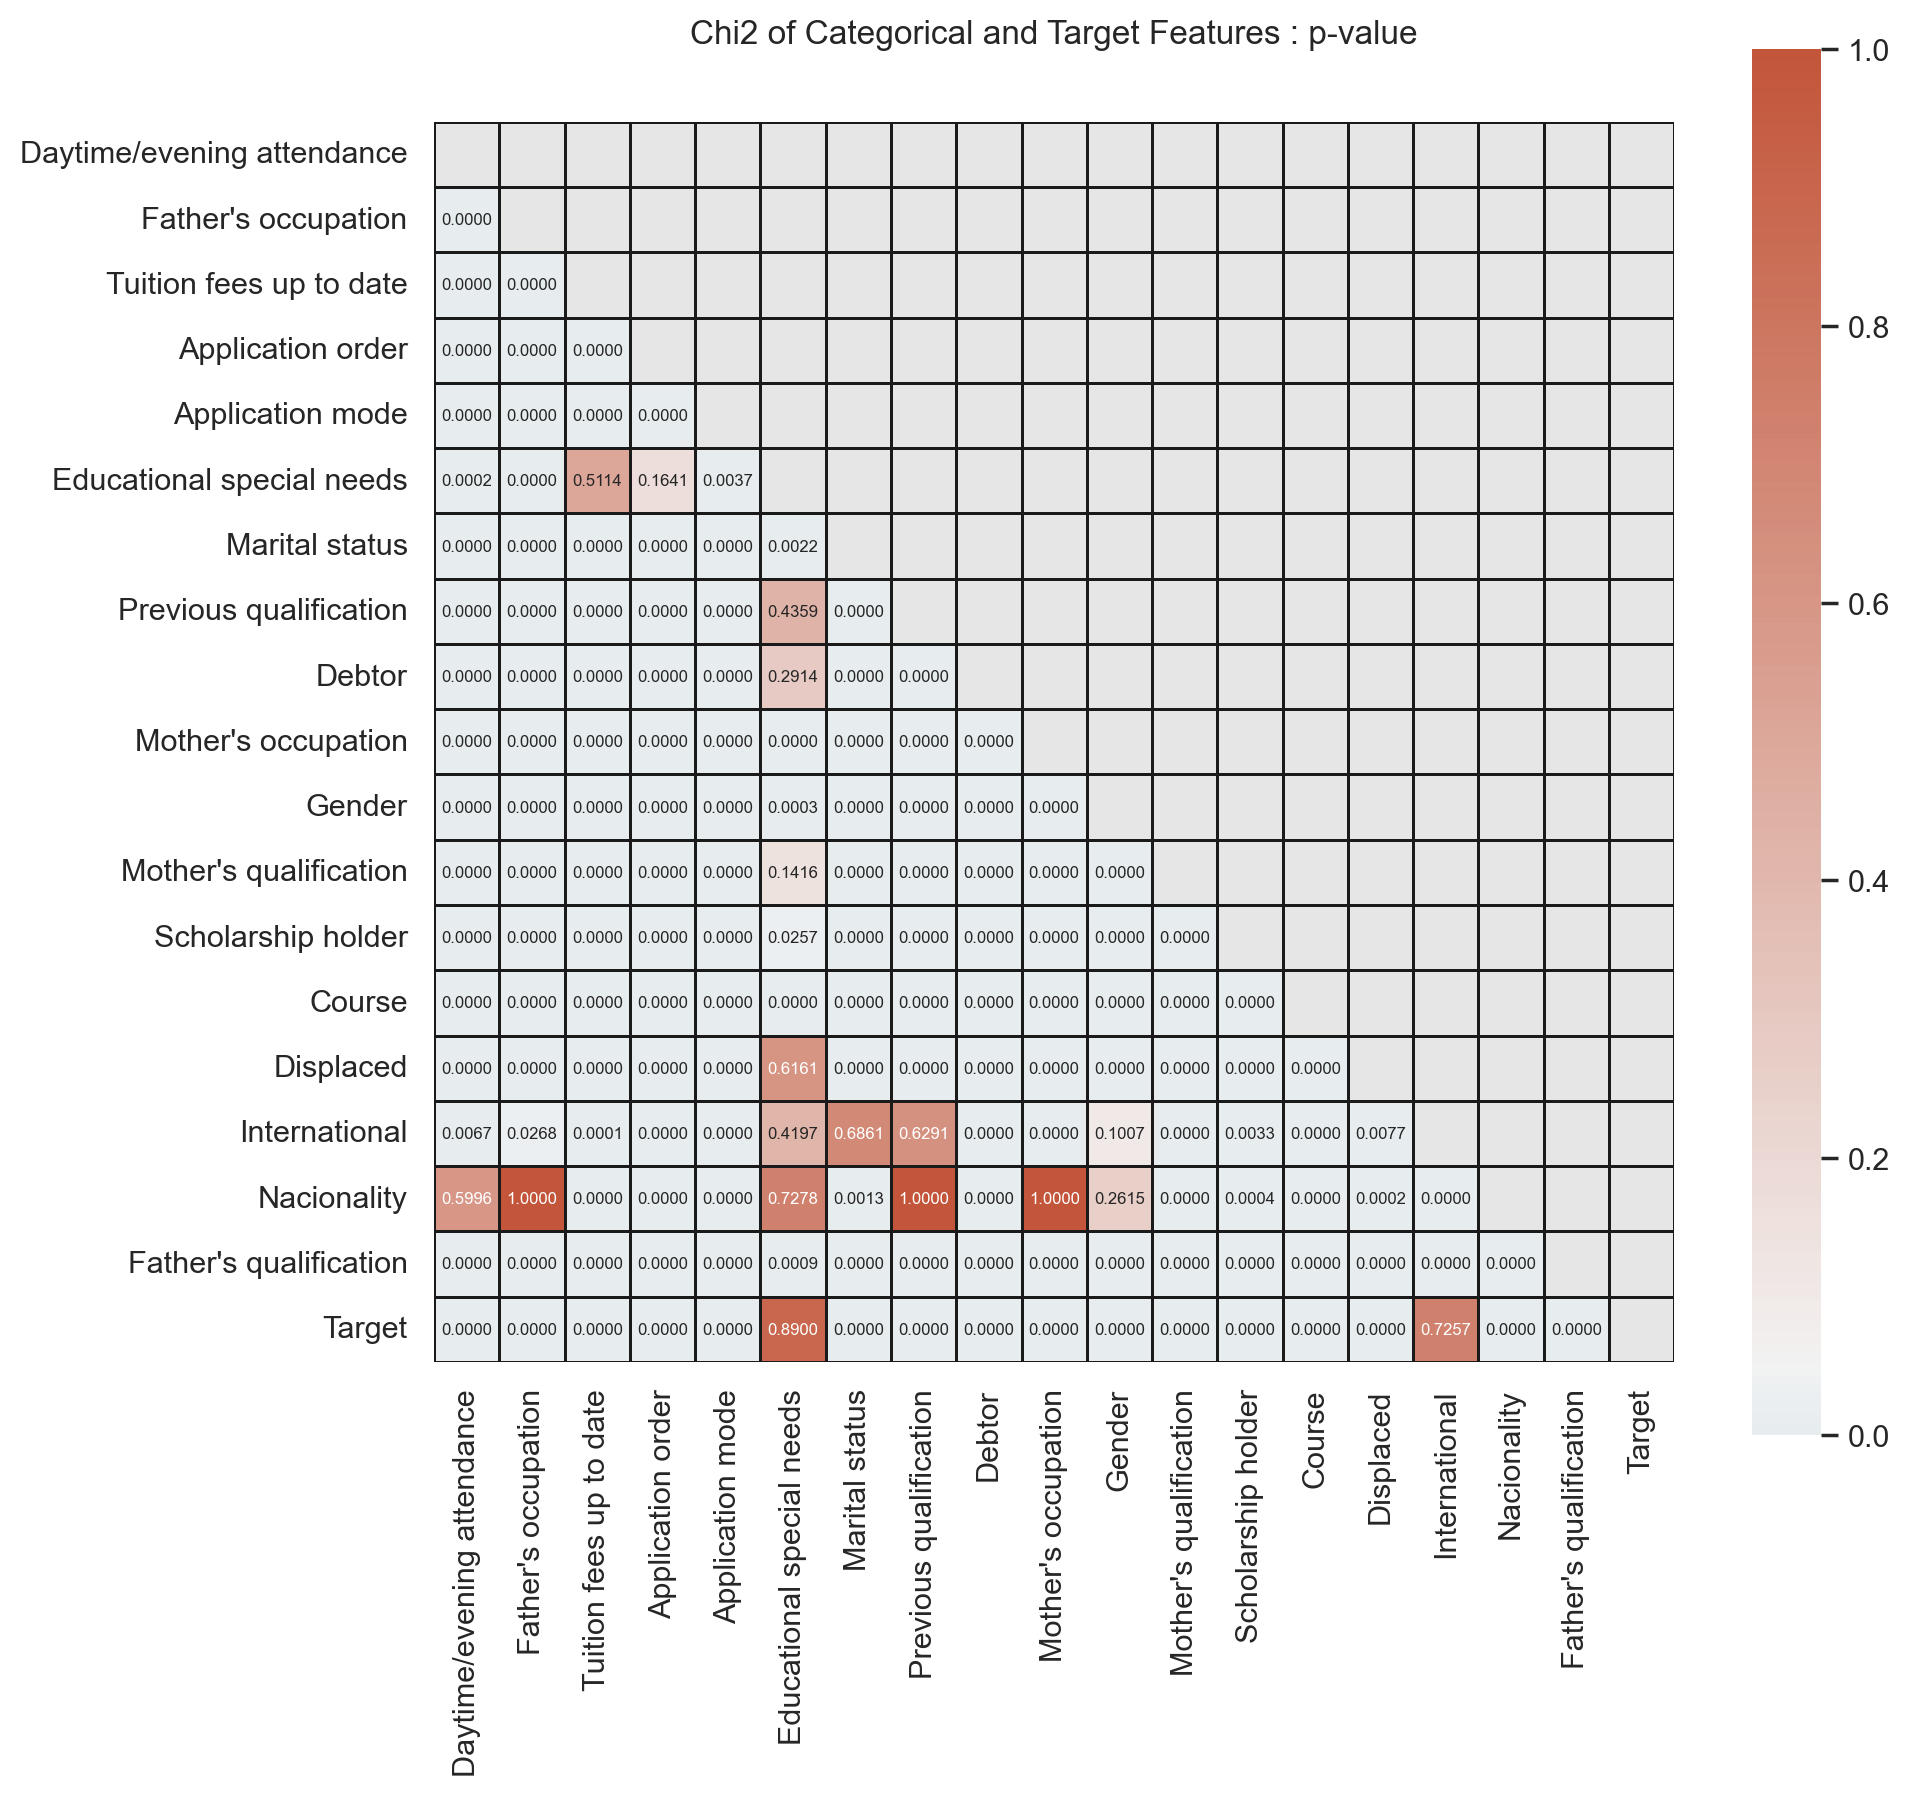

In [17]:
cate_target_features = categorical_features + ["Target"]

# categorical features와 target feature의 조합을 사용하여 연관성 계산
cate_target_corr = []
for col_pair in product(cate_target_features, cate_target_features) : 
    temp_cross_tab = pd.crosstab(temp_train_df[col_pair[0]], temp_train_df[col_pair[1]])
    temp_rows = [row.to_list() for i, row in temp_cross_tab.iterrows()]
    cate_target_corr.append(chi2_contingency(temp_rows, correction=False).pvalue)

# corr df
cate_target_corr = np.array(cate_target_corr).reshape(19, 19)        
cate_target_corr_df = pd.DataFrame(cate_target_corr, index=cate_target_features, columns=cate_target_features)

cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(cate_target_corr_df, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(
    data=cate_target_corr_df,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=0.0,
    center=0.05,
    square=True,
    linewidths=0.5,
    linecolor="k",
    annot=True,
    annot_kws={"fontsize": 6},
    fmt=".4f",
    ax=ax
)
ax.set_title("Chi2 of Categorical and Target Features : p-value", y=1.05)
ax.grid(False) ; 

### Cramer's V, Phi coefficient
- 두 변수 모두 유니크 값이 2개인 경우 따로 계산

In [18]:
from scipy.stats.contingency import association

### 유니크 값이 2개인 feature

In [19]:
cate_2_unique = list(
    train_count_unique_df\
    .reset_index()\
    .rename(columns={"index": "col_name"})\
    .query("col_name in @categorical_features and count == 2")["col_name"]\
    .values
)
cate_2_unique

['Daytime/evening attendance',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International']

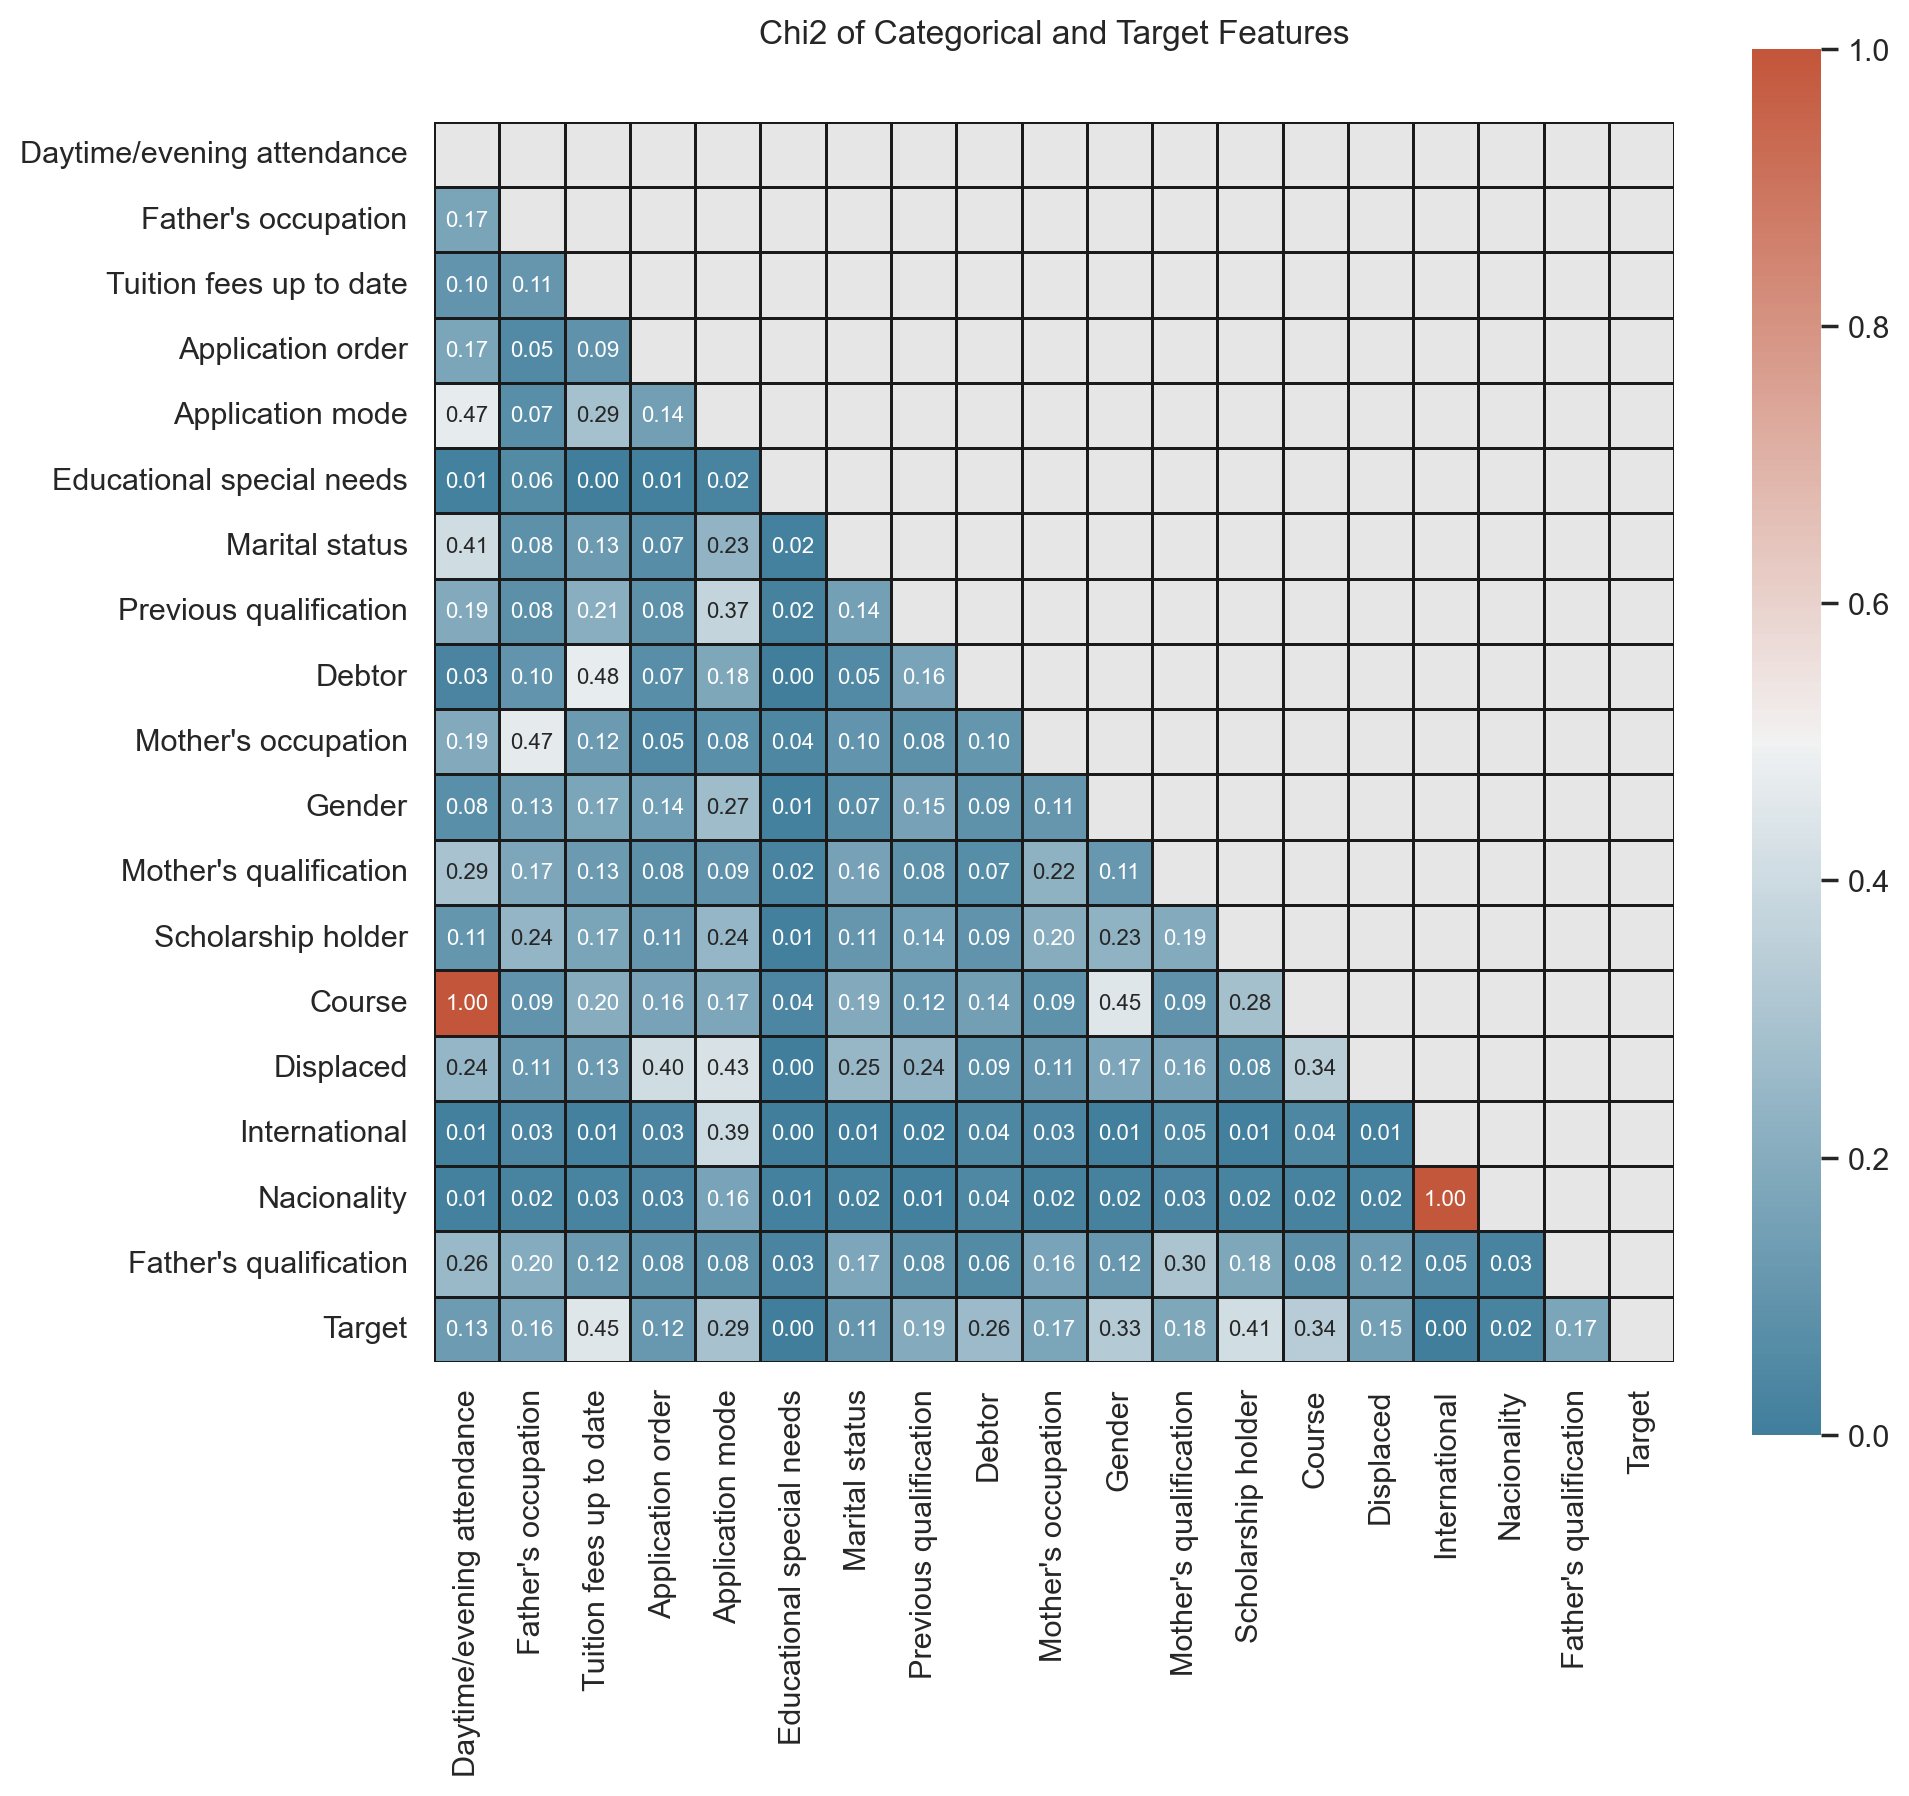

In [20]:
cate_target_features = categorical_features + ["Target"]

# categorical features와 target feature의 조합을 사용하여 연관성 계산
cate_target_corr = []
for col_pair in product(cate_target_features, cate_target_features) : 
    temp_cross_tab = pd.crosstab(temp_train_df[col_pair[0]], temp_train_df[col_pair[1]])
    temp_rows = [row.to_list() for i, row in temp_cross_tab.iterrows()]
    # 두 feature 모두 유니크 값이  2개인 경우 : phi 계수
    if (col_pair[0] in cate_2_unique) and (col_pair[1] in cate_2_unique) : 
        cate_target_corr.append(association(temp_rows, method="tschuprow"))
    # 두 feature의 유니크 값이 3개 이상인 경우 : cramer 계수    
    else : 
        cate_target_corr.append(association(temp_rows, method="cramer"))

# corr df
cate_target_cramer_phi_corr = np.array(cate_target_corr).reshape(19, 19)        
cate_target_cramer_phi_corr_df = pd.DataFrame(cate_target_cramer_phi_corr, index=cate_target_features, columns=cate_target_features)

cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(cate_target_cramer_phi_corr_df, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(
    data=cate_target_cramer_phi_corr_df,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=0.0,
    center=0.5,
    square=True,
    linewidths=0.5,
    linecolor="k",
    annot=True,
    annot_kws={"fontsize": 8},
    fmt=".2f",
    ax=ax
)
ax.set_title("Chi2 of Categorical and Target Features", y=1.05)
ax.grid(False) ; 

## (9) Analysis
- 종속변수 Target feature와 독립변수 individual features 간의 분포

### feature의 uniqe 값의 description을 정리하여 반환하는 함수

In [27]:
get_feature_desc("Course")

'33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)'

In [21]:
def clean_desc(col) : 
    
    '''
    UCI 원본 페이지에서 제공하는 variable description을 정리하는 함수
       - [("cate_num", "cate")] 로 반환
    '''
    
    desc = get_feature_desc(col).split(" ")
    cates = []
    
    for i, c in enumerate(desc) :
        cate = ""
        # str이 카테고리 값에 대한 숫자로 이루어졌는지 확인 후 
        # 현재 index 이후 값들을 반복문으로 확인하여 desc를 만든다.
        if c.isdigit() : 
            cate_num = c
            
            for d in desc[i+1:] :
                # str이 숫자가 아닌 경우 = description의 단어들을 하나의 str로 만든다.
                if not d.isdigit() :
                    if d not in ["–", "-"] :
                        cate += d + " "
                # str이 숫자이면 다른 카테고리 값에 대한 번호이므로 종료        
                elif d.isdigit() : 
                    break
                    
            cate = cate.rstrip(" ")
            cates.append((cate_num, cate))
    
    return cates

In [29]:
clean_desc("Course")

[('33', 'Biofuel Production Technologies'),
 ('171', 'Animation and Multimedia Design'),
 ('8014', 'Social Service (evening attendance)'),
 ('9003', 'Agronomy'),
 ('9070', 'Communication Design'),
 ('9085', 'Veterinary Nursing'),
 ('9119', 'Informatics Engineering'),
 ('9130', 'Equinculture'),
 ('9147', 'Management'),
 ('9238', 'Social Service'),
 ('9254', 'Tourism'),
 ('9500', 'Nursing'),
 ('9556', 'Oral Hygiene'),
 ('9670', 'Advertising and Marketing Management'),
 ('9773', 'Journalism and Communication'),
 ('9853', 'Basic Education'),
 ('9991', 'Management (evening attendance)')]

### Target과 연관성이 높은 카테고리형 변수들

In [22]:
top_5_cate_target = cate_target_cramer_phi_corr_df["Target"].sort_values()[::-1][1:6].index
top_5_cate_target

Index(['Tuition fees up to date', 'Scholarship holder', 'Course', 'Gender',
       'Application mode'],
      dtype='object')

### Target and "Tuition fees up to date" 의 분포
- 최신 등록금 지불 여부
   - Graduate : yes > no
   - Dropout : yes > no
   - Enrolled : yea > no
- Graduate, Dropout, Enrolled 모두 최신 등록금을 납입한 사람이 더 많다.   

In [81]:
tuition_fees_desc = clean_desc(top_5_cate[0])
tuition_fees_desc.sort()
tuition_fees_desc

[('0', 'no'), ('1', 'yes')]

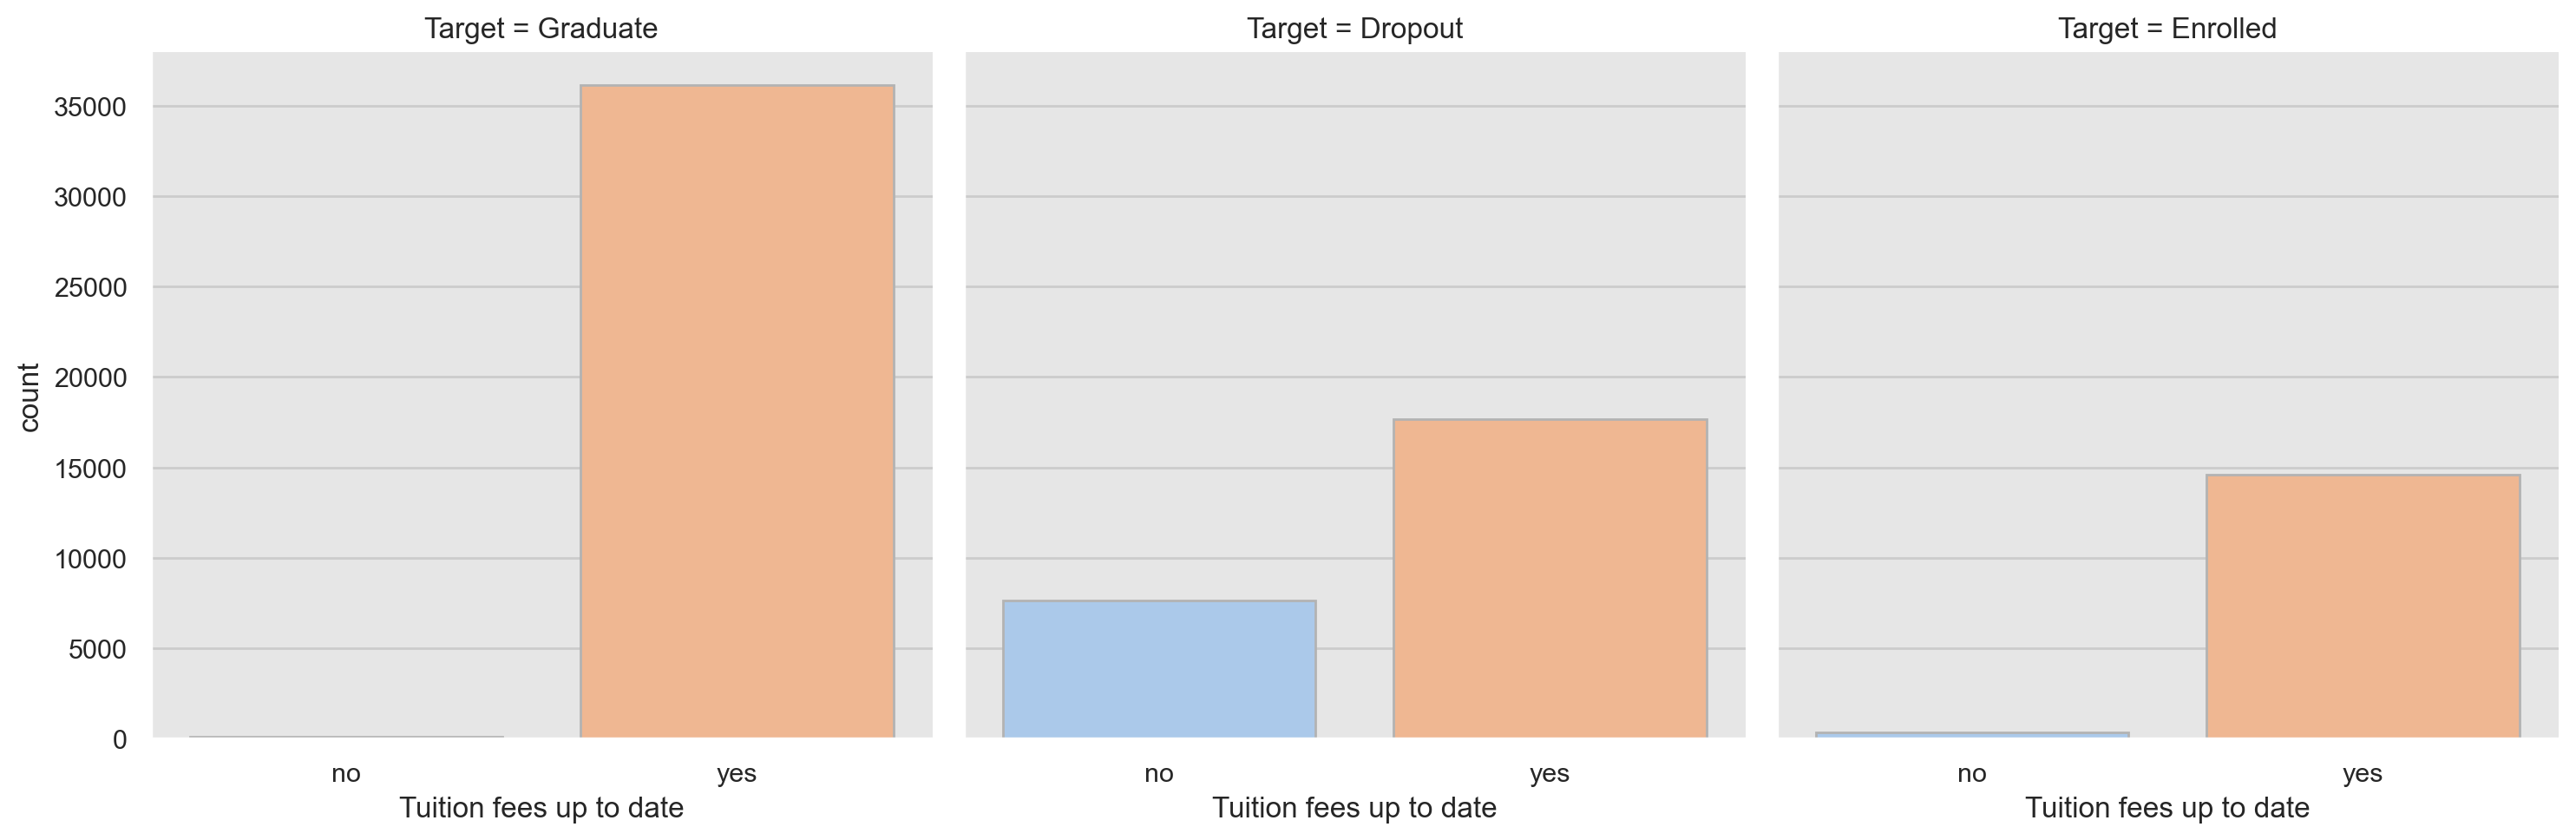

In [80]:
g = sns.catplot(
    data=train_df,
    x="Tuition fees up to date",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(labels=[ele[1] for ele in tuition_fees_desc]) ;

### Target and "Scholarship holder" 의 분포
- 장학금 보유자
   - Graduate : yes < no
   - Dropout : yes < no
   - Enrolled : yes < no
- Dropout에서 장학금을 받지 않은 사람과 받은 사람의 차이가 더 커진다.   

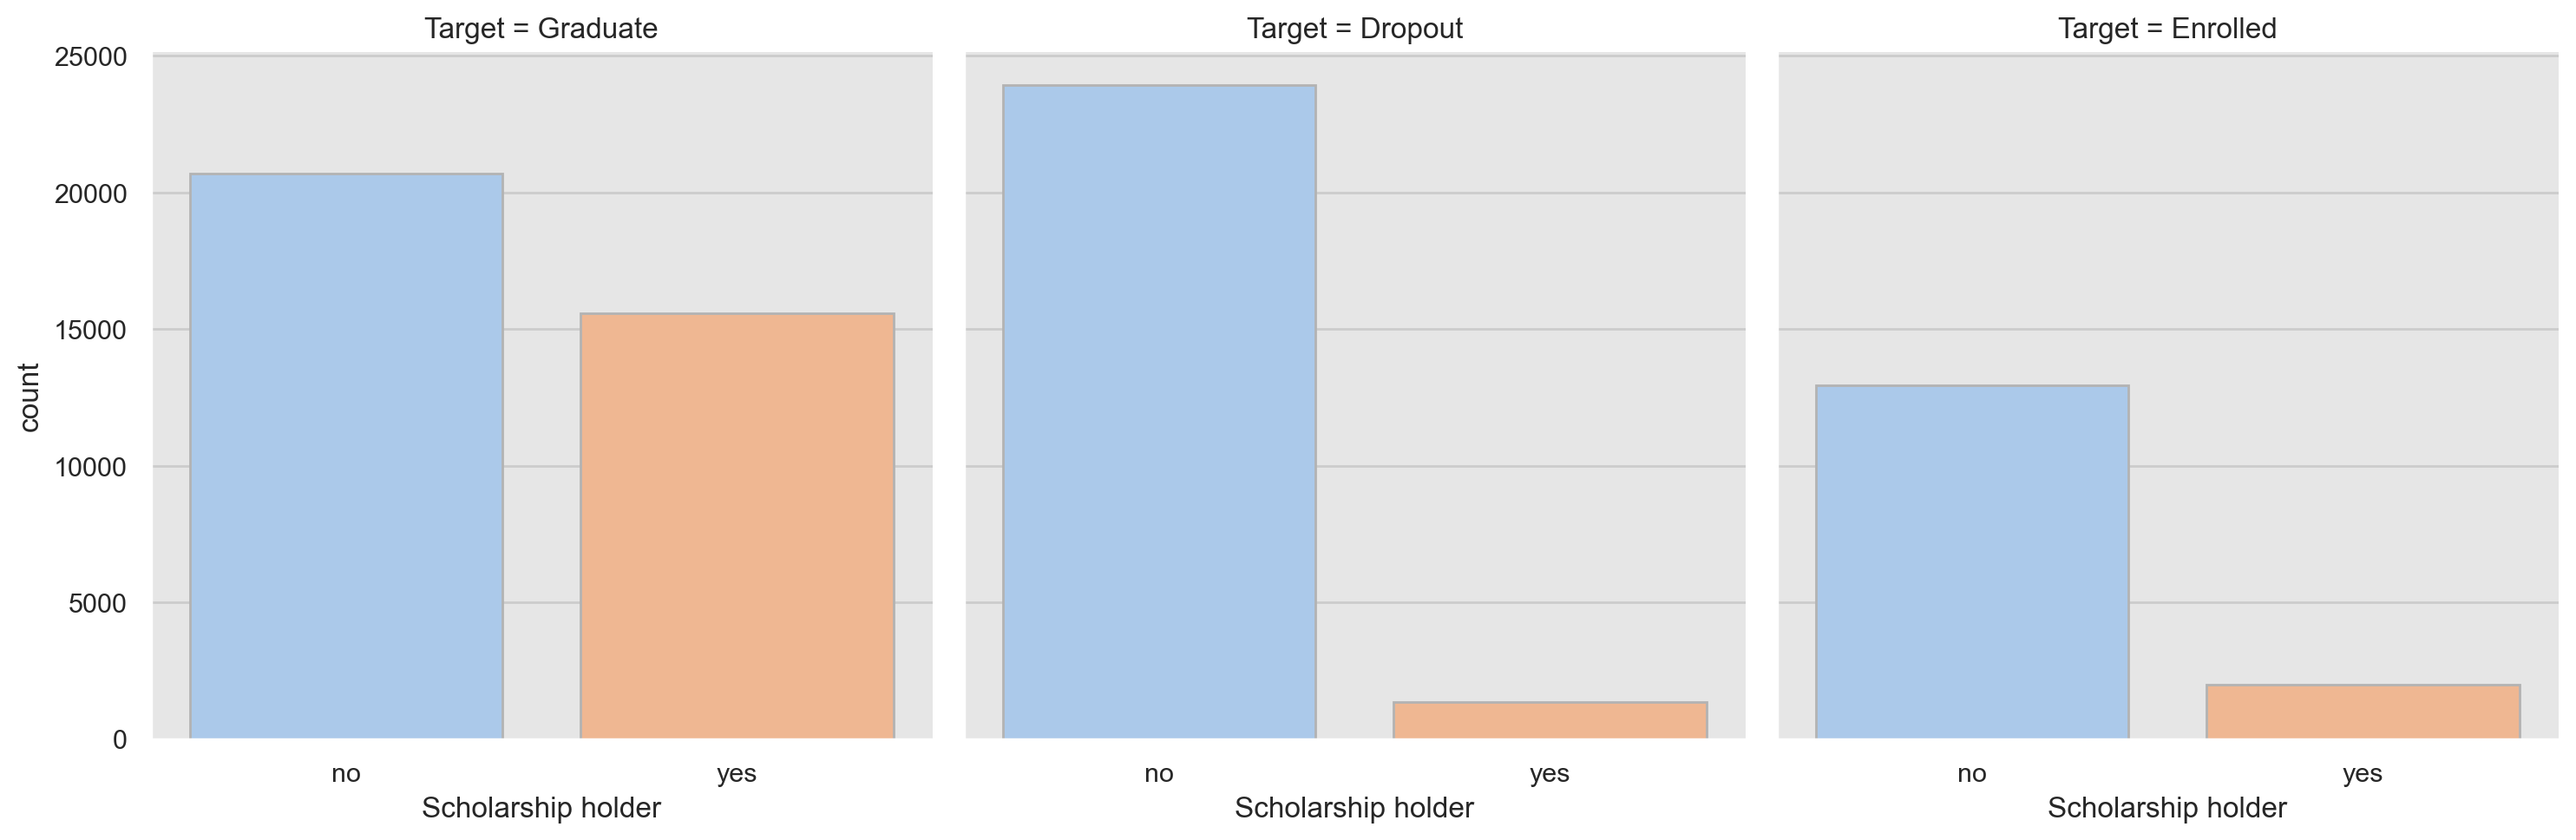

In [83]:
scholoarship_holder_desc = clean_desc(top_5_cate[0])
scholoarship_holder_desc.sort()

g = sns.catplot(
    data=train_df,
    x="Scholarship holder",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(labels=[ele[1] for ele in scholoarship_holder_desc]) ;

### Target 별 Course(이수과목)의 분포
- 각 Target별 가장 많은 이수 과목
    - Graduate: 9500 (Nursing)
    - Dropout : 9147 (Management)
    - Enrolled : 9147 (Management)
- Graduate 학생들의 이수 과목의 쏠림현상이 크다.
- feature desc에 없는 카테고리가 있다. : 33, 39

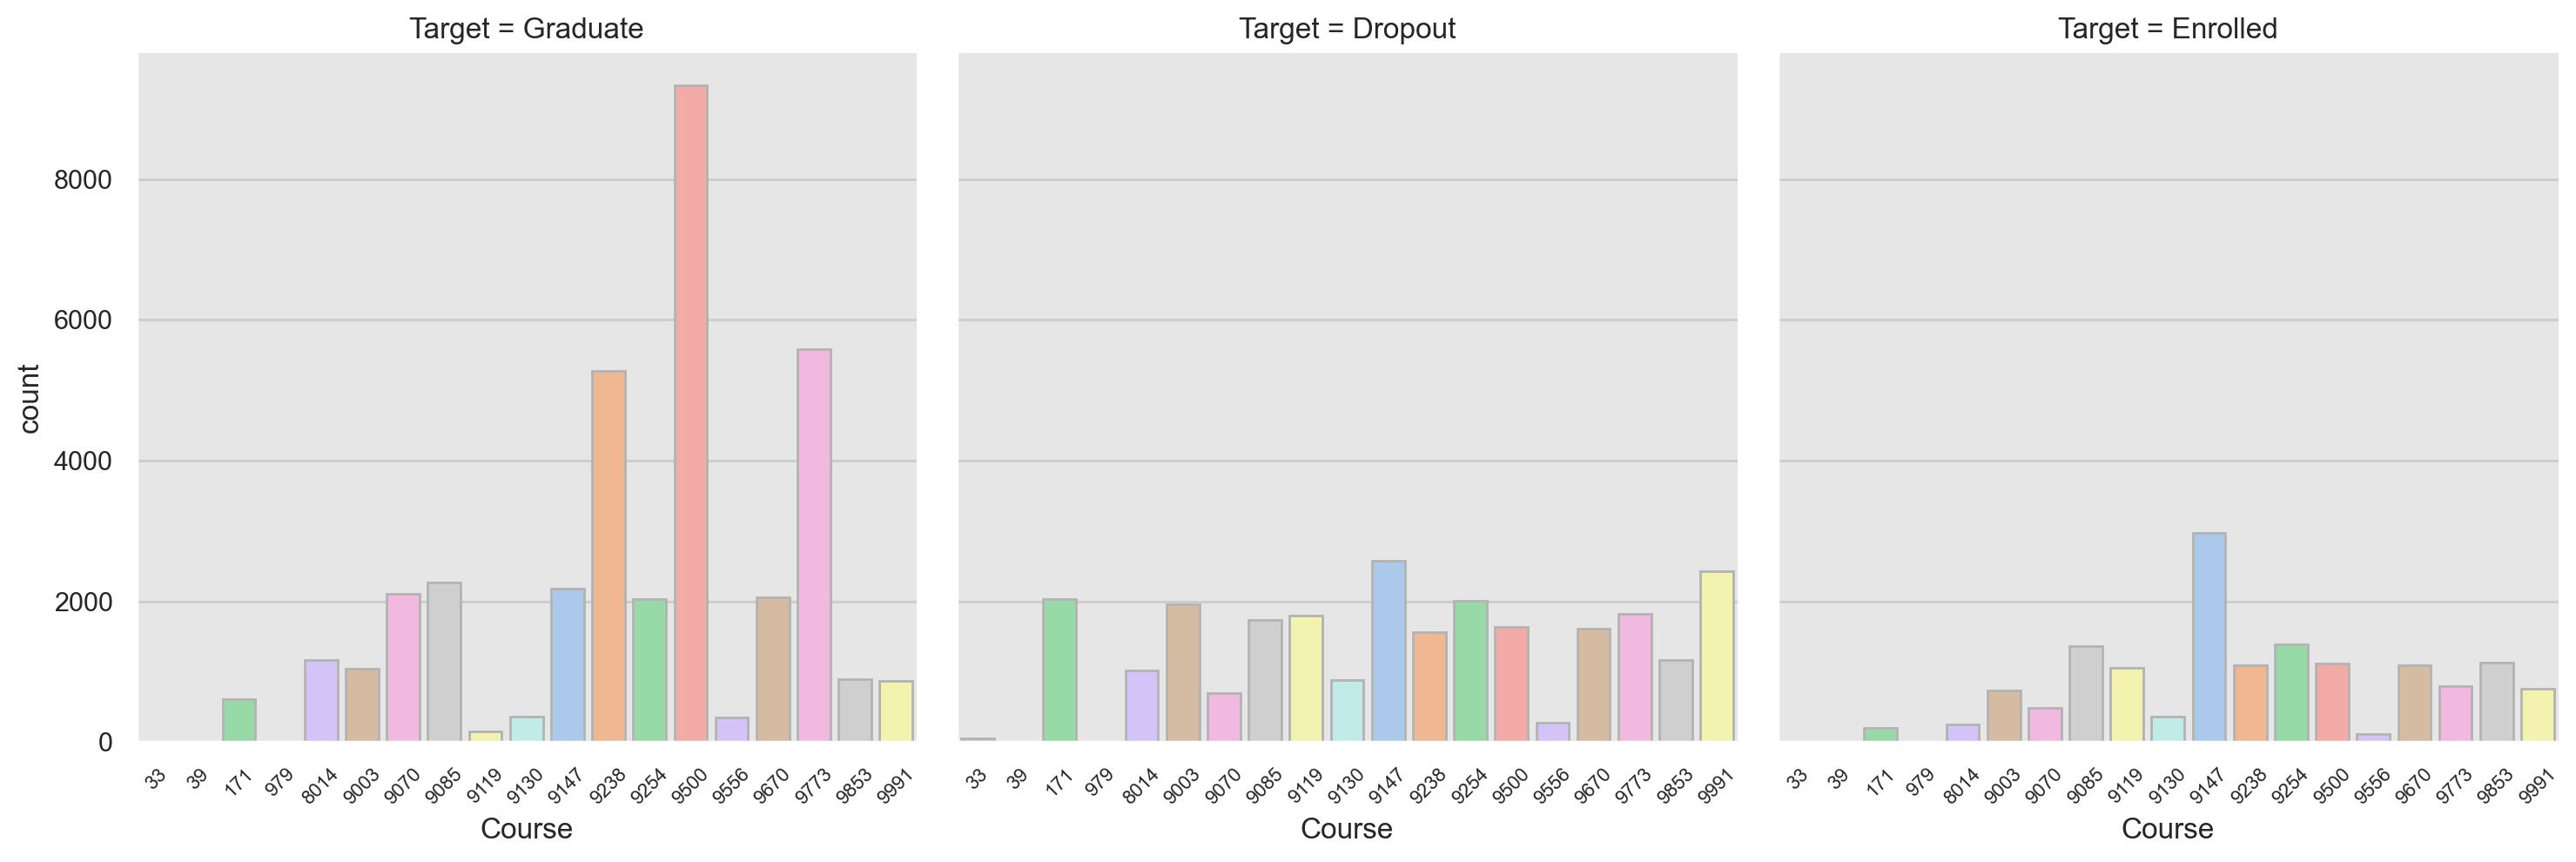

In [90]:
g = sns.catplot(
    data=train_df[["Target", "Course"]],
    x="Course",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=8, ha="center");

In [52]:
col = "Course"
top = 3
cate_descs = clean_desc(col)
mapper = dict(cate_descs)

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    temp_df["desc"] = temp_df[col].astype(str).map(mapper)
    temp_df["desc"] = temp_df[col].astype(str) + " " + temp_df["desc"]
    filter_dfs.append(temp_df["desc"].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", "desc", "count"]]    
filter_df

target                                  desc  count
0  Graduate                          9500 Nursing   9325
1  Graduate     9773 Journalism and Communication   5586
2  Graduate                   9238 Social Service   5277
3   Dropout                       9147 Management   2582
4   Dropout  9991 Management (evening attendance)   2432
5   Dropout   171 Animation and Multimedia Design   2037
6  Enrolled                       9147 Management   2976
7  Enrolled                          9254 Tourism   1384
8  Enrolled               9085 Veterinary Nursing   1366

### Target 별 Gender의 분포
- 성별
    - Graduate : female > male
    - Dropout : female < male
    - Enrolled : female > male
- Graduated 한 학생과 Dropout 한 학생의 성별 차이는 반대이다. 특히 Graduated 한 학생은 여자가 더 많다.    

In [51]:
gender_desc = clean_desc("Gender")
gender_desc.sort()
gender_desc

[('0', 'female'), ('1', 'male')]

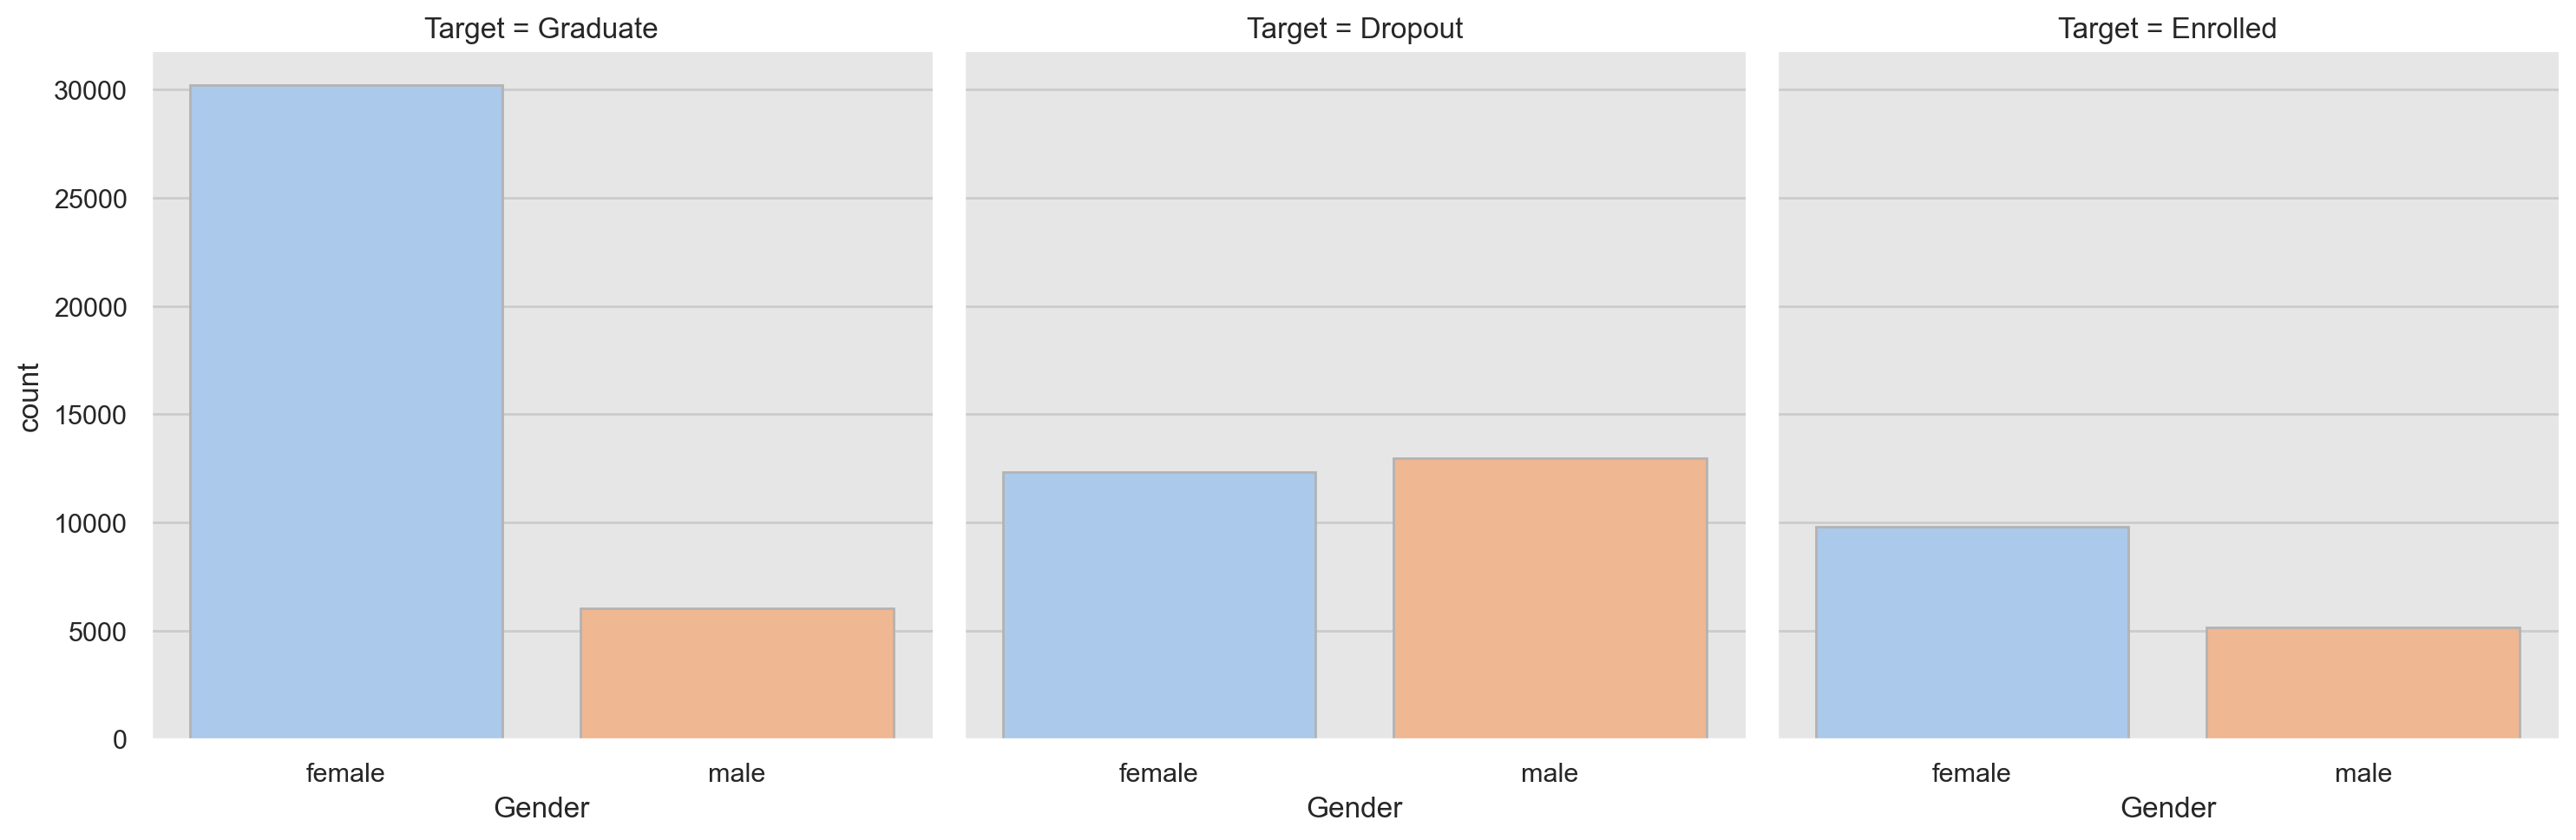

In [89]:
g = sns.catplot(
    data=train_df,
    x="Gender",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(labels=[ele[1] for ele in gender_desc]) ;

### Target and "Application mode"
- 적용 모드 : 학생의 신변 정보(?) : 유학생, 편입생, 군인 등에 대한 구분

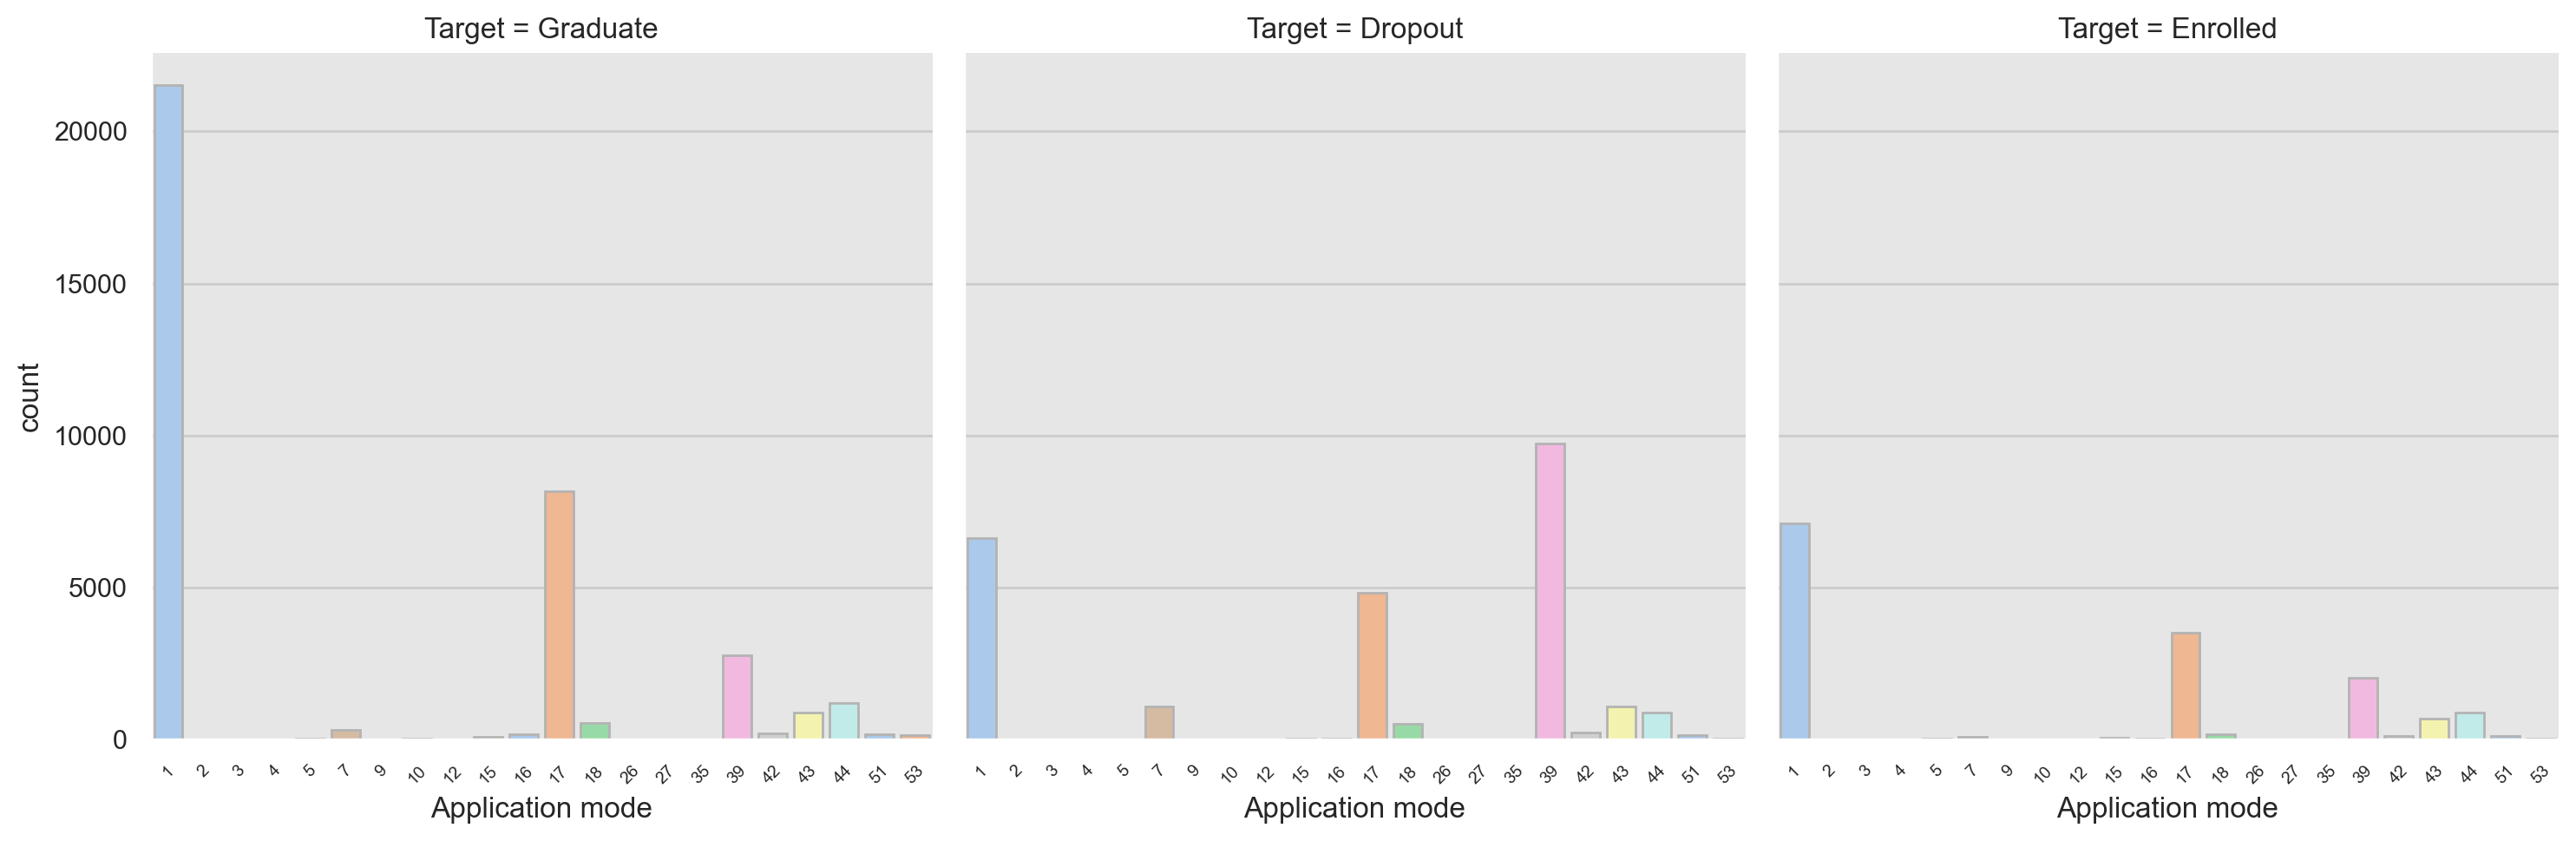

In [85]:
g = sns.catplot(
    data=train_df,
    x="Application mode",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=7, ha="center") ;

In [86]:
col = "Application mode"
top = 3
cate_descs = clean_desc(col)
mapper = dict(cate_descs)

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    temp_df["desc"] = temp_df[col].astype(str).map(mapper)
    temp_df["desc"] = temp_df[col].astype(str) + " " + temp_df["desc"]
    filter_dfs.append(temp_df["desc"].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", "desc", "count"]]    
filter_df

target                             desc  count
0  Graduate   1 1st phase general contingent  21510
1  Graduate  17 2nd phase general contingent   8174
2  Graduate                          39 Over   2761
3   Dropout                          39 Over   9725
4   Dropout   1 1st phase general contingent   6615
5   Dropout  17 2nd phase general contingent   4831
6  Enrolled   1 1st phase general contingent   7102
7  Enrolled  17 2nd phase general contingent   3518
8  Enrolled                          39 Over   2033

## Target 과 numeric features 의 분포

In [23]:
top_5_numeric_target = numeric_target_corr_df["Target"].sort_values()[::-1][1:6].index
top_5_numeric_target

Index(['Age at enrollment', 'Curricular units 1st sem (evaluations)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (without evaluations)',
       'Curricular units 1st sem (without evaluations)'],
      dtype='object')

### Target and "Age at enrollment" 의 분포
- 등록시 나이
   - Graduated : 18
   - Dropout : 19
   - Enrolled : 18

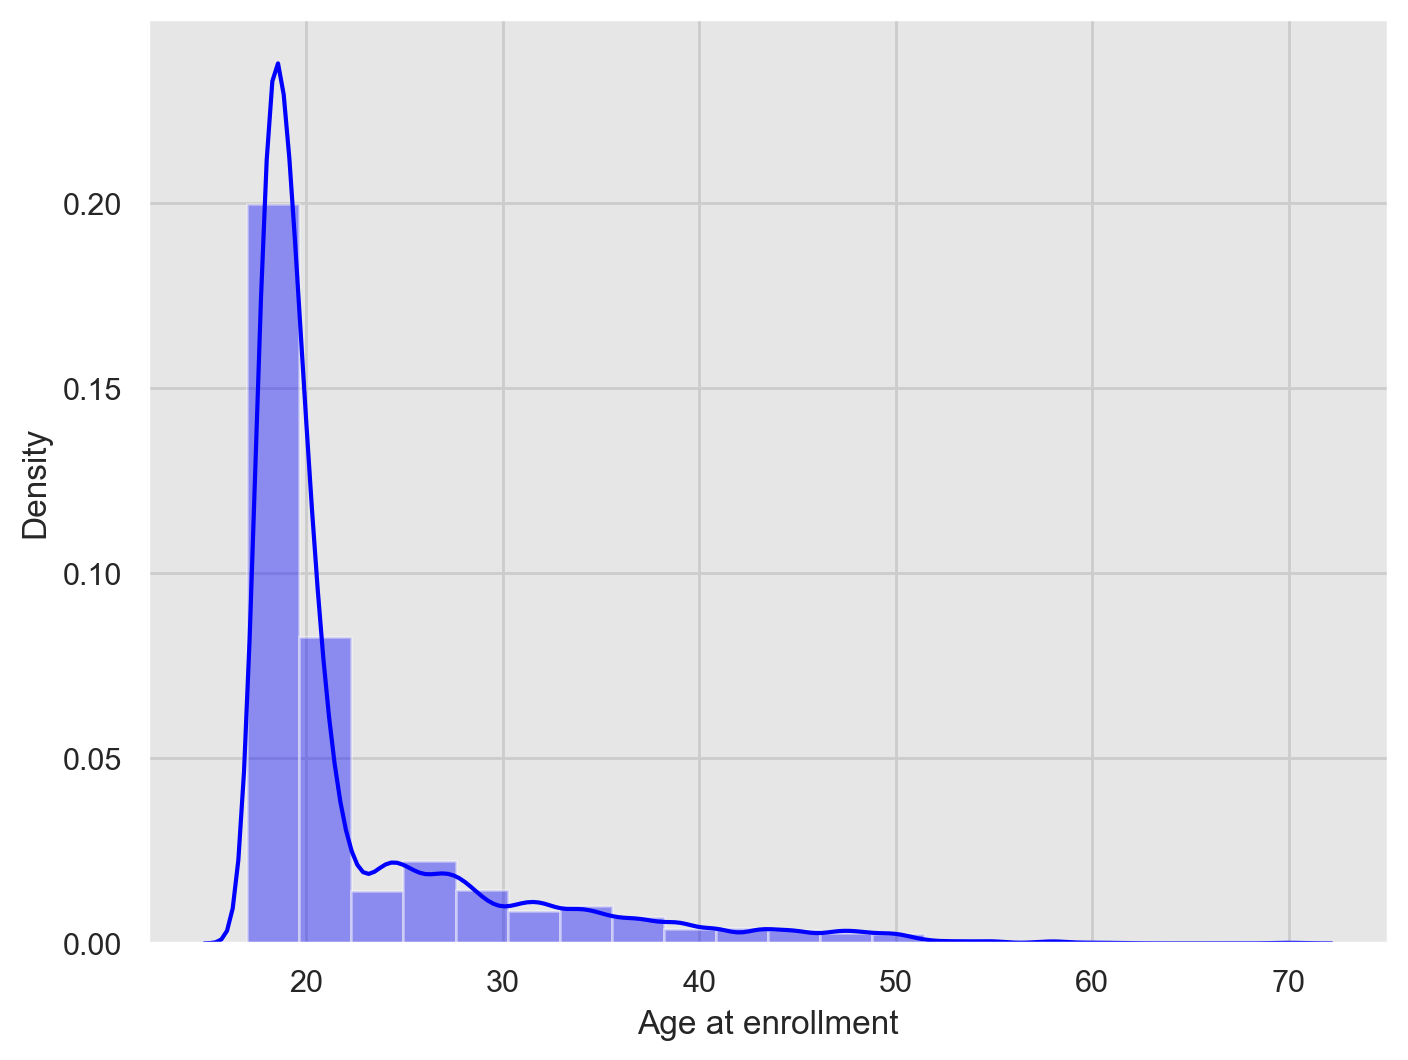

In [136]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(
    a=train_df["Age at enrollment"],
    bins=20,
    color="blue",
    ax=ax
) ;

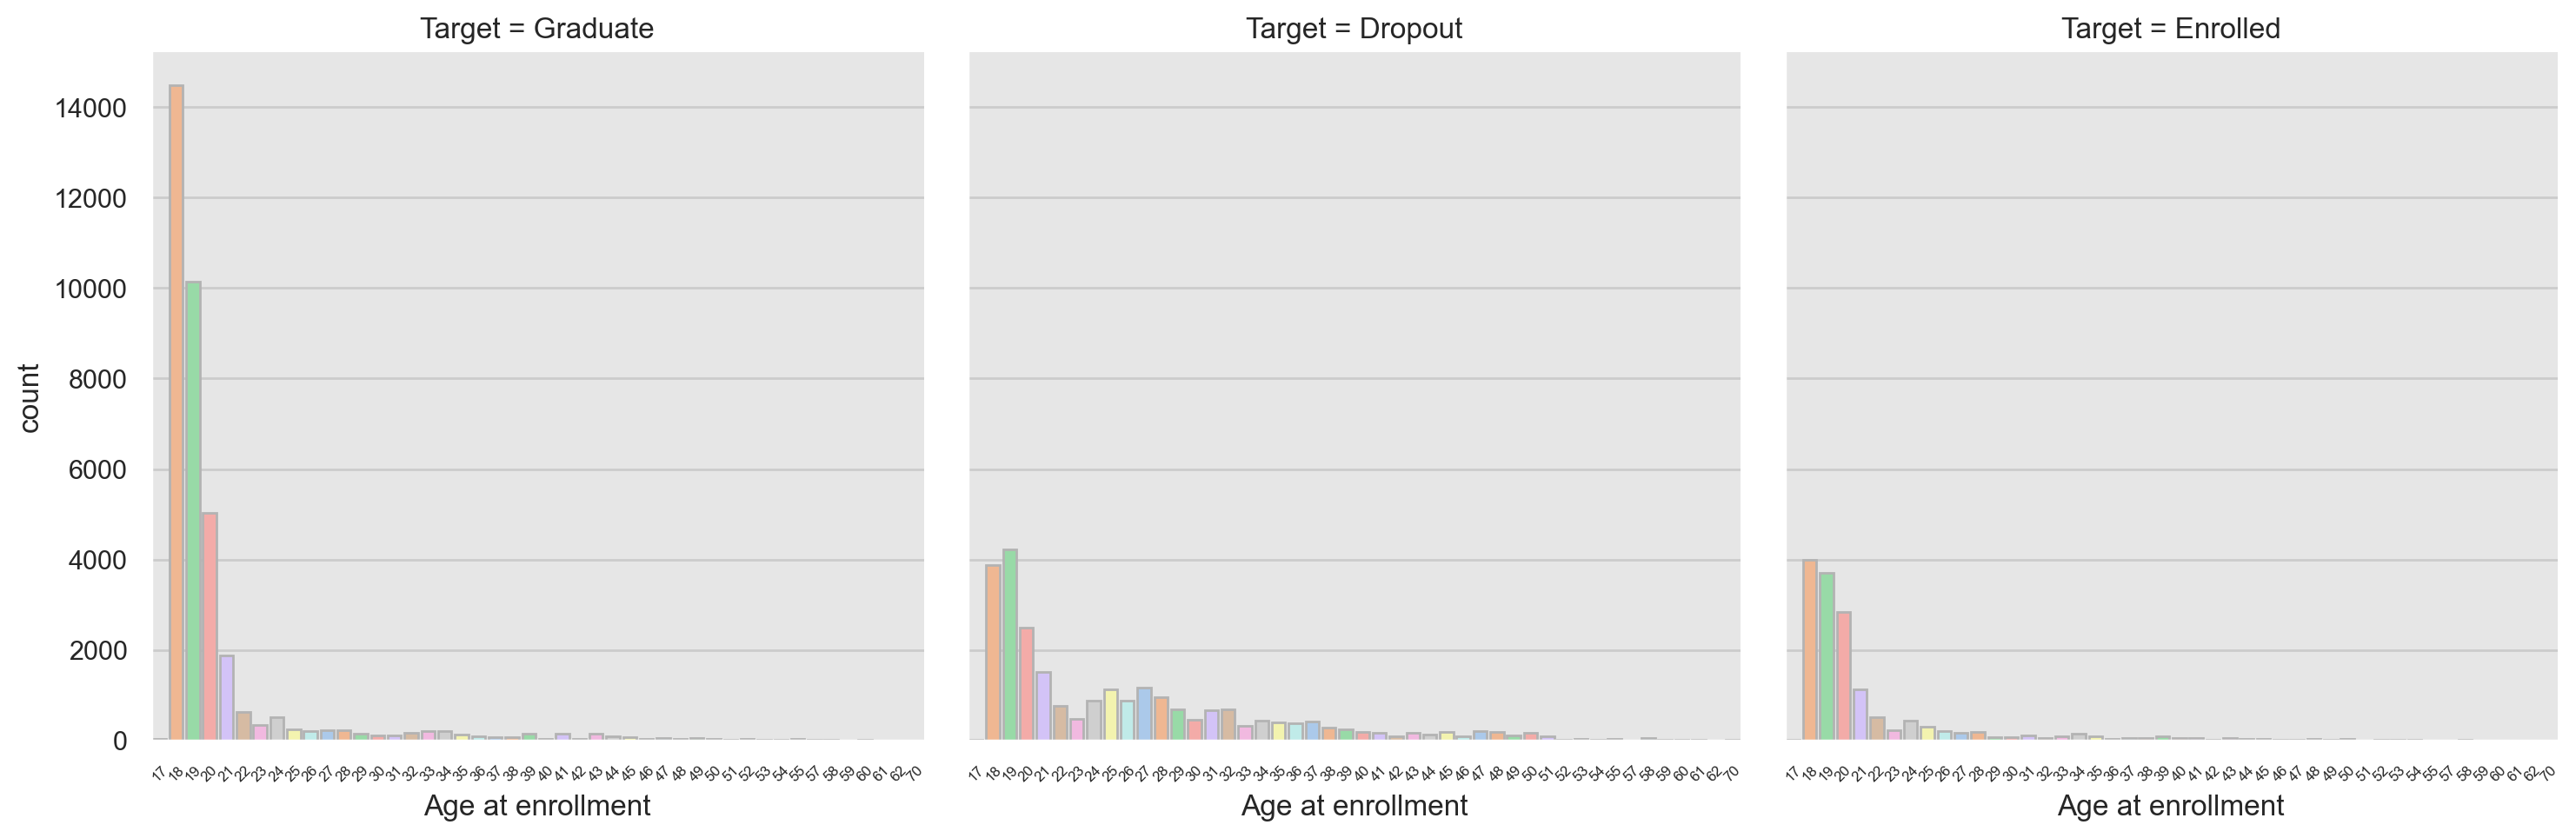

In [116]:
g = sns.catplot(
    data=train_df,
    x="Age at enrollment",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=6, ha="center") ;

In [33]:
col = "Age at enrollment"
top = 3

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    filter_dfs.append(temp_df[col].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", col, "count"]]    
filter_df

target  Age at enrollment  count
0  Graduate                 18  14490
1  Graduate                 19  10149
2  Graduate                 20   5037
3   Dropout                 19   4220
4   Dropout                 18   3886
5   Dropout                 20   2489
6  Enrolled                 18   4001
7  Enrolled                 19   3709
8  Enrolled                 20   2841

### Target and "Curricular units 1st sem (evaluations)"
- 1학기 교과단위 평가횟수
   - Graduated : 8
   - Dropout : 0
   - Enrolled : 8

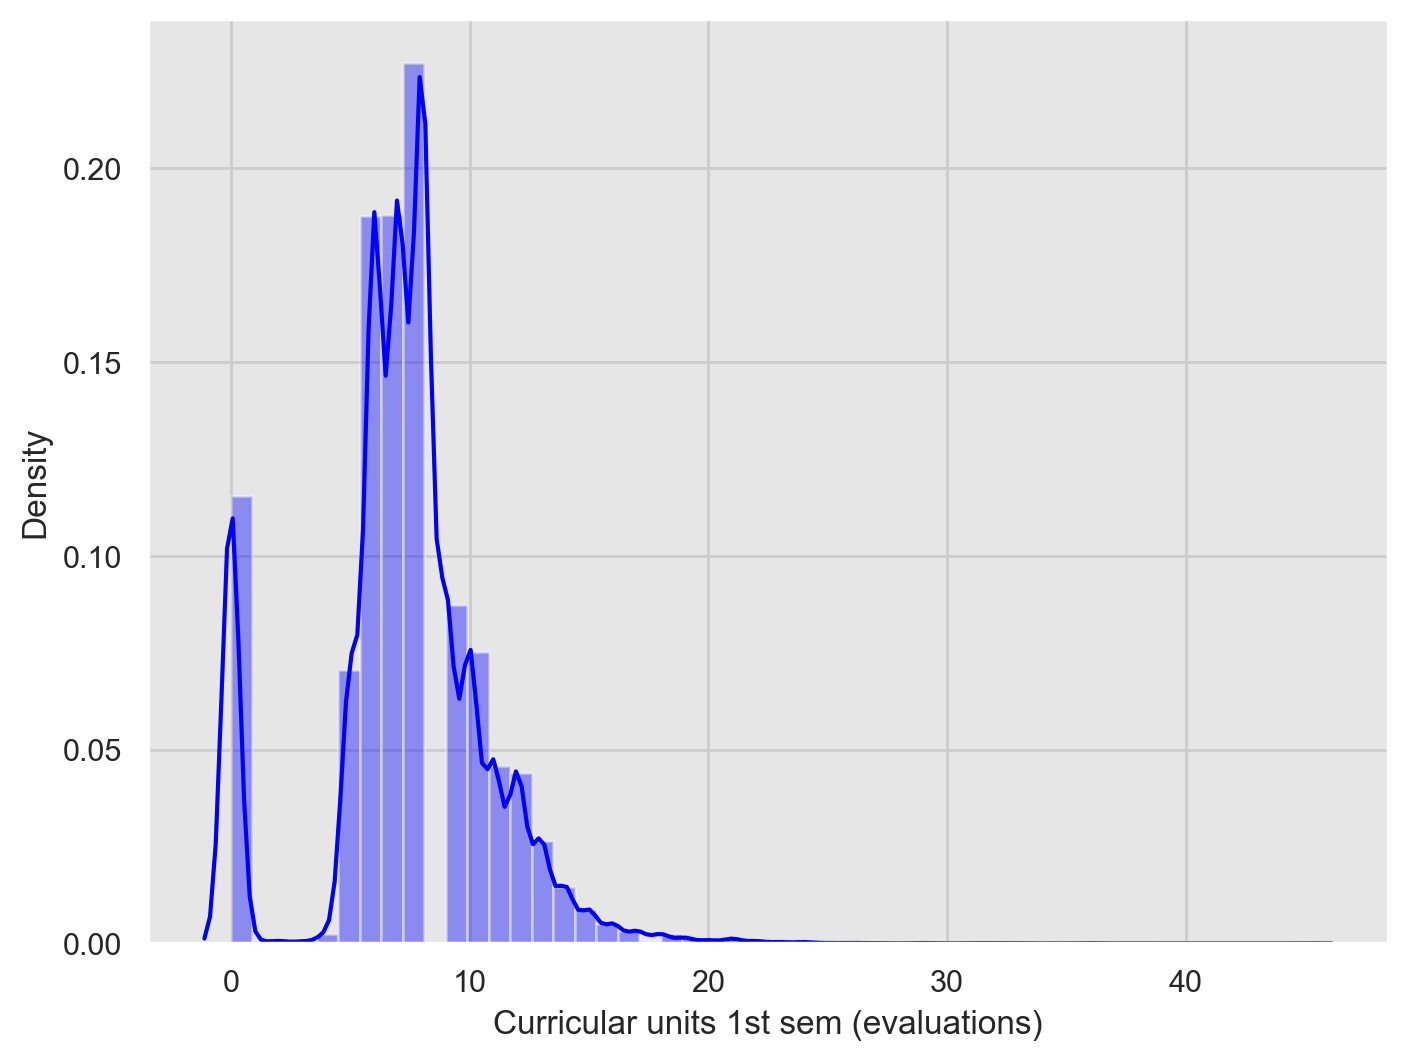

In [138]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(
    a=train_df["Curricular units 1st sem (evaluations)"],
    color="blue",
    ax=ax
) ;

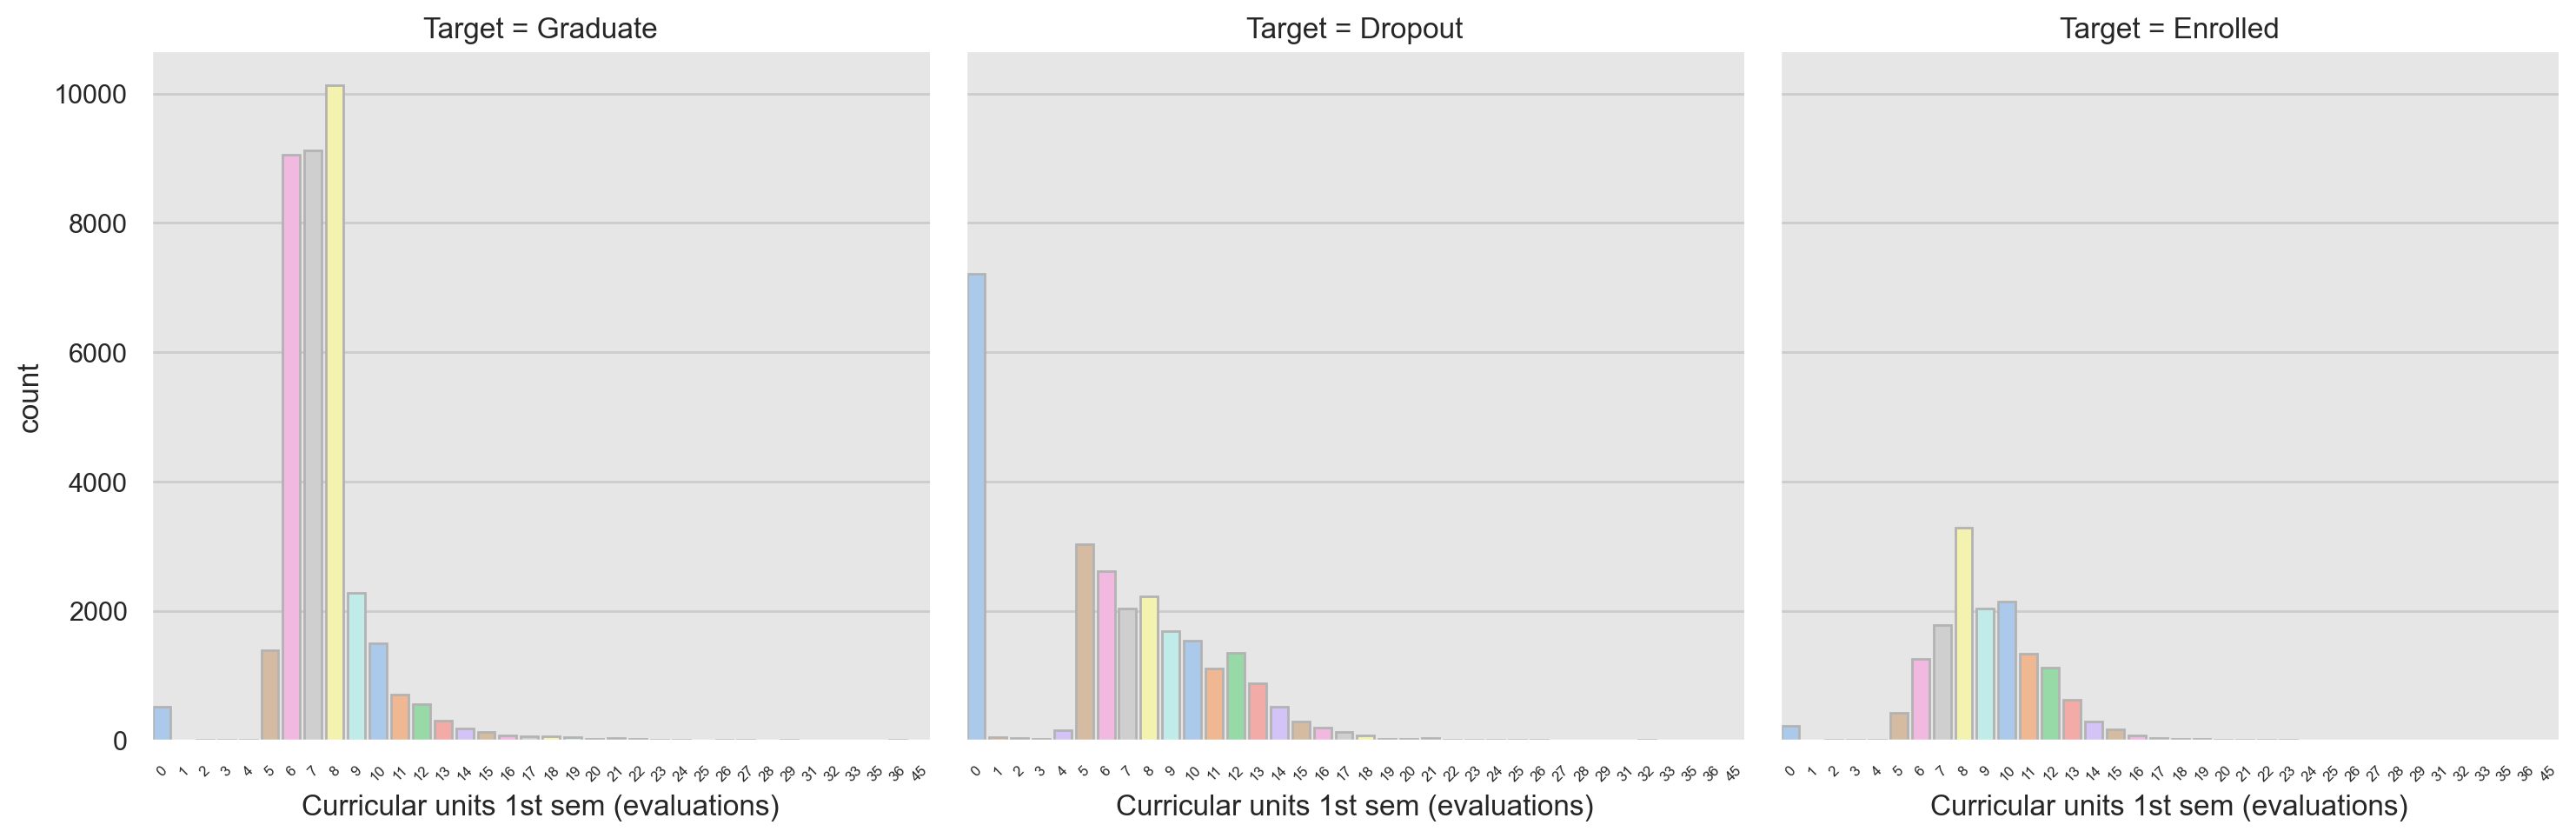

In [139]:
g = sns.catplot(
    data=train_df,
    x="Curricular units 1st sem (evaluations)",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=6, ha="center") ;

In [34]:
col = "Curricular units 1st sem (evaluations)"
top = 3

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    filter_dfs.append(temp_df[col].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", col, "count"]]    
filter_df

target  Curricular units 1st sem (evaluations)  count
0  Graduate                                       8  10130
1  Graduate                                       7   9117
2  Graduate                                       6   9050
3   Dropout                                       0   7212
4   Dropout                                       5   3034
5   Dropout                                       6   2621
6  Enrolled                                       8   3286
7  Enrolled                                      10   2148
8  Enrolled                                       9   2043

### Target and "Curricular units 2nd sem (evaluations)"
- 2학기 교과단위 평가횟수
    - Graduated : 8
    - Dropout : 0
    - Enrolled : 8

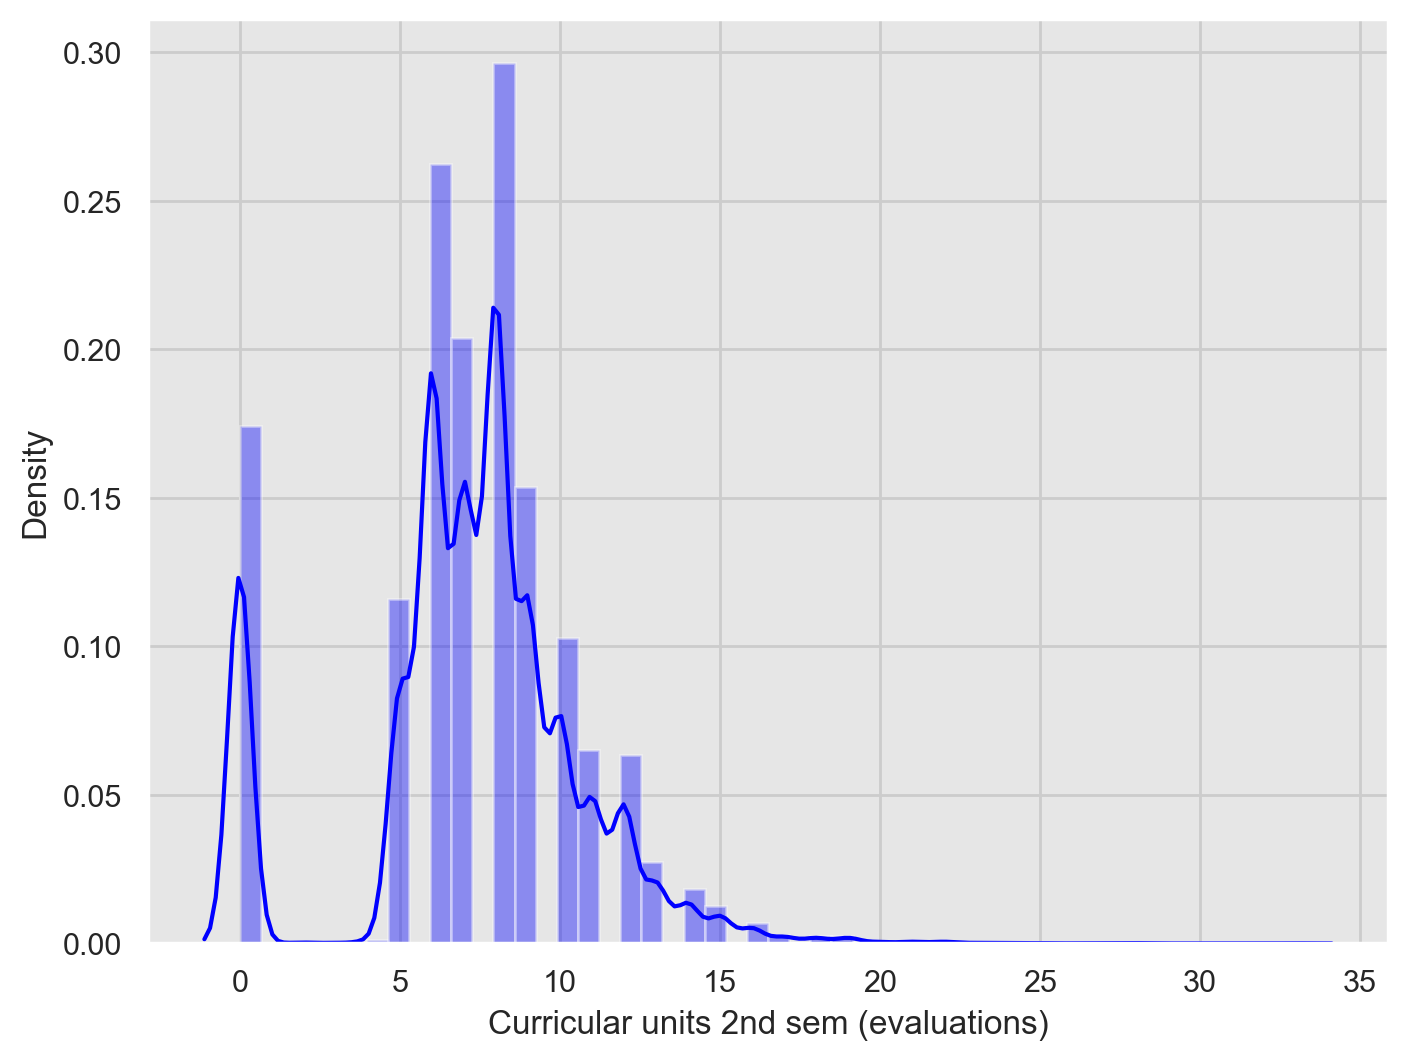

In [141]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(
    a=train_df["Curricular units 2nd sem (evaluations)"],
    color="blue",
    ax=ax
) ;

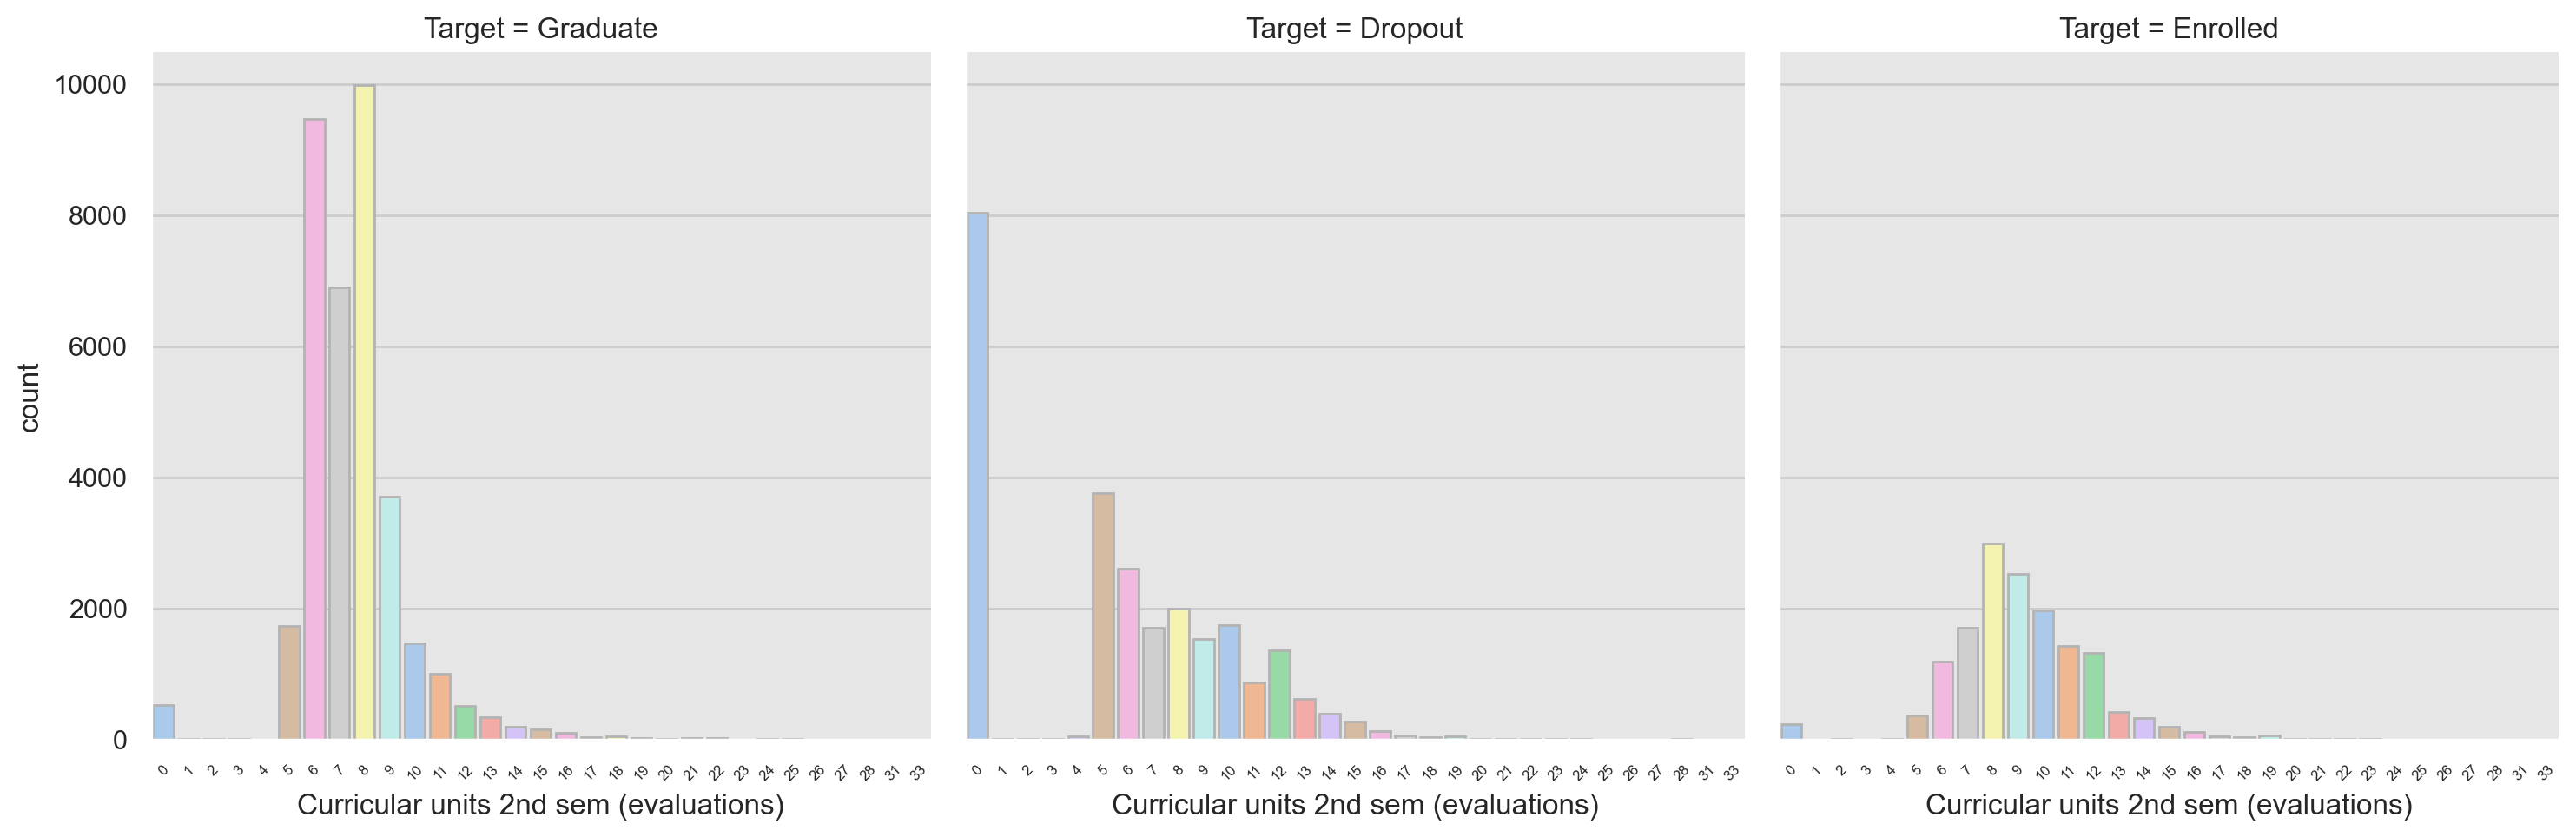

In [142]:
g = sns.catplot(
    data=train_df,
    x="Curricular units 2nd sem (evaluations)",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=6, ha="center") ;

In [35]:
col = "Curricular units 2nd sem (evaluations)"
top = 3

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    filter_dfs.append(temp_df[col].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", col, "count"]]    
filter_df

target  Curricular units 2nd sem (evaluations)  count
0  Graduate                                       8   9983
1  Graduate                                       6   9467
2  Graduate                                       7   6890
3   Dropout                                       0   8039
4   Dropout                                       5   3758
5   Dropout                                       6   2599
6  Enrolled                                       8   2986
7  Enrolled                                       9   2526
8  Enrolled                                      10   1974

### Target and "Curricular units 2nd sem (without evaluations)"
- 2학기 평가가 없는 교과목 단위 수
   - Graduated : 0
   - Dropout : 0
   - Enrolled : 0
- 2학기에 평가를 하지 않은 교과목은 거의 없었다.    

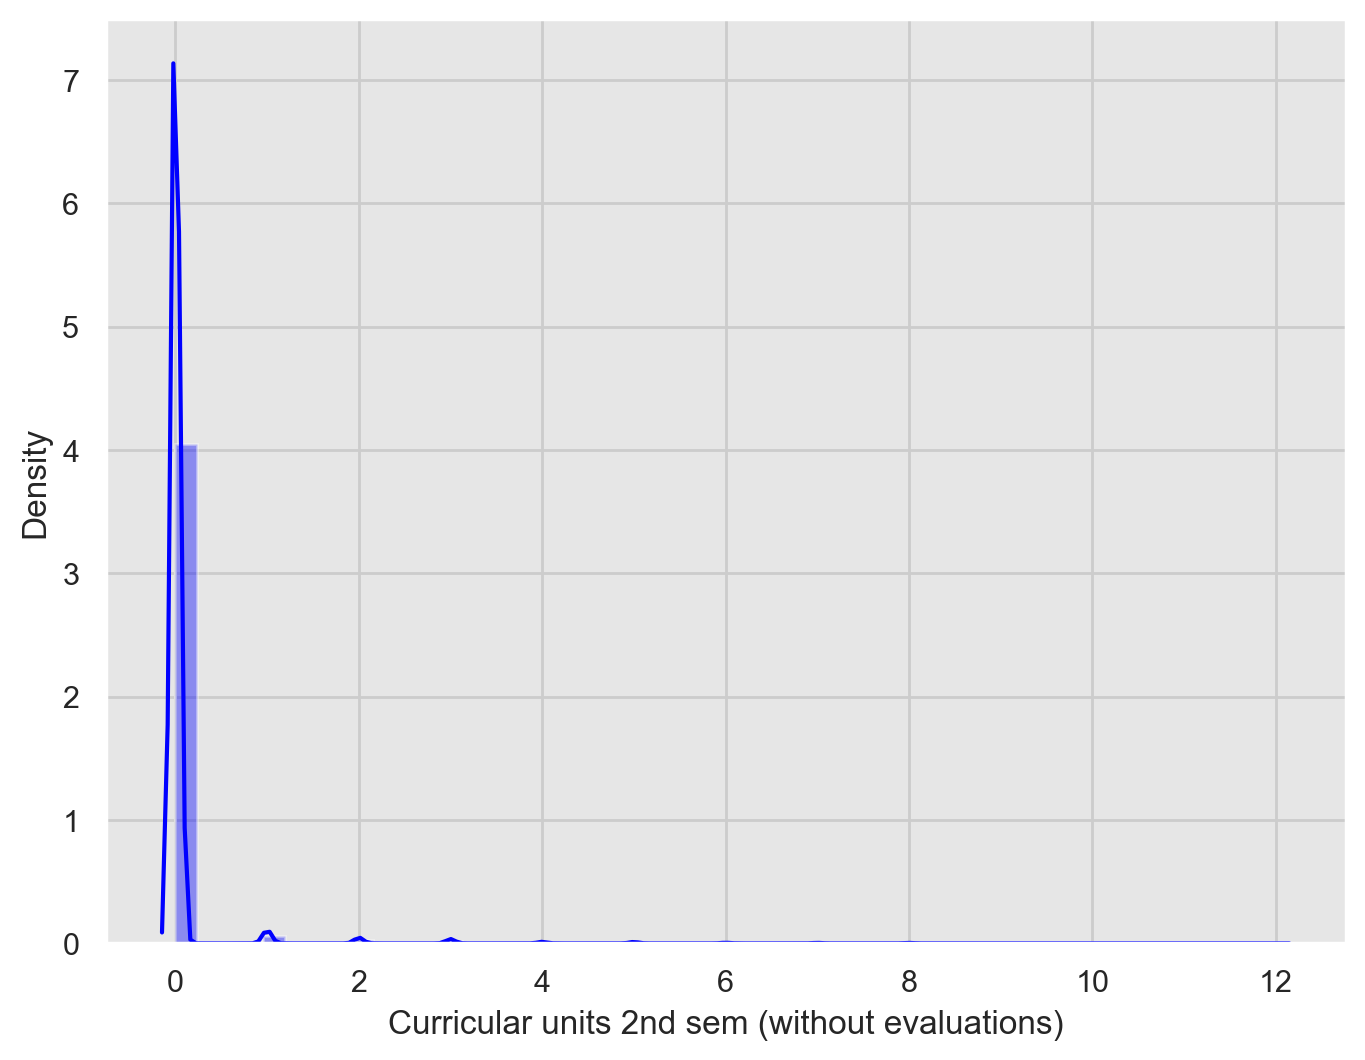

In [146]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(
    a=train_df["Curricular units 2nd sem (without evaluations)"],
    color="blue",
    ax=ax
) ;

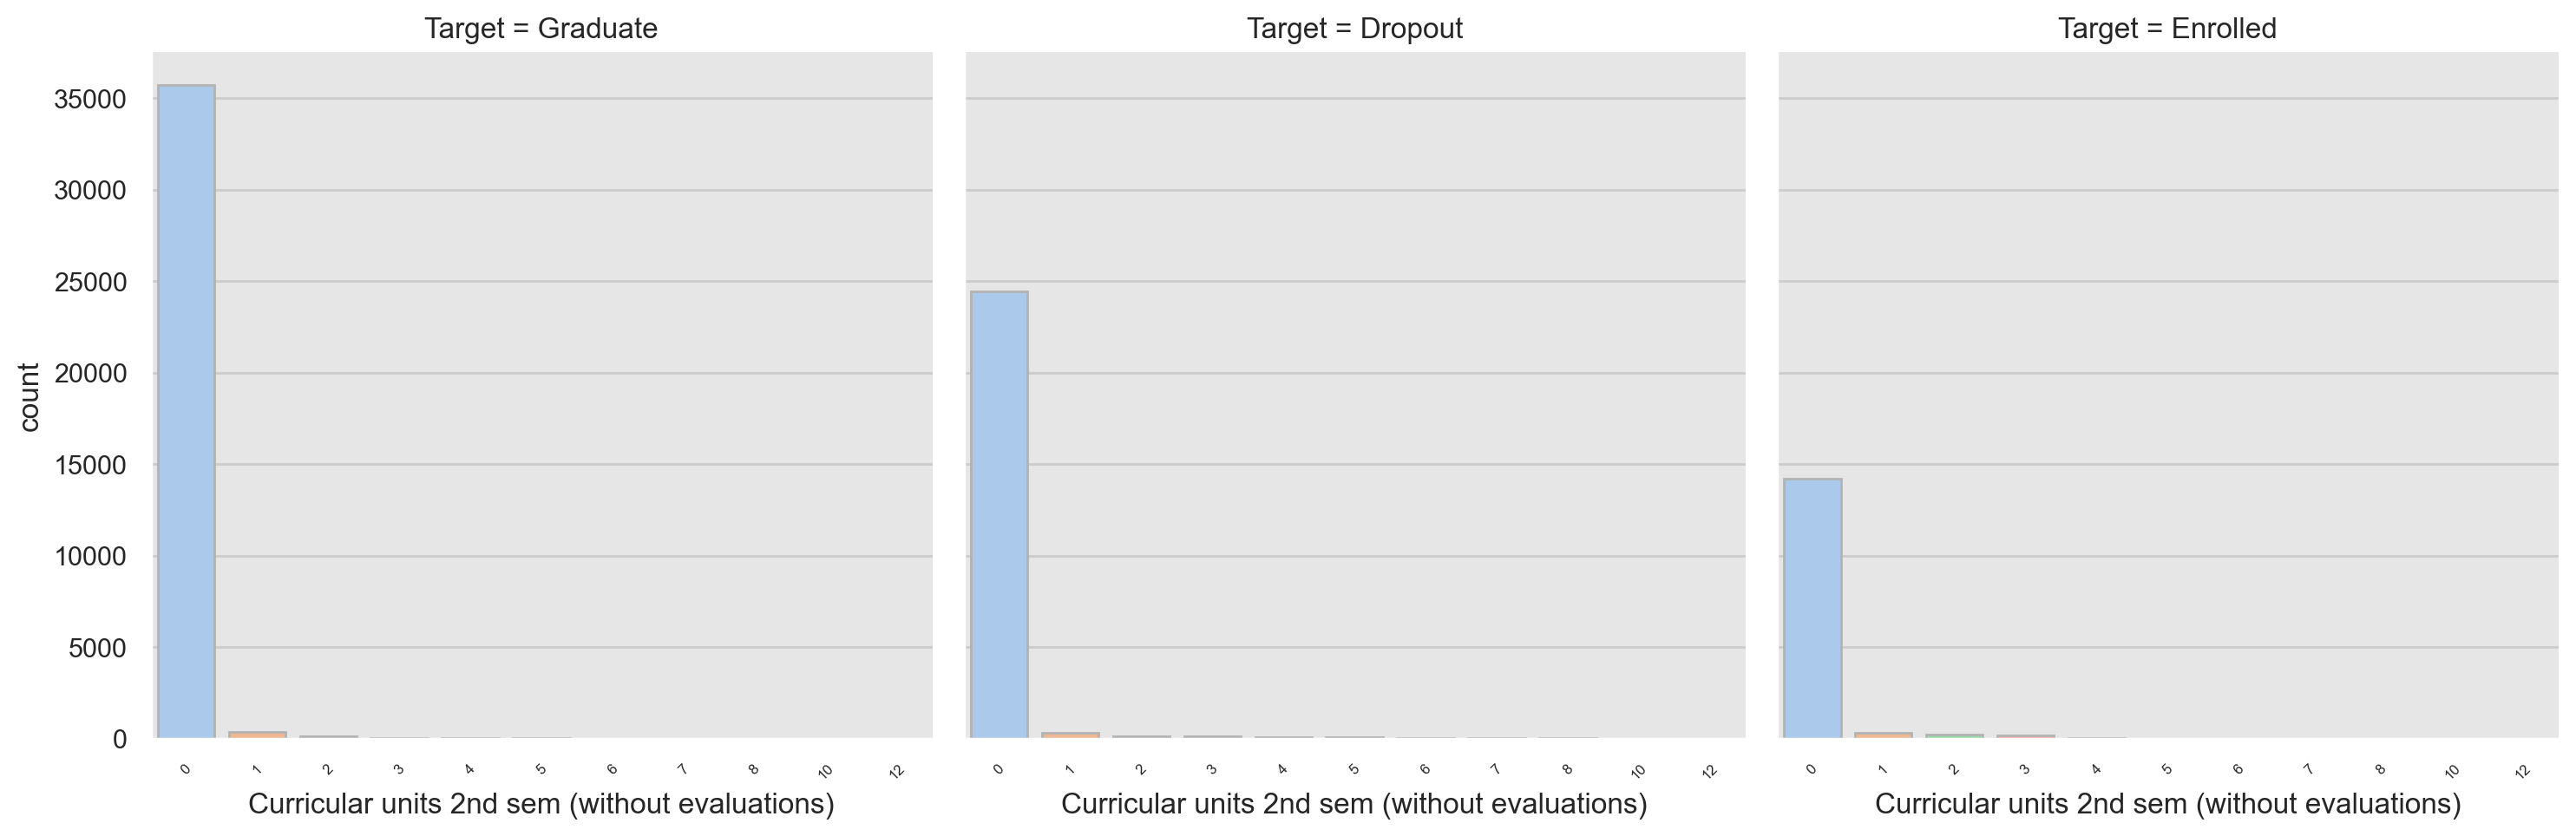

In [147]:
g = sns.catplot(
    data=train_df,
    x="Curricular units 2nd sem (without evaluations)",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=6, ha="center") ;

In [36]:
col = "Curricular units 2nd sem (without evaluations)"
top = 3

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    filter_dfs.append(temp_df[col].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", col, "count"]]    
filter_df

target  Curricular units 2nd sem (without evaluations)  count
0  Graduate                                               0  35731
1  Graduate                                               1    366
2  Graduate                                               2    107
3   Dropout                                               0  24440
4   Dropout                                               1    326
5   Dropout                                               2    134
6  Enrolled                                               0  14201
7  Enrolled                                               1    336
8  Enrolled                                               2    198

### Target and "Curricular units 1st sem (without evaluations)"
- 1학기 평가가 없는 교과목 단위 수
   - Graduated : 0
   - Dropout : 0
   - Enrolled : 0

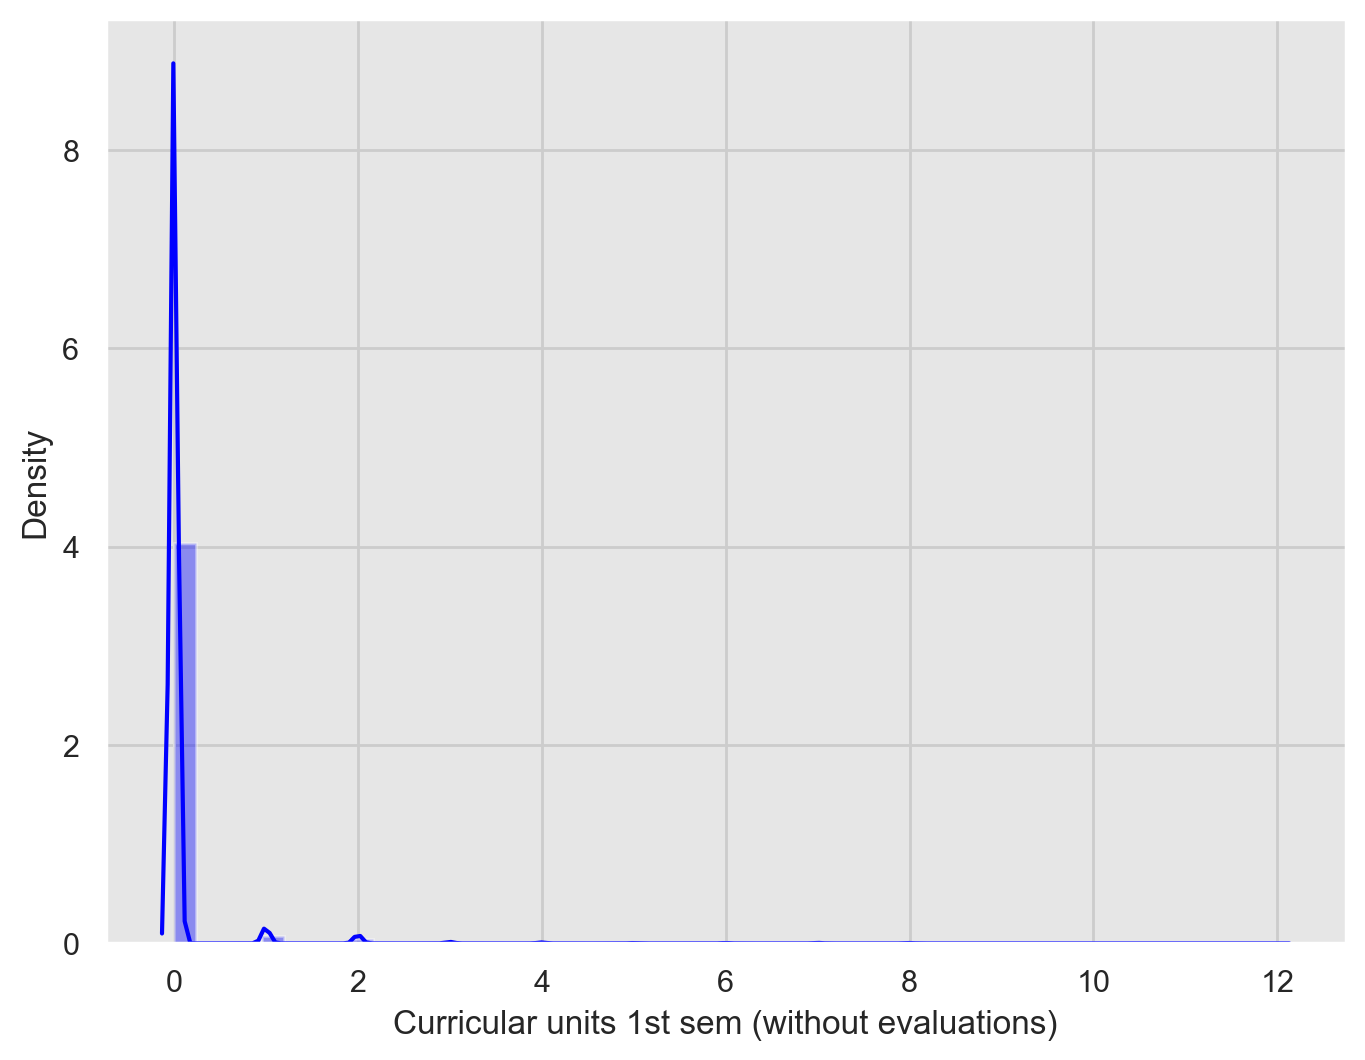

In [150]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(
    a=train_df["Curricular units 1st sem (without evaluations)"],
    color="blue",
    ax=ax
) ;

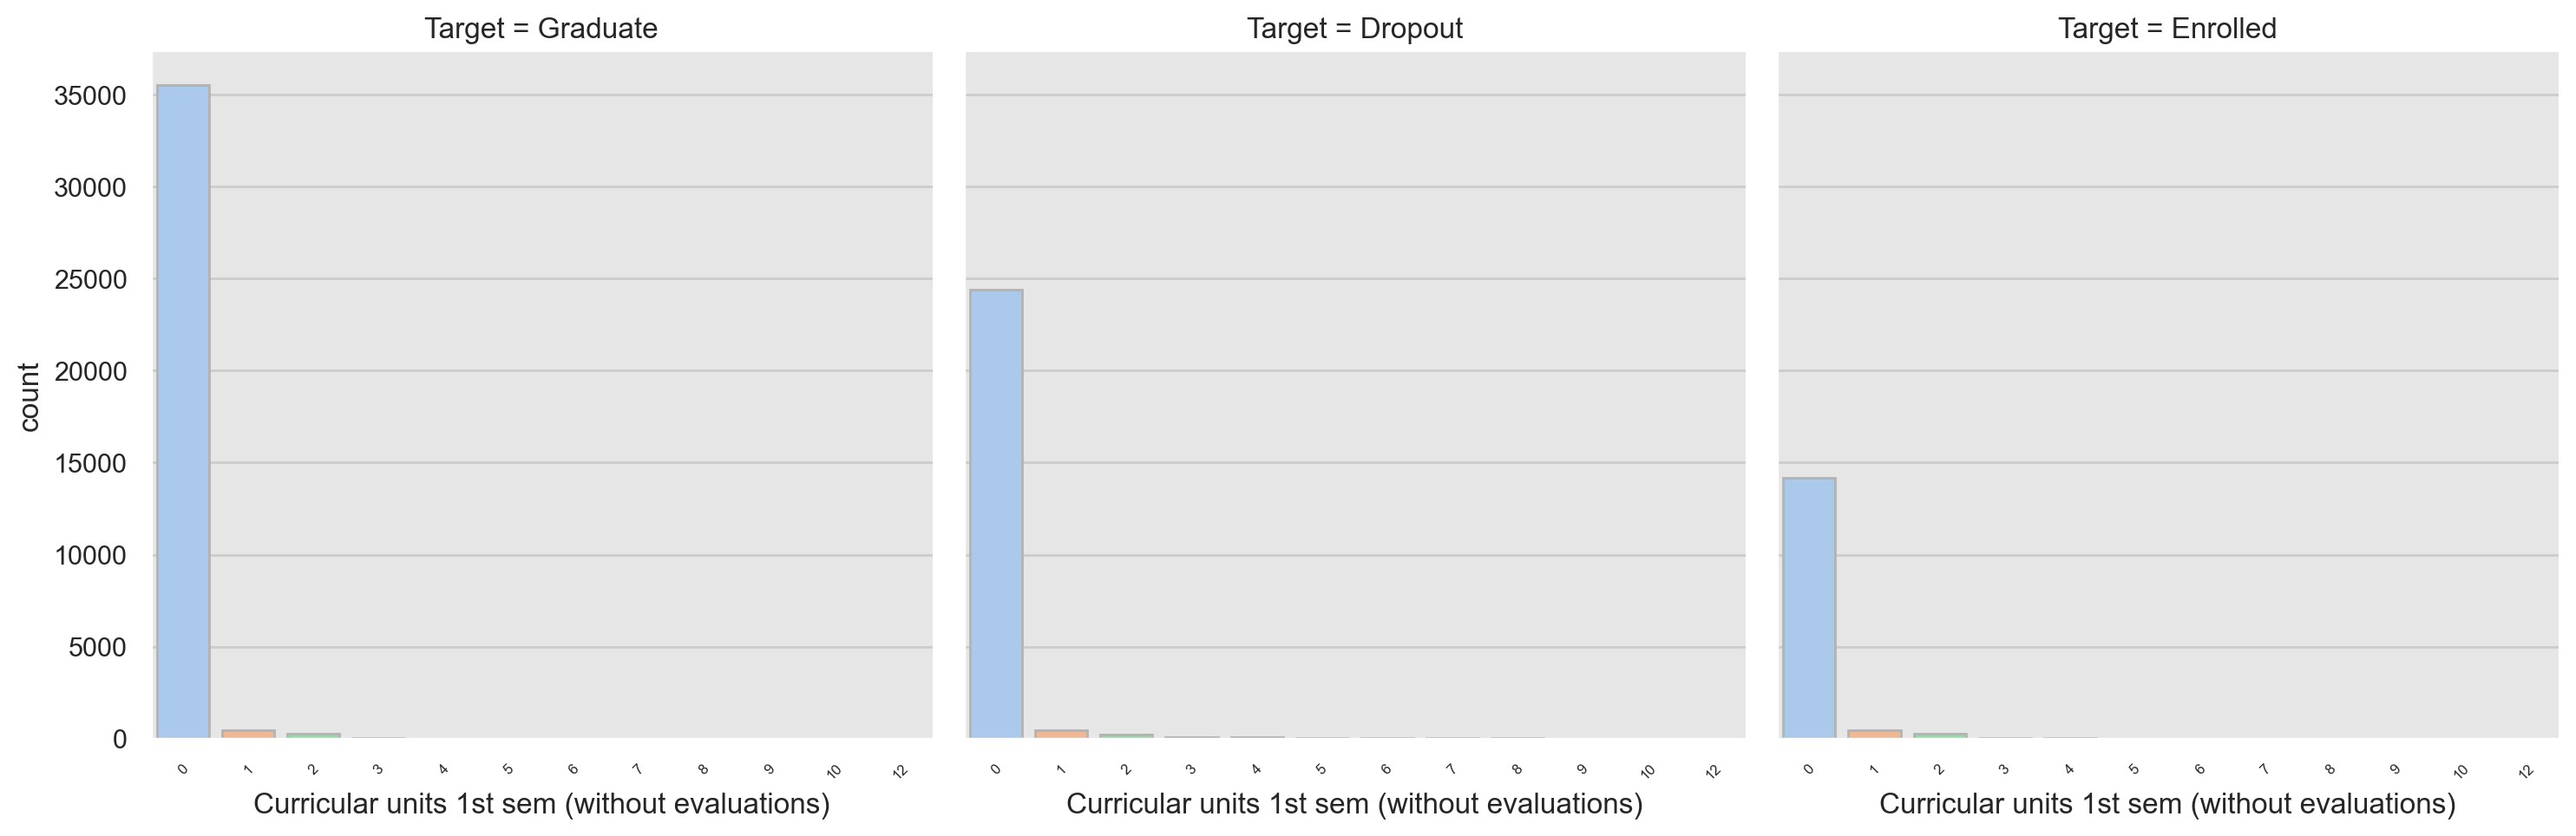

In [151]:
g = sns.catplot(
    data=train_df,
    x="Curricular units 1st sem (without evaluations)",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=6, ha="center") ;

In [37]:
col = "Curricular units 1st sem (without evaluations)"
top = 3

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    filter_dfs.append(temp_df[col].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", col, "count"]]    
filter_df

target  Curricular units 1st sem (without evaluations)  count
0  Graduate                                               0  35534
1  Graduate                                               1    464
2  Graduate                                               2    246
3   Dropout                                               0  24379
4   Dropout                                               1    434
5   Dropout                                               2    230
6  Enrolled                                               0  14156
7  Enrolled                                               1    473
8  Enrolled                                               2    270

### 그 외 feature와 Target의 분포

### Target 별 "Mother's qualification" 분포
- 어머니의 최종 학력
    - Graduated : 1 Secondary Education 12th Year of Schooling or Eq.
    - Dropout : 37 Basic education 1st cycle (4th/5th year) or equiv.
    - Enrolled : 1 Secondary Education 12th Year of Schooling or Eq.
- 특정 학력 카테고리에 데이터가 몰려 있다.    

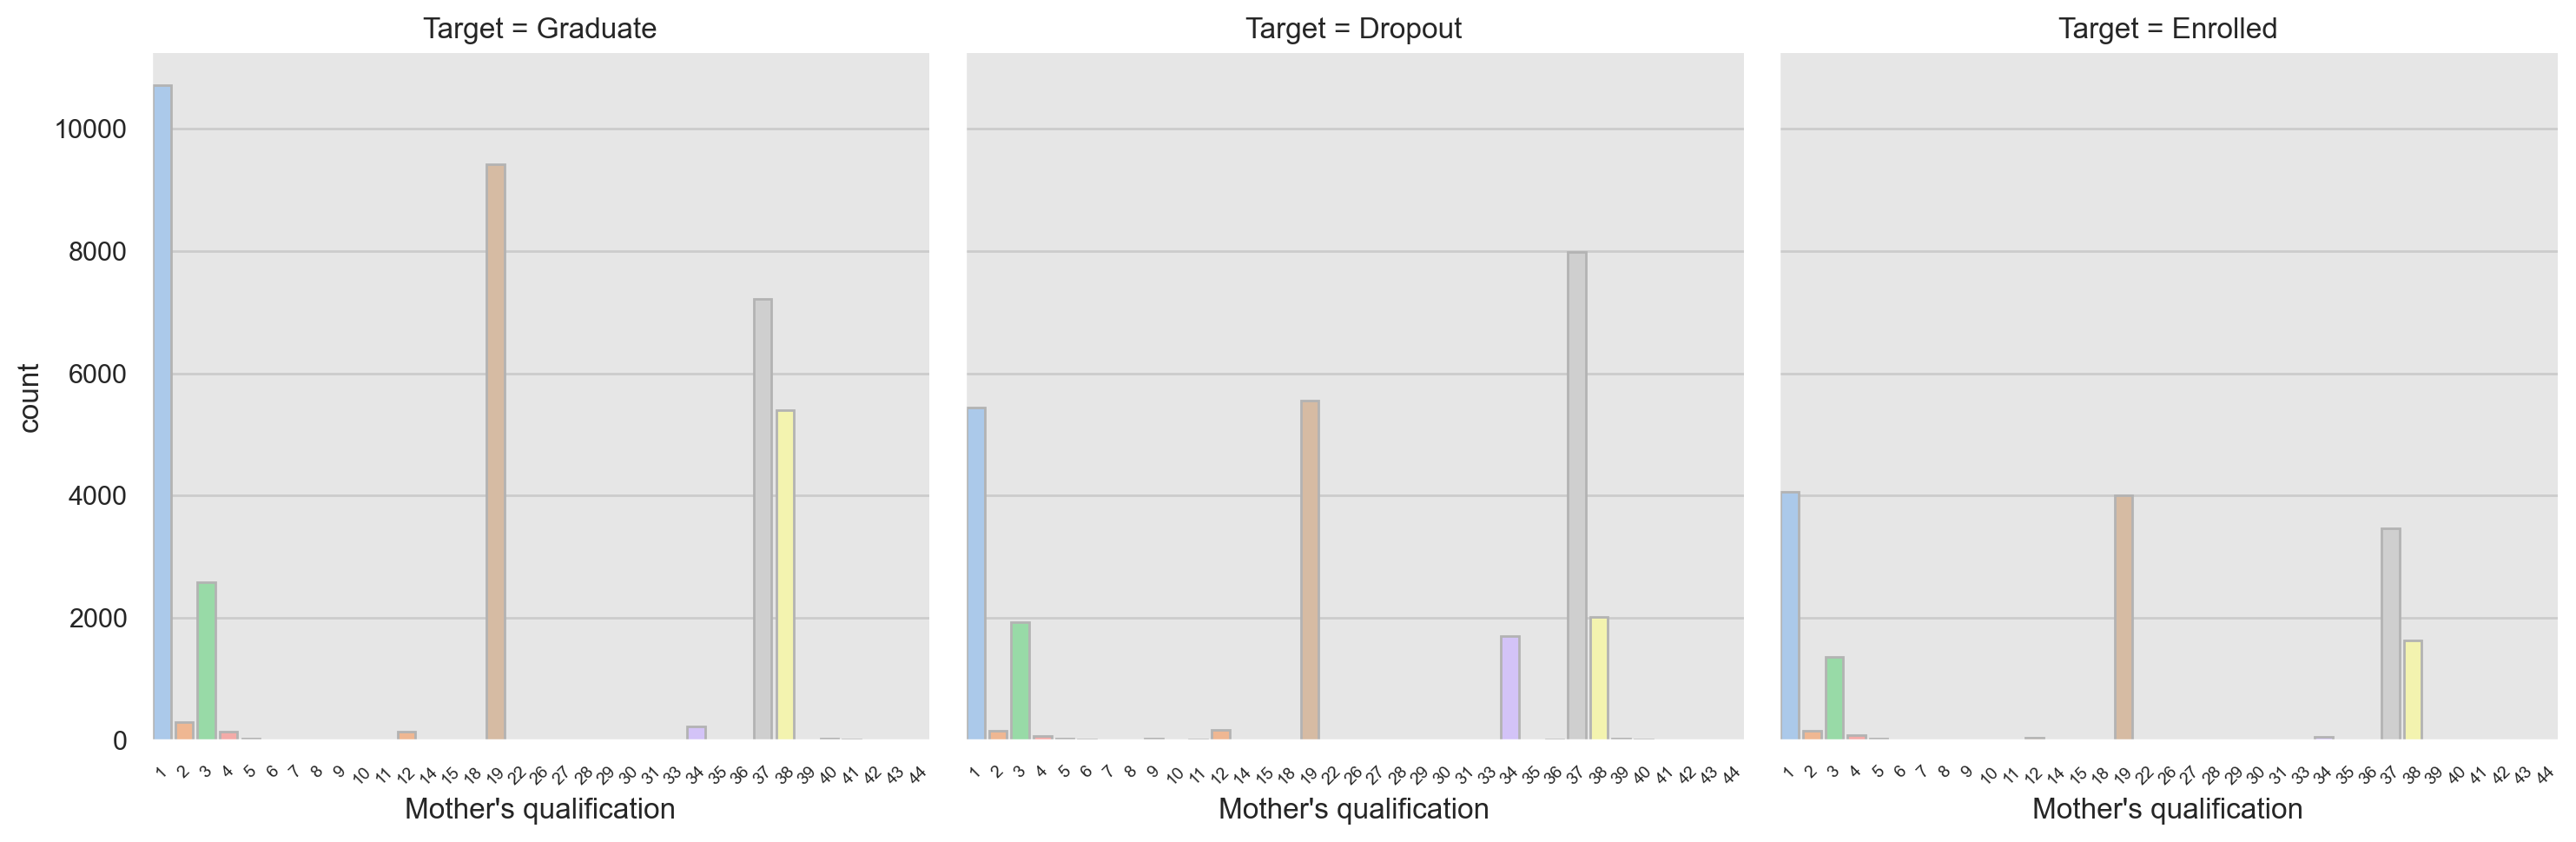

In [123]:
g = sns.catplot(
    data=train_df,
    x="Mother's qualification",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=7, ha="center") ;

In [53]:
col = "Mother's qualification"
top = 3
cate_descs = clean_desc(col)
mapper = dict(cate_descs)

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    temp_df["desc"] = temp_df[col].astype(str).map(mapper)
    temp_df["desc"] = temp_df[col].astype(str) + " " + temp_df["desc"]
    filter_dfs.append(temp_df["desc"].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", "desc", "count"]]    
filter_df

target                                                         desc  \
0  Graduate          1 Secondary Education 12th Year of Schooling or Eq.   
1  Graduate  19 Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
2  Graduate        37 Basic education 1st cycle (4th/5th year) or equiv.   
3   Dropout        37 Basic education 1st cycle (4th/5th year) or equiv.   
4   Dropout  19 Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
5   Dropout          1 Secondary Education 12th Year of Schooling or Eq.   
6  Enrolled          1 Secondary Education 12th Year of Schooling or Eq.   
7  Enrolled  19 Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
8  Enrolled        37 Basic education 1st cycle (4th/5th year) or equiv.   

   count  
0  10699  
1   9411  
2   7214  
3   7981  
4   5558  
5   5446  
6   4057  
7   4011  
8   3469

### Target 별 "Father's qualification" 의 분포
- 아버지의 최종 학력
    - Graduated : 37 Basic education 1st cycle (4th/5th year) or equiv.
    - Dropout : 37 Basic education 1st cycle (4th/5th year) or equiv.	
    - Enrolled : 37 Basic education 1st cycle (4th/5th year) or equiv.	
- 특정 학력 카테고리에 데이터가 치우쳐져 있다.     

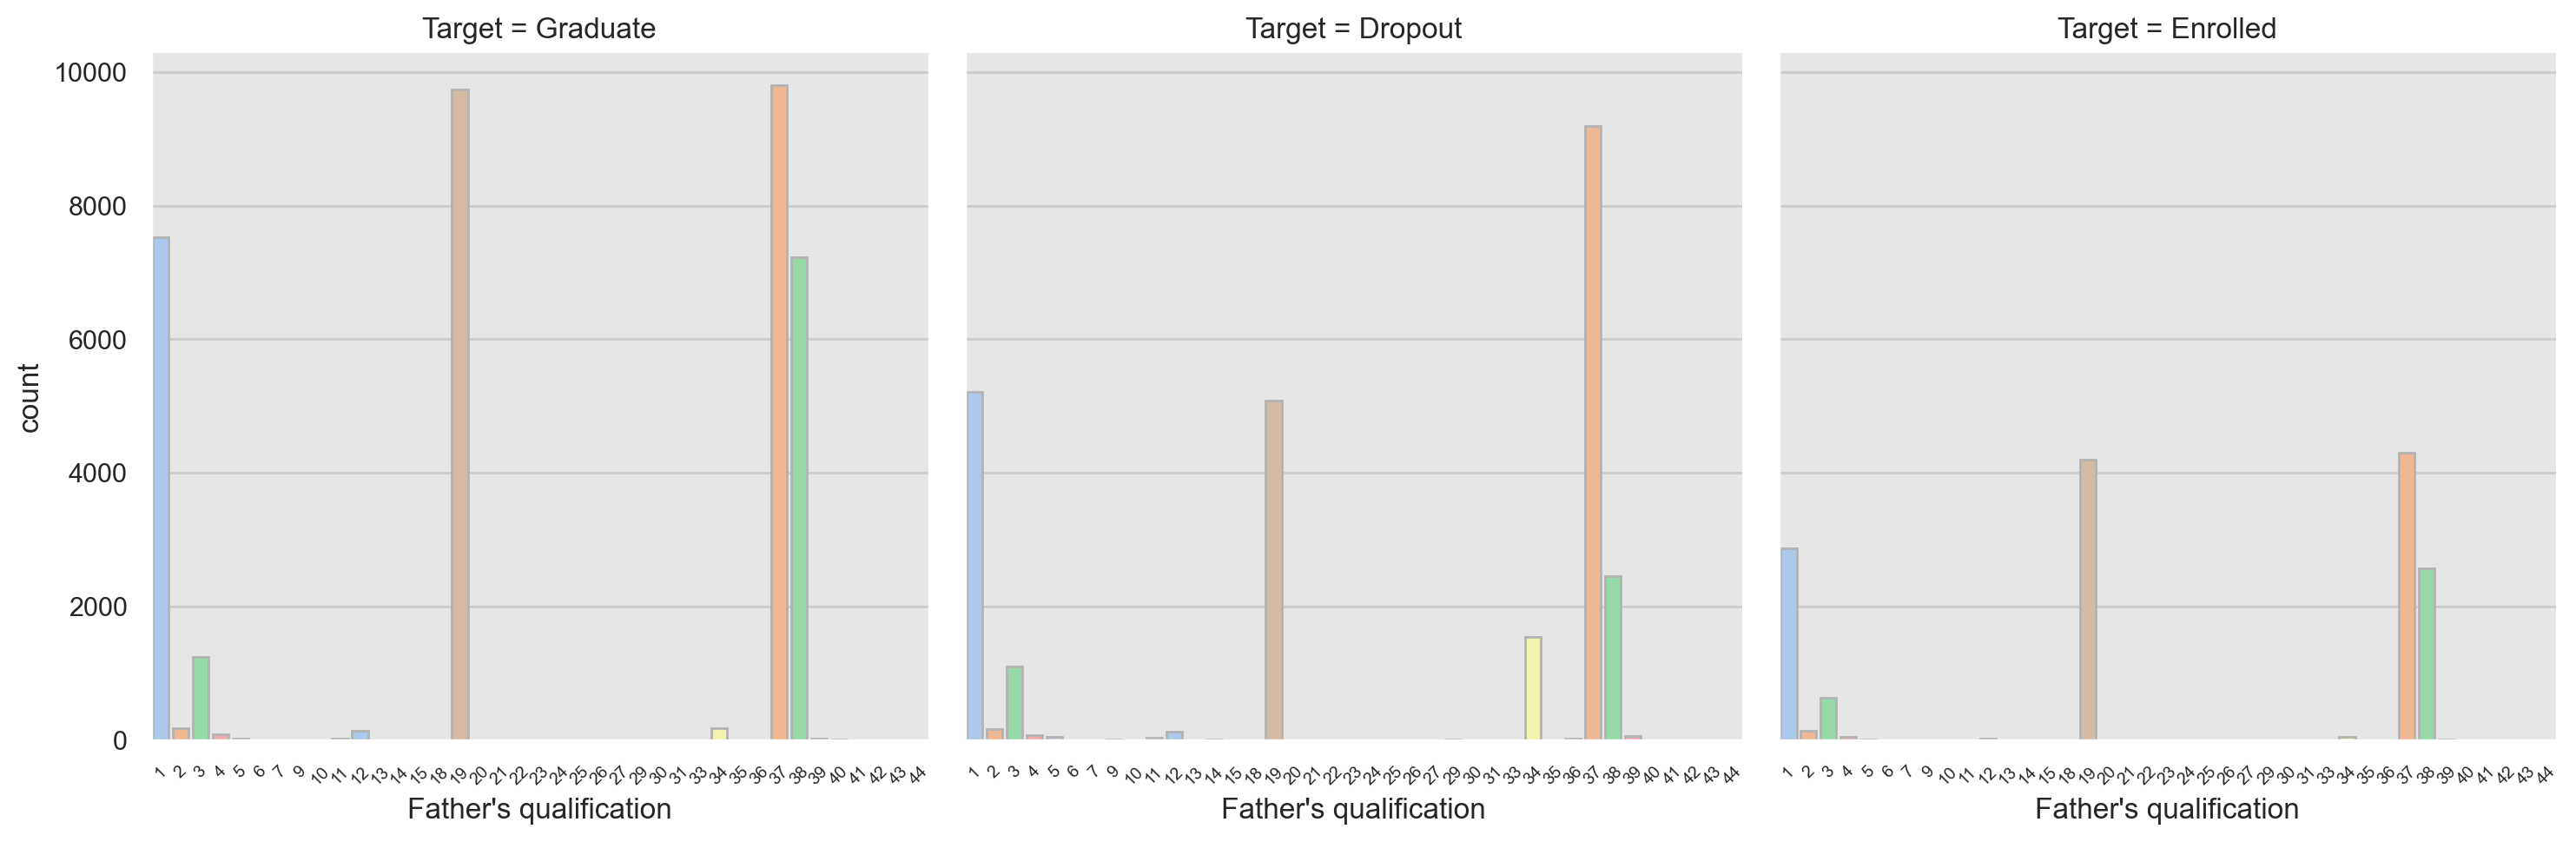

In [158]:
g = sns.catplot(
    data=train_df,
    x="Father's qualification",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=7, ha="center") ;

In [54]:
col = "Father's qualification"
top = 3
cate_descs = clean_desc(col)
mapper = dict(cate_descs)

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    temp_df["desc"] = temp_df[col].astype(str).map(mapper)
    temp_df["desc"] = temp_df[col].astype(str) + " " + temp_df["desc"]
    filter_dfs.append(temp_df["desc"].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", "desc", "count"]]    
filter_df

target                                                         desc  \
0  Graduate        37 Basic education 1st cycle (4th/5th year) or equiv.   
1  Graduate  19 Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
2  Graduate          1 Secondary Education 12th Year of Schooling or Eq.   
3   Dropout        37 Basic education 1st cycle (4th/5th year) or equiv.   
4   Dropout          1 Secondary Education 12th Year of Schooling or Eq.   
5   Dropout  19 Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
6  Enrolled        37 Basic education 1st cycle (4th/5th year) or equiv.   
7  Enrolled  19 Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
8  Enrolled          1 Secondary Education 12th Year of Schooling or Eq.   

   count  
0   9794  
1   9730  
2   7521  
3   9190  
4   5207  
5   5088  
6   4306  
7   4197  
8   2876

### Target 별 "Displaced" 의 분포
- 추방 여부
   - Graduated : yes > no
   - Dropout : yes > no
   - Enrolled : yes > no

In [167]:
displaced_desc = clean_desc("Displaced")
displaced_desc.sort()
displaced_desc

[('0', 'no'), ('1', 'yes')]

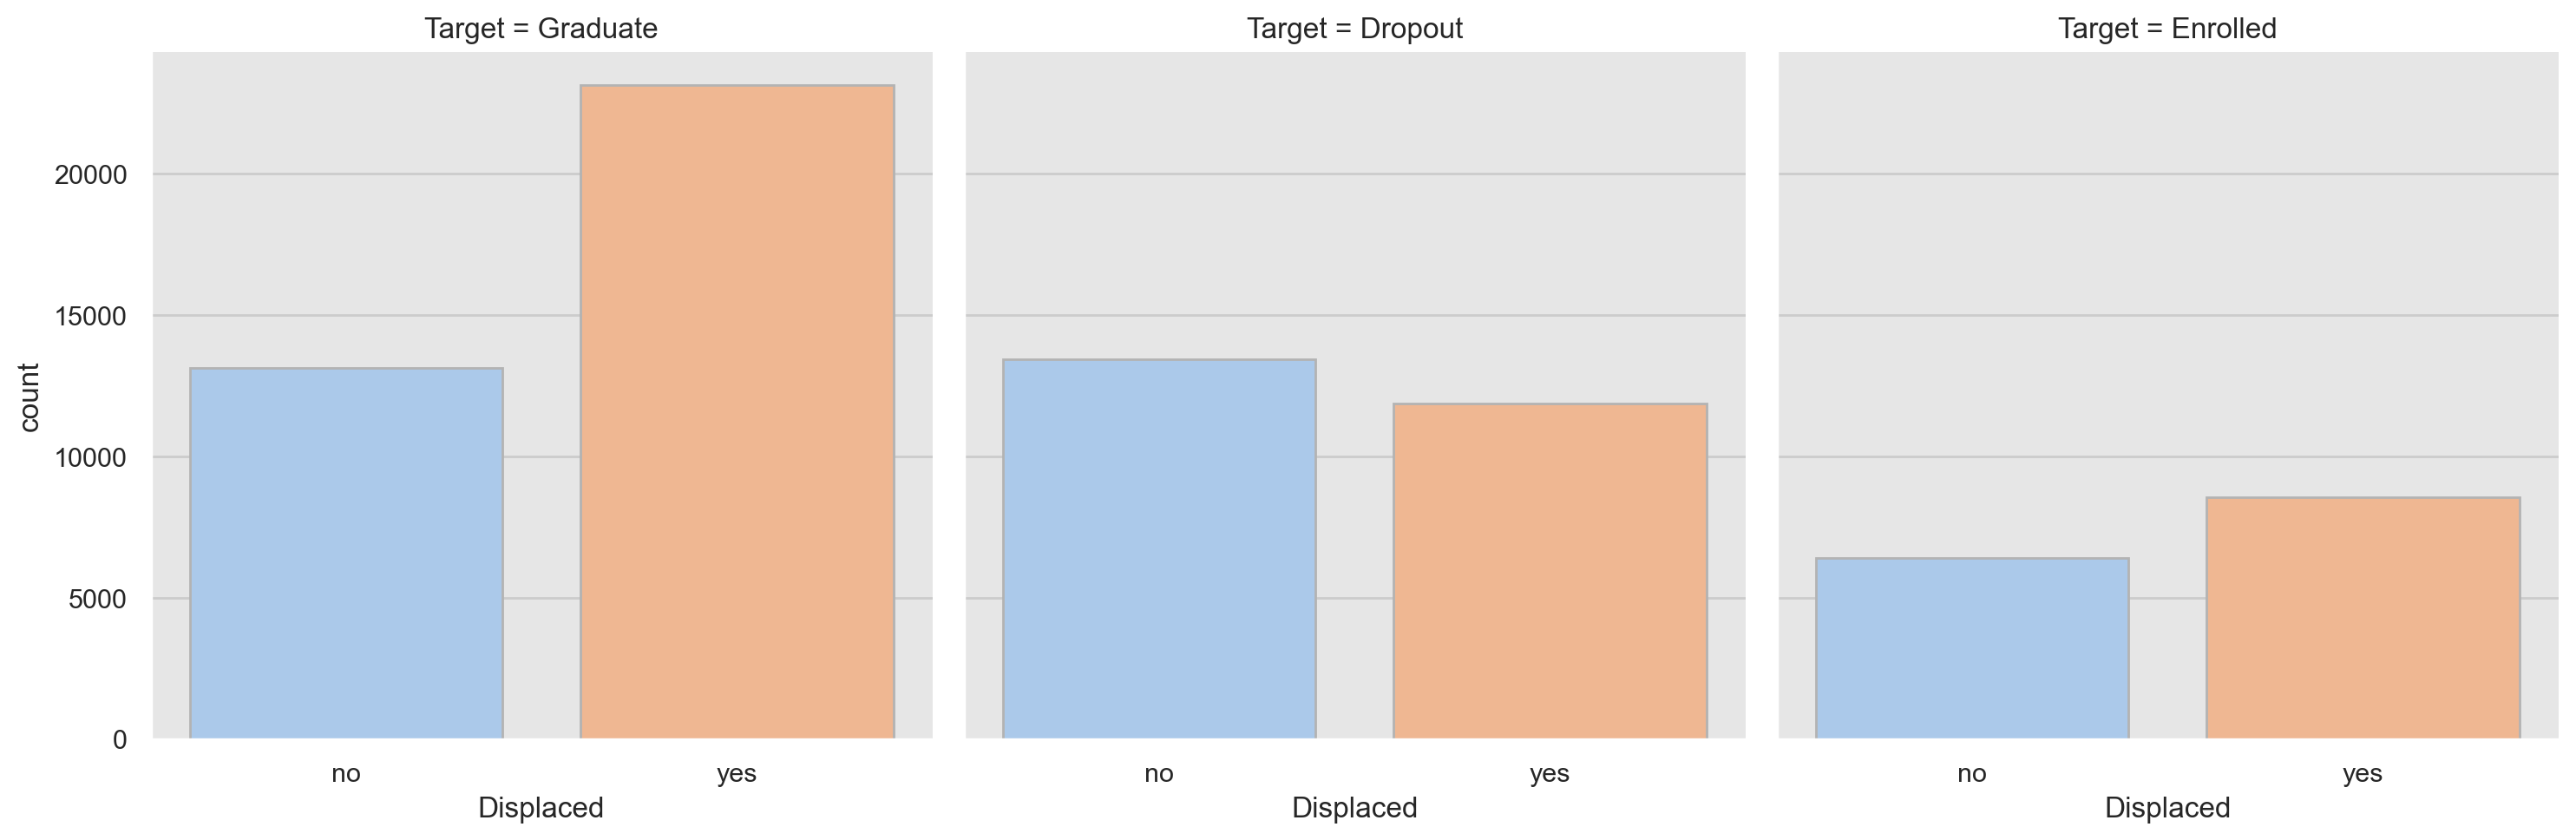

In [168]:
g = sns.catplot(
    data=train_df,
    x="Displaced",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(labels=[ele[1] for ele in displaced_desc]) ;

### Target 별 "Debtor"의 분포
- 채무 여부
   - Graduated : yes < no
   - Dropout : yes < no
   - Enrolled : yes < no

In [58]:
debtor_desc = clean_desc("Debtor")
debtor_desc.sort()
debtor_desc

[('0', 'no'), ('1', 'yes')]

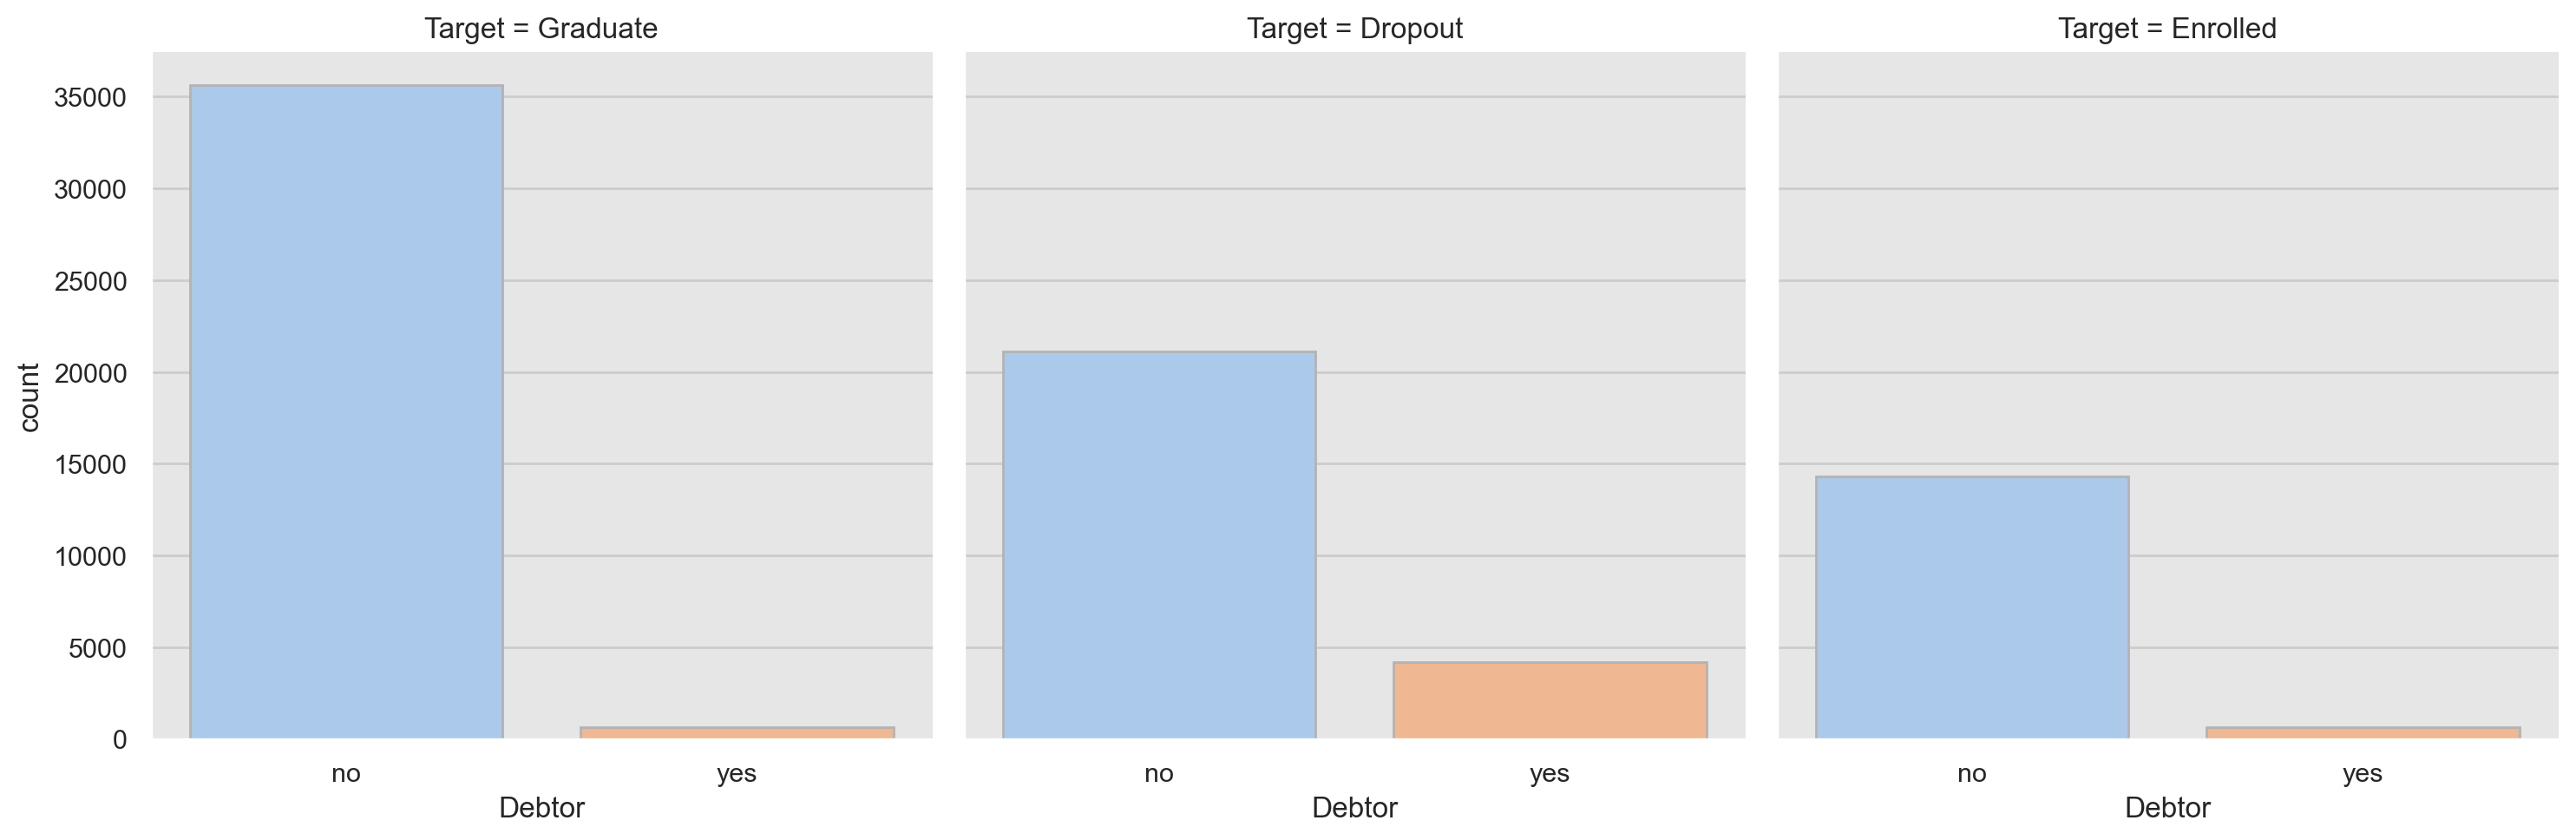

In [59]:
g = sns.catplot(
    data=train_df,
    x="Debtor",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(labels=[ele[1] for ele in debtor_desc]) ;

### Target 별 Nacionanlity 의 분포
- 민족
   - Graduated : 1 Portuguese
   - Dropout : 1 Portuguese
   - Enrolled : 1 Portuguese
- 이 데이터는 포르투갈의 한 단체에서 지원하고 있다.   

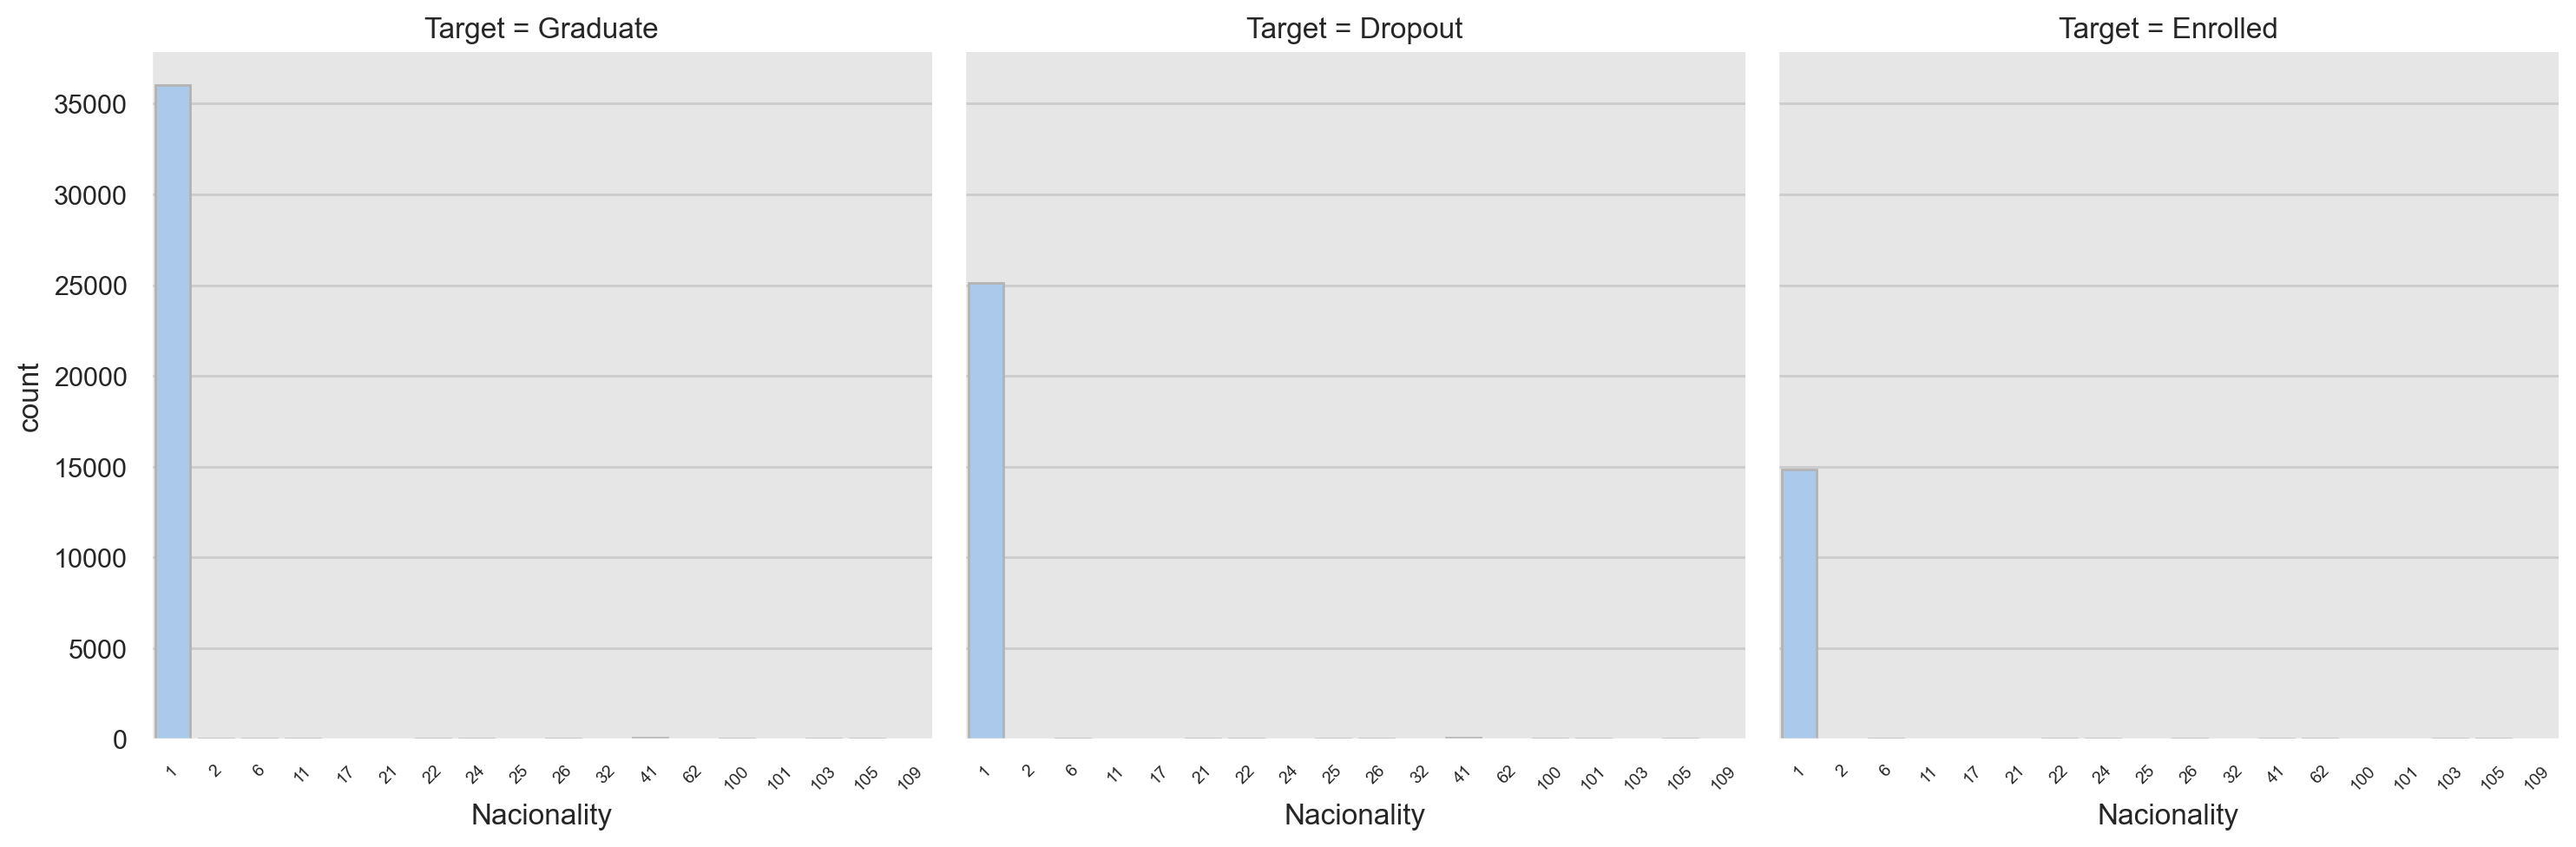

In [60]:
g = sns.catplot(
    data=train_df,
    x="Nacionality",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=7, ha="center") ;

In [61]:
col = "Nacionality"
top = 3
cate_descs = clean_desc(col)
mapper = dict(cate_descs)

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    temp_df["desc"] = temp_df[col].astype(str).map(mapper)
    temp_df["desc"] = temp_df[col].astype(str) + " " + temp_df["desc"]
    filter_dfs.append(temp_df["desc"].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", "desc", "count"]]    
filter_df

target           desc  count
0  Graduate  1 Portuguese;  36040
1  Graduate  41 Brazilian;     93
2  Graduate  26 Santomean;     36
3   Dropout  1 Portuguese;  25125
4   Dropout  41 Brazilian;     95
5   Dropout     6 Spanish;     22
6  Enrolled  1 Portuguese;  14848
7  Enrolled  41 Brazilian;     33
8  Enrolled  26 Santomean;     19

## 2. Modeling

### (1) numeric, categorical features

In [11]:
print(f'''
* numeric features
length : {len(numeric_features)}
{numeric_features}

* categorical features
length : {len(categorical_features)}
{categorical_features}
''')


* numeric features
length : 18
['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'GDP', 'Curricular units 1st sem (enrolled)', 'Previous qualification (grade)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Inflation rate', 'Admission grade', 'Age at enrollment']

* categorical features
length : 18
["Father's occupation", 'Nacionality', 'Educational special needs', 'Debtor', 'Daytime/evening attendance', "Mother's qualification", 'Previous qualification', "Father's qualification", 'Gender', 'Application mode', "Mother's occupation", 'Application order', 'Marital status', 'Displaced', 'Course', 'Tuition fees up to 

### (2) Data Transform

In [12]:
# 전처리, 엔지니어링
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2

# 확률적 판별모형
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 확률적 생성모형
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, CategoricalNB

# 판별모형
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# 앙상블(모형결합)
from sklearn.ensemble import (VotingClassifier, BaggingClassifier, RandomForestClassifier, 
                              ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier)
import xgboost as xgb

### individual, target feature 구분

In [13]:
X = train_df.copy()
X = X.drop(["id", "Target"], axis=1)
Y = train_df["Target"]

print(f'''
shape of train X : {X.shape}
shape of train Y : {Y.shape}
''')


shape of train X : (76518, 36)
shape of train Y : (76518,)



### Target feature Encoding

In [14]:
label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(Y)
y_enc

array([2, 0, 0, ..., 1, 0, 2])

In [15]:
label_enc.classes_

array(['Dropout', 'Enrolled', 'Graduate'], dtype=object)

### individual features transform

In [16]:
X[categorical_features] = X[categorical_features].astype("category")
X[categorical_features].dtypes

Father's occupation           category
Nacionality                   category
Educational special needs     category
Debtor                        category
Daytime/evening attendance    category
Mother's qualification        category
Previous qualification        category
Father's qualification        category
Gender                        category
Application mode              category
Mother's occupation           category
Application order             category
Marital status                category
Displaced                     category
Course                        category
Tuition fees up to date       category
International                 category
Scholarship holder            category
dtype: object

### numerical, categorical features 변환을 위한 pipeline 생성
- feature_preprocessor에서 num_transformer와 cat_transformer을 설정할 수 있다. 

In [32]:
num_transformer = Pipeline(steps=[
    ("ss", StandardScaler()),
    ("mms", MinMaxScaler()),
    ("non_scaler", "passthrough")
])

cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder()),
    ("ordinal", OrdinalEncoder()),
    ("non_encoder", "passthrough")
])

feature_preprocessor = ColumnTransformer(
    transformers=[
        ("num_transformer", num_transformer, numeric_features),
        ("cat_transformer", cat_transformer, categorical_features)
    ], remainder="passthrough"
)

feature_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_transformer',
                                 Pipeline(steps=[('ss', StandardScaler()),
                                                 ('mms', MinMaxScaler()),
                                                 ('non_scaler',
                                                  'passthrough')]),
                                 ['Previous qualification (grade)',
                                  'Curricular units 1st sem (evaluations)',
                                  'Curricular units 2nd sem (evaluations)',
                                  'Curricular units 2nd sem (grade)',
                                  'Inflation rate', 'Age at enrollment',
                                  'Curricula...
                                                  'passthrough')]),
                                 ['Daytime/evening attendance',
                                  "Father's occupation",
                                  'Tuition fees up to date',
                                  'Application order', 'Application mode',
                                  'Educational special needs', 'Marital status',
                                  'Previous qualification', 'Debtor',
                                  "Mother's occupation", 'Gender',
                                  "Mother's qualification",
                                  'Scholarship holder', 'Course', 'Displaced',
                                  'International', 'Nacionality',
                                  "Father's qualification"])])

### StandardScaler, OneHotEncoder 적용

In [33]:
feature_preprocessor.set_params(
    num_transformer=num_transformer["ss"],
    cat_transformer=cat_transformer["onehot"]
)

X_trans = feature_preprocessor.fit_transform(X).toarray()
X_trans = pd.DataFrame(X_trans, columns=[c.split("__")[1] for c in feature_preprocessor.get_feature_names_out()])
X_trans.head()

Previous qualification (grade)  Curricular units 1st sem (evaluations)  \
0                       -0.580138                               -0.385478   
1                       -0.671086                                0.184603   
2                        0.420293                               -2.095724   
3                       -0.125396                                0.469644   
4                       -0.034448                                1.324767   

   Curricular units 2nd sem (evaluations)  Curricular units 2nd sem (grade)  \
0                               -0.066933                          0.505317   
1                                0.504003                         -1.735681   
2                               -2.065210                         -1.735681   
3                                1.074940                          0.575895   
4                                1.360408                          0.596330   

   Inflation rate  Age at enrollment  Curricular units 1st sem (enrolled)  \
0       -0.449110          -0.621067                             0.064892   
1       -0.449110          -0.621067                             0.064892   
2       -0.663578          -0.621067                             0.064892   
3       -0.449110          -0.621067                             0.663062   
4        0.980680          -0.621067                             0.663062   

   Unemployment rate  Curricular units 1st sem (credited)       GDP  ...  \
0          -0.158418                            -0.160702  0.933176  ...   
1          -0.158418                            -0.160702  0.933176  ...   
2           1.763675                            -0.160702 -0.372698  ...   
3          -0.158418                            -0.160702  0.933176  ...   
4          -1.477502                            -0.160702  0.178079  ...   

   Father's qualification_35  Father's qualification_36  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   Father's qualification_37  Father's qualification_38  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        1.0                        0.0   

   Father's qualification_39  Father's qualification_40  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   Father's qualification_41  Father's qualification_42  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   Father's qualification_43  Father's qualification_44  
0                        0.0                        0.0  
1                        0.0                        0.0  
2                        0.0                        0.0  
3                        0.0                        0.0  
4                        0.0                        0.0  

[5 rows x 298 columns]

### numerical features의 스케일링 전후

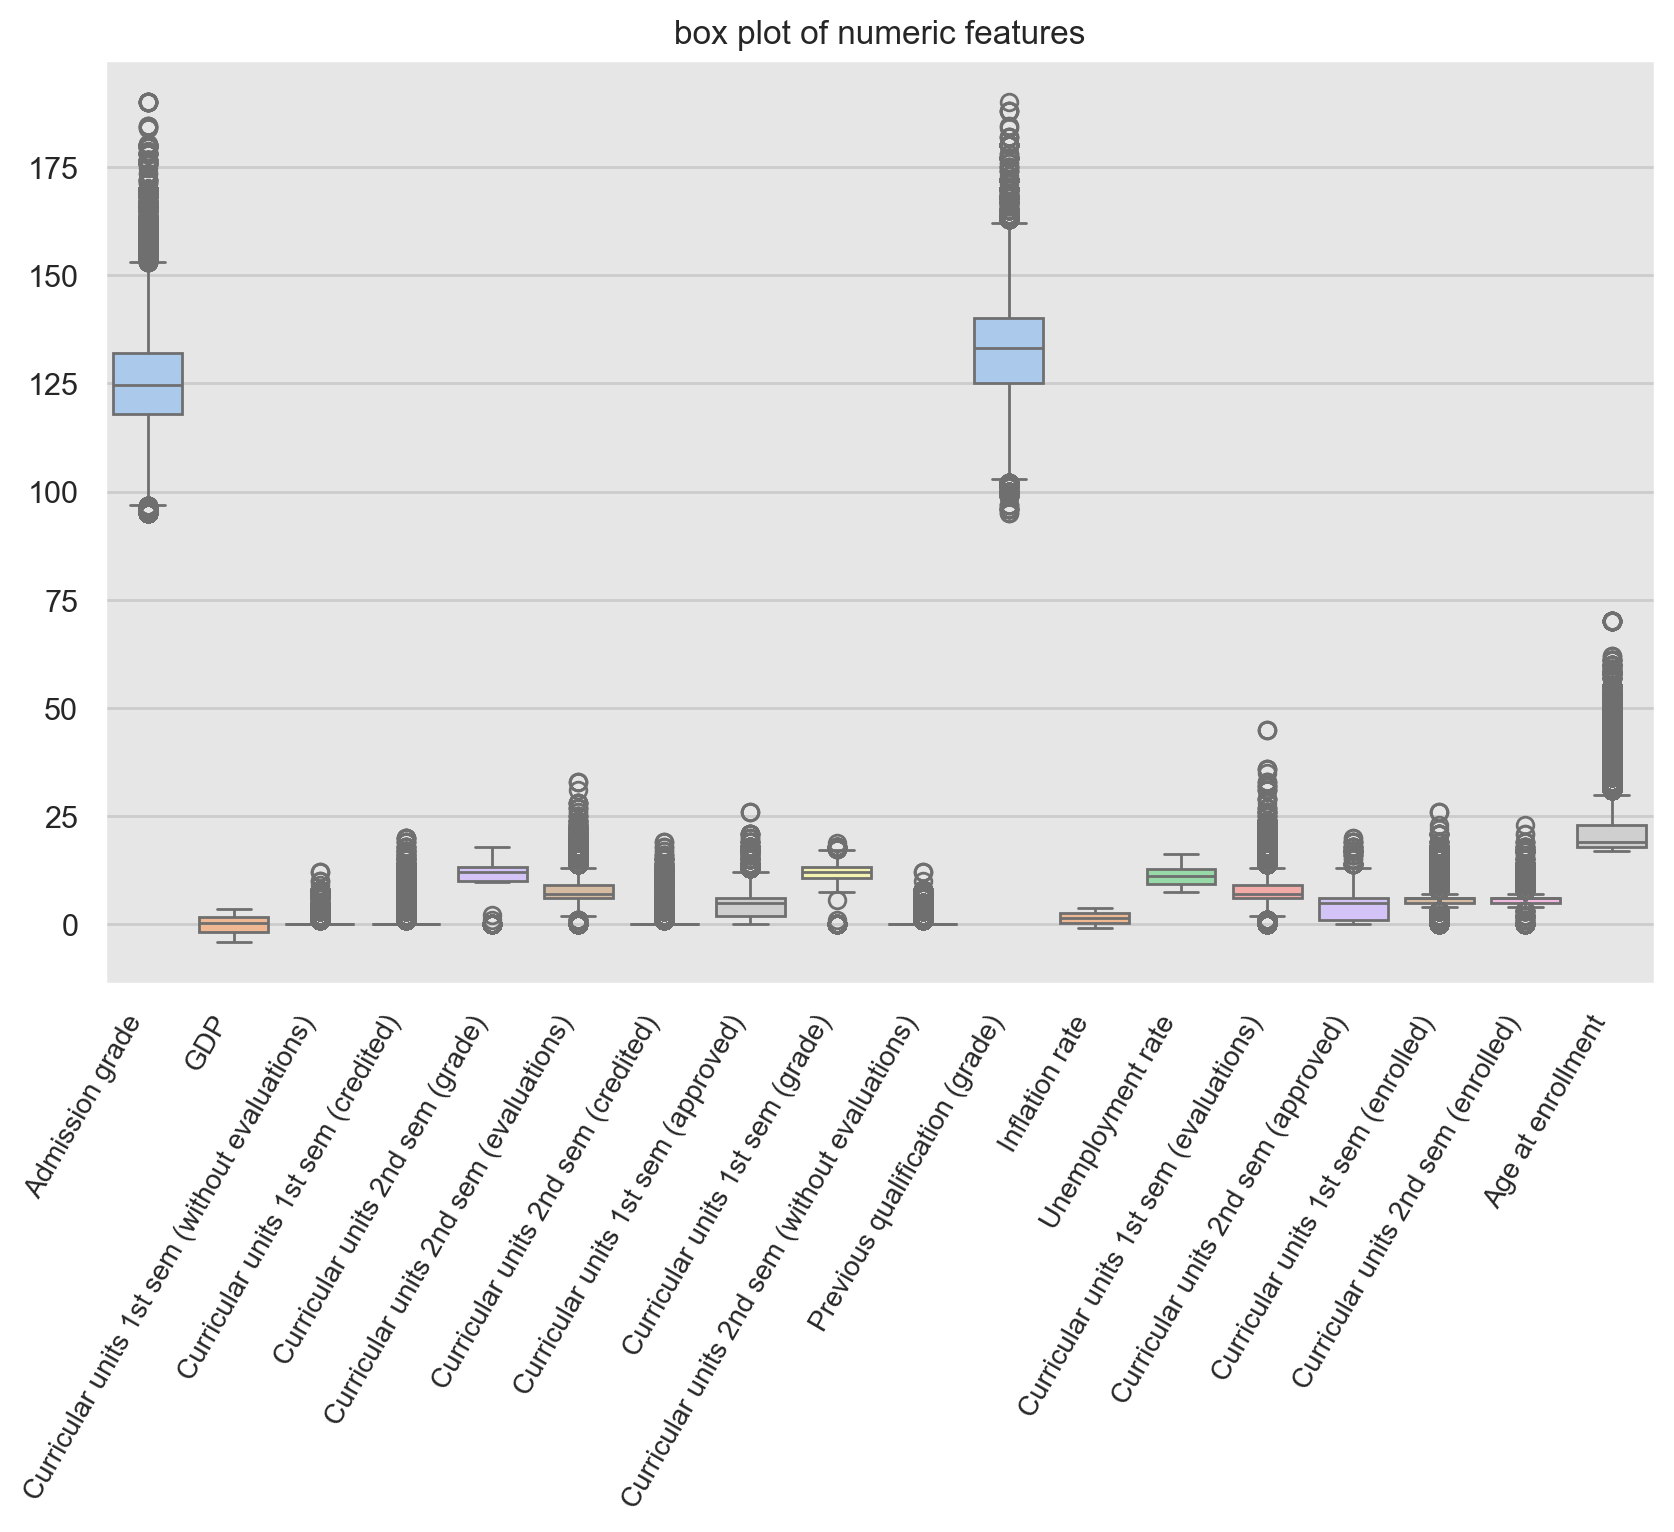

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
g = sns.boxplot(
    data=X[numeric_features],
    palette="pastel",
    ax=ax
)

g.set_xticklabels(labels=numeric_features, rotation=60, fontsize=10, ha="right")
g.set(title="box plot of numeric features");

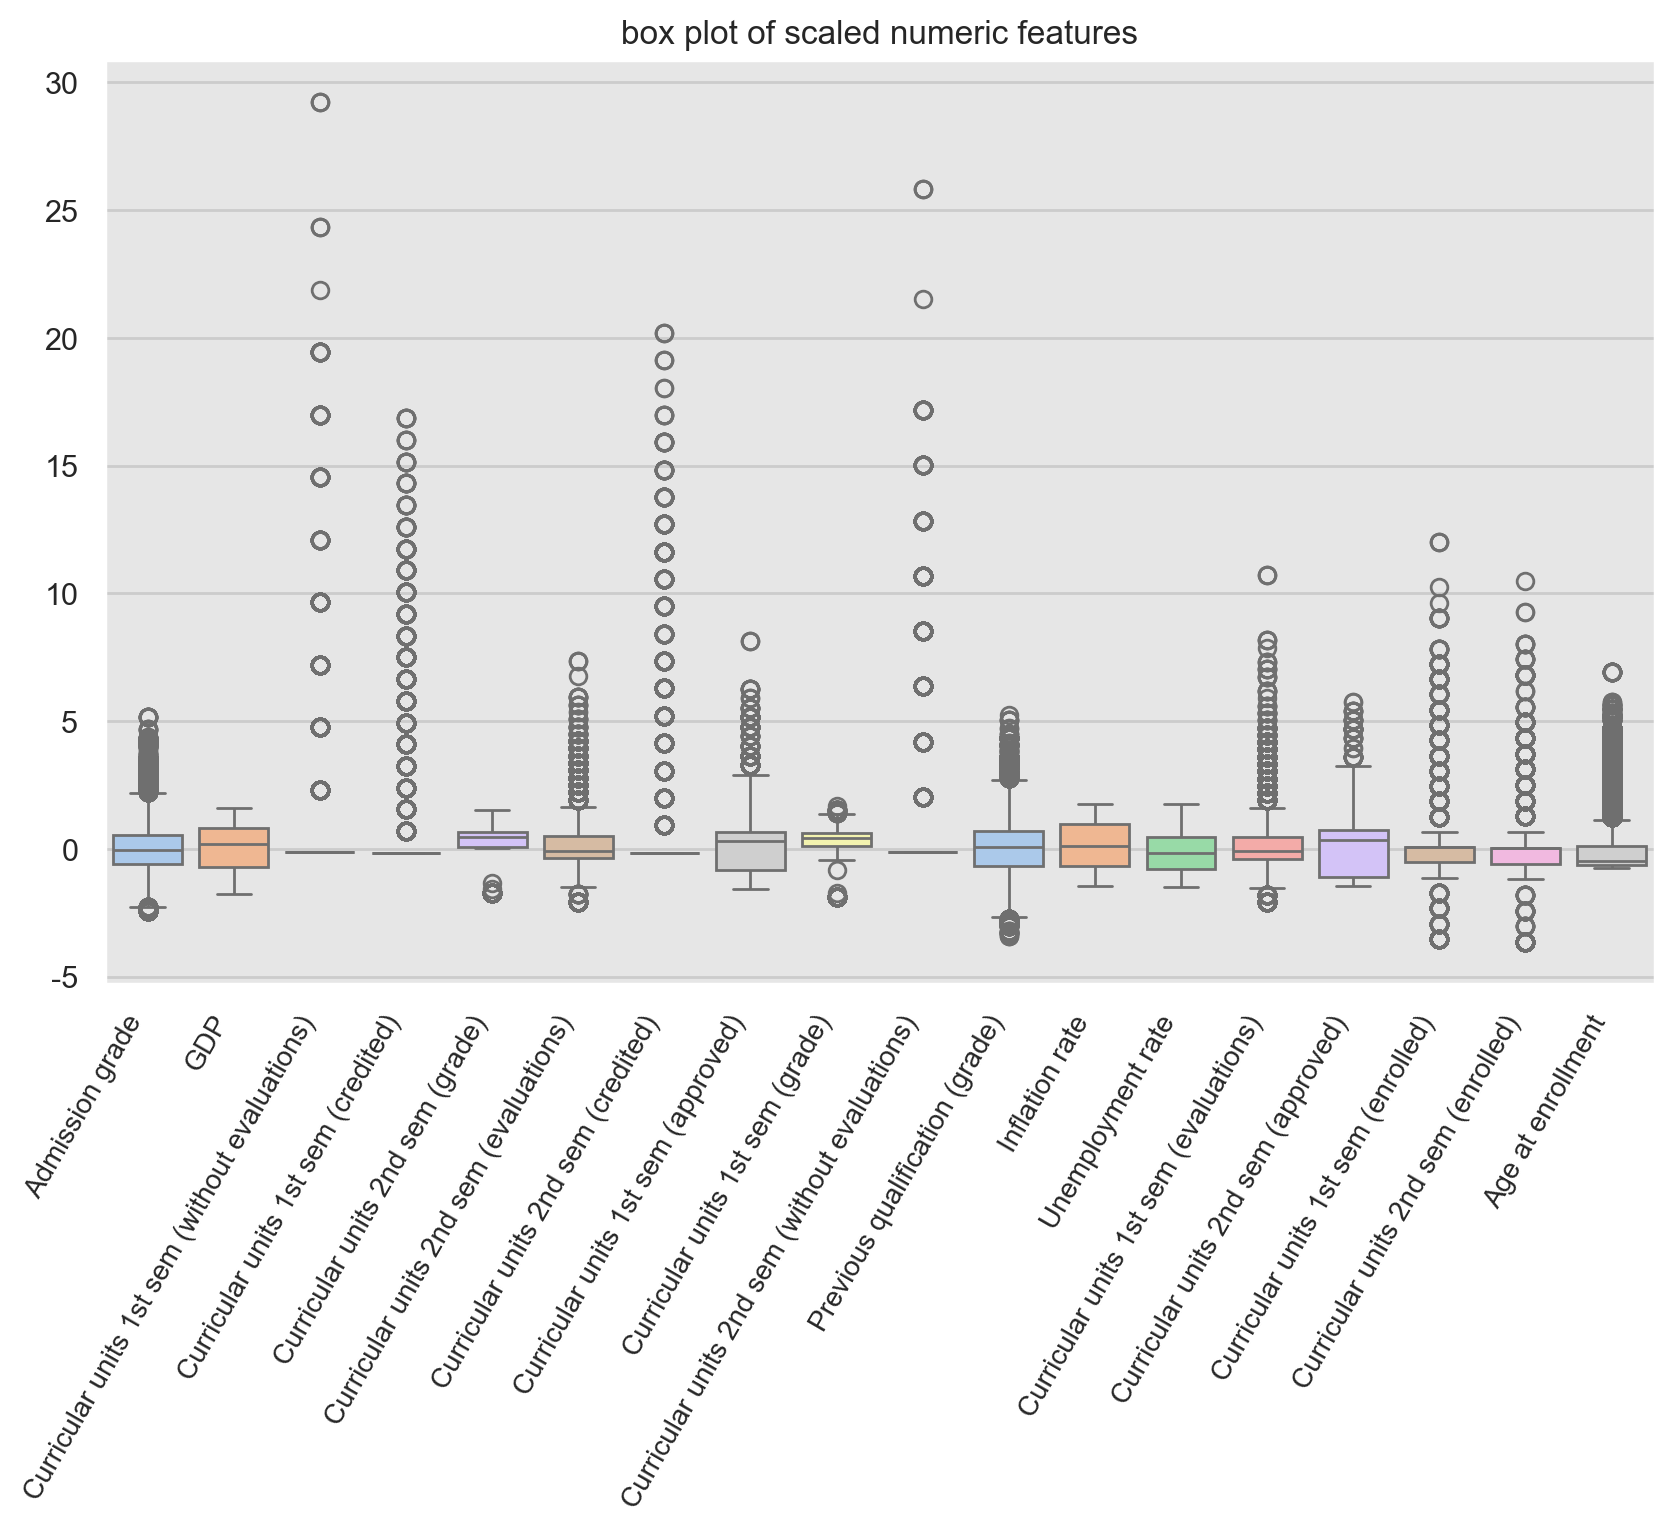

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
g = sns.boxplot(
    data=X_trans[numeric_features],
    palette="pastel",
    ax=ax
)

g.set_xticklabels(labels=numeric_features, rotation=60, fontsize=10, ha="right")
g.set(title="box plot of scaled numeric features");

### numeric, categorical 전처리 방법을 달리하여 모델링 실험
- RandomForestClassifier 모델을 사용하여 예측한 결과 numeric features는 전처리를 하지 않고, categorical features는 ordinal encoding을 한 경우 성능이 더 높고, fitting 시간이 단축되었다.
   - RandomForestClassifier 모델의 모수추정 원리와 데이터의 상태에 따른 결과라고 생각된다.
   - 다른 분류 모델도 모수추정 원리는 다르지만 데이터의 이러한 상태로부터 모델 성능의 향상에 영향을 받는다.

In [37]:
import time

In [38]:
feature_preprocessor.set_params(
    num_transformer=num_transformer["ss"],
    cat_transformer=cat_transformer["onehot"]
)

# onehot encoder를 사용한 경우 변환 된 데이터를 toarray() 속성값을 사용하여 반환 받을 수 있다.
X_trans = feature_preprocessor.fit_transform(X).toarray()
X_trans = pd.DataFrame(X_trans, columns=[c.split("__")[1] for c in feature_preprocessor.get_feature_names_out()])

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_enc, test_size=0.2, random_state=42)

start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=2, criterion="entropy")
rf_clf.fit(X_train, y_train)
end_time = time.time()

y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

print(f'''
* preprocessing: 
   - numeric features : {feature_preprocessor.get_params()["transformers"][0][1].__class__.__name__}
   - categorical features : {feature_preprocessor.get_params()["transformers"][1][1].__class__.__name__}
* fit time : {end_time - start_time : .3f}s   
* train pred : {accuracy_score(y_train, y_pred_train) :.3f}
* test pred  : {accuracy_score(y_test, y_pred_test) : .3f}
''')


* preprocessing: 
   - numeric features : StandardScaler
   - categorical features : OneHotEncoder
* fit time :  4.016s   
* train pred : 0.737
* test pred  :  0.738



In [39]:
feature_preprocessor.set_params(
    num_transformer=num_transformer["mms"],
    cat_transformer=cat_transformer["ordinal"]
)

X_trans = feature_preprocessor.fit_transform(X)
X_trans = pd.DataFrame(X_trans, columns=[c.split("__")[1] for c in feature_preprocessor.get_feature_names_out()])

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_enc, test_size=0.2, random_state=42)

start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=2, criterion="entropy")
rf_clf.fit(X_train, y_train)
end_time = time.time()

y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

print(f'''
* preprocessing : 
   - numeric features : {feature_preprocessor.get_params()["transformers"][0][1].__class__.__name__}
   - categorical features : {feature_preprocessor.get_params()["transformers"][1][1].__class__.__name__}
* fit time : {end_time - start_time : .3f}s   
* train pred : {accuracy_score(y_train, y_pred_train) :.3f}
* test pred  : {accuracy_score(y_test, y_pred_test) : .3f}
''')


* preprocessing : 
   - numeric features : MinMaxScaler
   - categorical features : OrdinalEncoder
* fit time :  1.767s   
* train pred : 0.794
* test pred  :  0.793



### RandomF의 성능 실험
- cross_validate와 model_pipe를 사용하여 성능 실험
   - hyper parameter tunning 없이 기본 적인 매개변수 설정

In [17]:
num_transformer = Pipeline(steps=[
    ("ss", StandardScaler()),
    ("mms", MinMaxScaler()),
    ("non_scaler", "passthrough")
])

# onehot, ordinal encoder의 "handle_unknown" 설정으로 train, test 데이터의 불균형 문제를 해결 할 수 있다.
# onehot encoder에서 sparse_output=False로 설정하면 
cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
    ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
    ("non_encoder", "passthrough"),
    ("drop_cate", "drop")
])

# categorical features를 구별하는 방법으로 features의 이름을 사용하는 것보다, make_column_selector() 함수를 사용하는 것이 범용성이 높은 것 같다. 
feature_preprocessor = ColumnTransformer(
    transformers=[
        ("num_transformer", num_transformer, numeric_features),
        #("cat_transformer", cat_transformer, categorical_features)
        ("cat_transformer", cat_transformer, make_column_selector(dtype_include="category"))
    ], remainder="passthrough"
)

model_link = {
    "randomF": RandomForestClassifier(n_estimators=200, max_depth=3, criterion="entropy")
}

model_pipe = Pipeline(
    steps=[
        ("preprocessor", feature_preprocessor),
        ("model", model_link)
    ]
)

model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler()),
                                                                  ('mms',
                                                                   MinMaxScaler()),
                                                                  ('non_scaler',
                                                                   'passthrough')]),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('non_encoder',
                                                                   'passthrough'),
                                                                  ('drop_cate',
                                                                   'drop')]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                ('model',
                 {'randomF': RandomForestClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    n_estimators=200)})])

In [35]:
def get_cv_result(X, y, model_name=None, num_scaler=None, cate_encoder=None) : 
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=45)
    cv_results = []
    # scaler와 encoder의 조합으로 모델링 실험
    total_start_time = time.time()
    for comb in list(product(num_scaler, cate_encoder)) : 
        model_pipe["preprocessor"].set_params(
            num_transformer=num_transformer[comb[0]], cat_transformer=cat_transformer[comb[1]]
        )
        model_pipe.set_params(model=model_link[model_name])
        
        start_time = time.time()
        cv_result = cross_validate(
            estimator=model_pipe, 
            X=X, 
            y=y, 
            scoring="accuracy", 
            cv=kfold,
            return_train_score=True,
            n_jobs=2,
            error_score='raise'
        )
        end_time = time.time()
        
        cv_results.append(pd.DataFrame({
            "model": model_pipe["model"].__class__.__name__,
            "num_transformer": comb[0],
            "cat_transformer": comb[1],
            "train_score": cv_result["train_score"].mean(),
            "test_score": cv_result["test_score"].mean(),
            "fit_time": end_time - start_time
        }, index=[0]
        ))
    
    result = pd.concat(cv_results, axis=0).sort_values("test_score", ascending=False)
    total_end_time = time.time()
    print(f"total time : {total_end_time - total_start_time : .3f}")
    
    return result

In [46]:
cv_result_df = get_cv_result(model_name="rf")
cv_result_df

model num_transformer cat_transformer  train_score  \
0  RandomForestClassifier              ss         ordinal     0.793607   
0  RandomForestClassifier             mms     non_encoder     0.791957   
0  RandomForestClassifier             mms         ordinal     0.791752   
0  RandomForestClassifier      non_scaler         ordinal     0.791121   
0  RandomForestClassifier              ss     non_encoder     0.790602   
0  RandomForestClassifier      non_scaler     non_encoder     0.790023   
0  RandomForestClassifier             mms          onehot     0.739561   
0  RandomForestClassifier      non_scaler          onehot     0.738277   
0  RandomForestClassifier              ss          onehot     0.737591   

   test_score   fit_time  
0    0.793395  15.053601  
0    0.791500  13.851640  
0    0.791409  15.019085  
0    0.790755  15.691248  
0    0.790285  13.474950  
0    0.789514  13.677180  
0    0.739512  14.698895  
0    0.737696  14.817286  
0    0.737552  15.345757

### ExtraTrees 모델의 성능 실험
- RF 모델과 유사한 ExtraT 모델을 사용하여 성능 실험
   - 과최적화가 발생했다.
   - randomF 모델보다 성능이 다소 증가했다. 
   - 성능 측정 시간이 오래 걸린다.

In [53]:
model_link.update({"extraT": ExtraTreesClassifier()})
model_link

{'randomF': RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200),
 'histGB': HistGradientBoostingClassifier(max_depth=3, max_iter=200, scoring='accuracy'),
 'extraT': ExtraTreesClassifier()}

In [68]:
scaler = ["ss", "mms", "non_scaler"]
encoder = ["onehot", "ordinal", "non_encoder"]

svc_cv_result_df = get_cv_result(model_name="extraT", num_scaler=scaler, cate_encoder=encoder)
svc_cv_result_df

model num_transformer cat_transformer  train_score  \
0  ExtraTreesClassifier             mms     non_encoder          1.0   
0  ExtraTreesClassifier      non_scaler     non_encoder          1.0   
0  ExtraTreesClassifier             mms         ordinal          1.0   
0  ExtraTreesClassifier      non_scaler         ordinal          1.0   
0  ExtraTreesClassifier              ss         ordinal          1.0   
0  ExtraTreesClassifier              ss     non_encoder          1.0   
0  ExtraTreesClassifier      non_scaler          onehot          1.0   
0  ExtraTreesClassifier             mms          onehot          1.0   
0  ExtraTreesClassifier              ss          onehot          1.0   

   test_score    fit_time  
0    0.823009   42.210539  
0    0.822708   42.976707  
0    0.822552   40.365776  
0    0.822395   41.374006  
0    0.822186   40.392106  
0    0.821977   41.297720  
0    0.816200  561.142055  
0    0.816109  541.660863  
0    0.815011  639.485389

### HistGradientBoosting model 을 사용하여 실험
- HGBC 모델은 randomF 보다 성능이 더 좋고, 속도가 빠르다고 알려져 있다.
- GB 모델을 기반으로, LightGBM 모델과 유사하게 만들어 졌다.
- 회귀와 분류 문제에 사용할 수 있다.
- pipeline과 cross_validate에서 모델을 사용할 때 categorical_features 매개변수를 None으로 설정해야 한다.
   - "from_dtype"(feature의 dtype을 사용), ["col1", "col2"](feature의 이름을 사용) 할 수 있으나 pipe line의 전처리 단계에서 encoding을 한 후 모델에 입력 되기 때문에 이 설정을 None으로 해야 실행 된다.
- categorical features를 데이터에서 제외하는 "drop_cate" 추가

In [115]:
model_link.update({
    "histGB": HistGradientBoostingClassifier(max_iter=200, max_depth=3, categorical_features=None, scoring="accuracy")
})
model_link

{'randomF': RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200),
 'histGB': HistGradientBoostingClassifier(max_depth=3, max_iter=200, scoring='accuracy')}

In [117]:
scaler = ["ss", "mms", "non_scaler"]
encoder = ["onehot", "ordinal", "non_encoder", "drop_cate"]

histgb_cv_result_df = get_cv_result(model_name="histGB", num_scaler=scaler, cate_encoder=encoder)
histgb_cv_result_df

total time :  204.970


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier             mms          onehot   
0  HistGradientBoostingClassifier      non_scaler     non_encoder   
0  HistGradientBoostingClassifier              ss         ordinal   
0  HistGradientBoostingClassifier              ss     non_encoder   
0  HistGradientBoostingClassifier      non_scaler         ordinal   
0  HistGradientBoostingClassifier      non_scaler          onehot   
0  HistGradientBoostingClassifier             mms     non_encoder   
0  HistGradientBoostingClassifier              ss          onehot   
0  HistGradientBoostingClassifier             mms         ordinal   
0  HistGradientBoostingClassifier      non_scaler       drop_cate   
0  HistGradientBoostingClassifier              ss       drop_cate   
0  HistGradientBoostingClassifier             mms       drop_cate   

   train_score  test_score   fit_time  
0     0.832343    0.828589  40.766237  
0     0.831608    0.828223  12.562090  
0     0.831288    0.828171  13.198067  
0     0.830762    0.827779  12.866665  
0     0.831442    0.827766  13.311382  
0     0.830448    0.827204  30.438964  
0     0.830475    0.827086  12.941227  
0     0.830720    0.826969  28.841500  
0     0.830269    0.826590  11.492230  
0     0.811646    0.808529   7.948476  
0     0.812351    0.808385  12.100340  
0     0.810767    0.807653   8.488091

### First Submission

In [46]:
model_pipe["preprocessor"].set_params(
    num_transformer=num_transformer["mms"], 
    cat_transformer=cat_transformer["onehot"]
)
model_link.update({
    "histGB": HistGradientBoostingClassifier(max_iter=200, max_depth=3, categorical_features=None, scoring="accuracy")
})
model_pipe.set_params(model=model_link["histGB"])

kfold = KFold(n_splits=5, shuffle=True, random_state=45)
histgb_cv = cross_validate(model_pipe, X, y_enc, cv=kfold, scoring="accuracy", return_train_score=True, n_jobs=2)


print(f'''
* train 
 - acc score : {histgb_cv["train_score"].mean()}
 - acc std : {histgb_cv["train_score"].std()}
 
* test 
 - acc score : {histgb_cv["train_score"].mean()}
 - acc std : {histgb_cv["train_score"].std()}
''')


* train 
 - acc score : 0.8319153857680561
 - acc std : 0.003329182327302682
 
* test 
 - acc score : 0.8319153857680561
 - acc std : 0.003329182327302682



In [48]:
model_pipe.fit(X, y_enc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '...
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Inflation rate',
                                                   'Admission grade',
                                                   'Age at enrollment']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                ('model',
                 HistGradientBoostingClassifier(max_depth=3, max_iter=200,
                                                scoring='accuracy'))])

In [49]:
submission_X = test_df.drop("id", axis=1)
first_submission_pred = model_pipe.predict(submission_X)

submission_df["Target"] = first_submission_pred
target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
submission_df["Target"] = submission_df["Target"].map(target_mapper)
submission_df.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Graduate
4  76522  Enrolled

In [45]:
submission_df.to_csv("./submission/submission_df_0619.csv", index=False)

## HistGB model Hyper parameter Tunning - (1)

In [58]:
model_link.update({"histGB_tunning": HistGradientBoostingClassifier()})
model_pipe.set_params(model=model_link["histGB_tunning"])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '...
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Inflation rate',
                                                   'Admission grade',
                                                   'Age at enrollment']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                ('model', HistGradientBoostingClassifier())])

In [62]:
from sklearn.model_selection import GridSearchCV

In [64]:
%%time

histGB_params = {
    "model__learning_rate": [0.01, 0.1],
    "model__max_iter": [100, 200],
    "model__max_depth": [2, 3, 4],
    "model__l2_regularization": [0.01, 0.1]
}
kfold = KFold(n_splits=5, shuffle=True, random_state=45)
histGB_grid_cv = GridSearchCV(estimator=model_pipe,
                              param_grid=histGB_params, 
                              cv=kfold, 
                              scoring="accuracy", 
                              n_jobs=2,
                              return_train_score=True)
histGB_grid_cv.fit(X, y_enc)

CPU times: total: 23.1 s
Wall time: 20min 39s


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         MinMaxScaler(),
                                                                         ['Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(credited)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(approved)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(...
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                                       ('model',
                                        HistGradientBoostingClassifier())]),
             n_jobs=2,
             param_grid={'model__l2_regularization': [0.01, 0.1],
                         'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [2, 3, 4],
                         'model__max_iter': [100, 200]},
             return_train_score=True, scoring='accuracy')

In [78]:
histGB_grid_cv_result = pd.DataFrame(histGB_grid_cv.cv_results_).sort_values("rank_test_score")
cols = list(histGB_grid_cv_result.filter(regex="^param_model").columns) + ["mean_test_score", "mean_train_score", "std_test_score", "rank_test_score"]
histGB_grid_cv_result[cols][:10]

param_model__l2_regularization param_model__learning_rate  \
23                            0.1                        0.1   
22                            0.1                        0.1   
9                            0.01                        0.1   
11                           0.01                        0.1   
21                            0.1                        0.1   
10                           0.01                        0.1   
20                            0.1                        0.1   
8                            0.01                        0.1   
19                            0.1                        0.1   
7                            0.01                        0.1   

   param_model__max_depth param_model__max_iter  mean_test_score  \
23                      4                   200         0.831896   
22                      4                   100         0.831687   
9                       3                   200         0.831242   
11                      4                   200         0.831033   
21                      3                   200         0.830929   
10                      4                   100         0.830576   
20                      3                   100         0.829596   
8                       3                   100         0.829517   
19                      2                   200         0.829413   
7                       2                   200         0.828929   

    mean_train_score  std_test_score  rank_test_score  
23          0.847467        0.003118                1  
22          0.840309        0.002921                2  
9           0.840070        0.003016                3  
11          0.848849        0.003449                4  
21          0.839237        0.002474                5  
10          0.840361        0.002982                6  
20          0.833761        0.002584                7  
8           0.833915        0.002654                8  
19          0.832196        0.003089                9  
7           0.832487        0.002066               10

### Second submission

In [83]:
%%time

histGB_grid_cv_best_model = histGB_grid_cv.best_estimator_
histGB_grid_cv_best_model.fit(X, y_enc)

CPU times: total: 18.8 s
Wall time: 17.7 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '...
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Inflation rate',
                                                   'Admission grade',
                                                   'Age at enrollment']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F79B099C30>)])),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.1,
                                                max_depth=4, max_iter=200))])

In [96]:
def pred_submission(best_model) : 

    submission_X = test_df.drop("id", axis=1)
    submission_pred = best_model.predict(submission_X)

    submission_df["Target"] = submission_pred
    target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
    submission_df["Target"] = submission_df["Target"].map(target_mapper)
    
    return submission_df

In [100]:
histGB_best_estimator_submission_df = pred_submission(histGB_grid_cv_best_model)
histGB_best_estimator_submission_df.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [101]:
histGB_best_estimator_submission_df.to_csv("./submission/histGB_best_estimator_submission_df.csv", index=False)
os.listdir("./submission")

['histGB_best_estimator_submission_df.csv', 'submission_df_0619.csv']

## HistGB model Hyper parameter Tunning - (2)

In [103]:
model_link.update({"histGB_tunning": HistGradientBoostingClassifier()})
model_pipe.set_params(model=model_link["histGB_tunning"])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '...
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Inflation rate',
                                                   'Admission grade',
                                                   'Age at enrollment']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                ('model', HistGradientBoostingClassifier())])

In [106]:
%%time

histGB_params = {
    "model__learning_rate": [0.1, 0.2],
    "model__max_iter": [100, 200, 300],
    "model__max_depth": [2, 3, 4, 5, 6],
    "model__l2_regularization": [0.1, 0.2]
}
kfold = KFold(n_splits=5, shuffle=True, random_state=45)
histGB_grid_cv_2 = GridSearchCV(estimator=model_pipe,
                              param_grid=histGB_params, 
                              cv=kfold, 
                              scoring="accuracy", 
                              n_jobs=2,
                              return_train_score=True)
histGB_grid_cv_2.fit(X, y_enc)

CPU times: total: 20.2 s
Wall time: 47min 22s


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         MinMaxScaler(),
                                                                         ['Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(credited)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(approved)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(...
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                                       ('model',
                                        HistGradientBoostingClassifier())]),
             n_jobs=2,
             param_grid={'model__l2_regularization': [0.1, 0.2],
                         'model__learning_rate': [0.1, 0.2],
                         'model__max_depth': [2, 3, 4, 5, 6],
                         'model__max_iter': [100, 200, 300]},
             return_train_score=True, scoring='accuracy')

In [107]:
histGB_grid_cv_result_2 = pd.DataFrame(histGB_grid_cv_2.cv_results_).sort_values("rank_test_score")
cols = list(histGB_grid_cv_result_2.filter(regex="^param_model").columns) + ["mean_test_score", "mean_train_score", "std_test_score", "rank_test_score"]
histGB_grid_cv_result_2[cols][:10]

param_model__l2_regularization param_model__learning_rate  \
10                            0.1                        0.1   
13                            0.1                        0.1   
41                            0.2                        0.1   
37                            0.2                        0.1   
44                            0.2                        0.1   
38                            0.2                        0.1   
54                            0.2                        0.2   
14                            0.1                        0.1   
51                            0.2                        0.2   
23                            0.1                        0.2   

   param_model__max_depth param_model__max_iter  mean_test_score  \
10                      5                   200         0.832092   
13                      6                   200         0.832013   
41                      5                   300         0.831935   
37                      4                   200         0.831909   
44                      6                   300         0.831896   
38                      4                   300         0.831870   
54                      5                   100         0.831843   
14                      6                   300         0.831817   
51                      4                   100         0.831791   
23                      4                   300         0.831739   

    mean_train_score  std_test_score  rank_test_score  
10          0.852594        0.003304                1  
13          0.854802        0.004070                2  
41          0.852188        0.003594                3  
37          0.846771        0.003932                4  
44          0.855658        0.002667                5  
38          0.848771        0.003579                6  
54          0.856632        0.002597                7  
14          0.855028        0.003271                8  
51          0.848369        0.003245                9  
23          0.850231        0.002816               10

### third submission

In [108]:
%%time

histGB_grid_cv_best_model_2 = histGB_grid_cv_2.best_estimator_
histGB_grid_cv_best_model_2.fit(X, y_enc)

CPU times: total: 8.7 s
Wall time: 19 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '...
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Inflation rate',
                                                   'Admission grade',
                                                   'Age at enrollment']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F79F4C9990>)])),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.1,
                                                max_depth=5, max_iter=200))])

In [305]:
def save_model(dir_path, save_model, model_name) : 
    
    os.makedirs(dir_path, exist_ok=True)
    full_path = dir_path + "/" + model_name + ".pkl"
    
    pickle.dump(save_model, open(full_path, 'wb'))
    
    # 저장한 모델을 불러온 후 모델의 params의 갯수를 확인
    load_model = pickle.load(open(full_path, "rb"))
    if len(load_model["model"].get_params()) > 1 : 
        print(f"{model_name} save success.")

In [310]:
dir_path = "./build_model"
save_model(dir_path, histGB_grid_cv_best_model_2, "histGB_grid_cv")

histGB_grid_cv save success.


In [311]:
os.listdir(dir_path)

['histGB_grid_cv.pkl']

In [109]:
histGB_best_estimator_submission_df_2 = pred_submission(histGB_grid_cv_best_model_2)
histGB_best_estimator_submission_df_2.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [110]:
histGB_best_estimator_submission_df_2.to_csv("./submission/histGB_best_estimator_submission_df_2.csv", index=False)
os.listdir("./submission")

['histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'submission_df_0619.csv']

### randomF 모델에서 feature importances를 추출하여 새로운 훈련 데이터 생성

In [124]:
model_link.update({"randomF_tunning": RandomForestClassifier()})
model_pipe.set_params(model=model_link["randomF_tunning"])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '...
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Inflation rate',
                                                   'Admission grade',
                                                   'Age at enrollment']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                ('model', RandomForestClassifier())])

In [125]:
%%time

rf_params = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 4, 5, 6],
    #"model__min_samples_split": [i for i in range(2, 8)],
    #"model__min_samples_leaf": [i for i in range(2, 6)],
    "model__criterion": ["entropy"]    
}

kfold = KFold(n_splits=5, shuffle=True, random_state=45)
randomF_grid_cv = GridSearchCV(estimator=model_pipe,
                              param_grid=rf_params, 
                              cv=kfold, 
                              scoring="accuracy", 
                              n_jobs=2,
                              return_train_score=True)

randomF_grid_cv.fit(X, y_enc)

CPU times: total: 18.7 s
Wall time: 7min 15s


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         MinMaxScaler(),
                                                                         ['Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(credited)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(approved)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(...
                                                                        ('cat_transformer',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=2,
             param_grid={'model__criterion': ['entropy'],
                         'model__max_depth': [3, 4, 5, 6],
                         'model__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy')

In [126]:
randomF_grid_cv_result = pd.DataFrame(randomF_grid_cv.cv_results_).sort_values("rank_test_score")
cols = list(randomF_grid_cv_result.filter(regex="^param_model").columns) + ["mean_test_score", "mean_train_score", "std_test_score", "rank_test_score"]
randomF_grid_cv_result[cols][:10]

param_model__criterion param_model__max_depth param_model__n_estimators  \
10                entropy                      6                       200   
9                 entropy                      6                       100   
11                entropy                      6                       300   
7                 entropy                      5                       200   
8                 entropy                      5                       300   
6                 entropy                      5                       100   
3                 entropy                      4                       100   
4                 entropy                      4                       200   
5                 entropy                      4                       300   
2                 entropy                      3                       300   

    mean_test_score  mean_train_score  std_test_score  rank_test_score  
10         0.789017          0.789778        0.004959                1  
9          0.788651          0.789419        0.007211                2  
11         0.788194          0.789533        0.005790                3  
7          0.776575          0.777467        0.006681                4  
8          0.773622          0.774187        0.006909                5  
6          0.771701          0.772341        0.004892                6  
3          0.751823          0.752049        0.005745                7  
4          0.751614          0.752218        0.005325                8  
5          0.750033          0.750771        0.003567                9  
2          0.739186          0.739499        0.003094               10

In [229]:
randomF_grid_cv_feature_importances = randomF_grid_cv.best_estimator_["model"].feature_importances_
onehot_feature_names = [c.split("__")[1] for c in feature_preprocessor.get_feature_names_out()]
randomF_feature_importance_df = pd.DataFrame(randomF_grid_cv_feature_importances, 
                                             index=onehot_feature_names, columns=["feature_importance"])\
                                            .sort_values("feature_importance", ascending=False)

importance_features = randomF_feature_importance_df.query("feature_importance > 0.00001")
importance_features

feature_importance
Curricular units 2nd sem (approved)               0.175679
Curricular units 1st sem (approved)               0.137510
Curricular units 2nd sem (grade)                  0.137003
Curricular units 1st sem (grade)                  0.098888
Curricular units 2nd sem (evaluations)            0.051827
...                                                    ...
Course_9556                                       0.000012
Educational special needs_1                       0.000011
Father's qualification_12                         0.000010
Mother's occupation_1                             0.000010
Application mode_42                               0.000010

[119 rows x 1 columns]

### forth submission

In [230]:
transformed_X = pd.DataFrame(feature_preprocessor.fit_transform(X), columns=onehot_feature_names)
transformed_X_importance_features = transformed_X[importance_features.index]
transformed_X_importance_features.shape

(76518, 119)

In [255]:
histGB_grid_cv_best_model_2["model"].fit(transformed_X_importance_features, y_enc)

HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=5, max_iter=200)

In [299]:
submission_X = test_df.copy()
submission_X = submission_X.drop("id", axis=1)
submission_X[categorical_features] = submission_X[categorical_features].astype("category")
transformed_submission_X = pd.DataFrame(feature_preprocessor.fit_transform(submission_X), 
                                         columns=[c.split("__")[1] for c in feature_preprocessor.get_feature_names_out()])
transformed_submission_X_importance_features = transformed_submission_X[importance_features.index]
transformed_submission_X_importance_features.shape

(51012, 119)

In [303]:
submission_pred = histGB_grid_cv_best_model_2["model"].predict(transformed_submission_X_importance_features)
submission_df["Target"] = submission_pred
target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
submission_df["Target"] = submission_df["Target"].map(target_mapper)
histGB_best_estimator_feature_importances_119 = submission_df
histGB_best_estimator_feature_importances_119.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Graduate
4  76522  Enrolled

In [304]:
histGB_best_estimator_feature_importances_119.to_csv("./submission/histGB_best_estimator_feature_importance_119.csv", index=False)
os.listdir("./submission")

['histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'submission_df_0619.csv']

### feature importances 갯수 변경

In [317]:
importance_features_2 = randomF_feature_importance_df.query("feature_importance > 0.0001")
importance_features_2

feature_importance
Curricular units 2nd sem (approved)               0.175679
Curricular units 1st sem (approved)               0.137510
Curricular units 2nd sem (grade)                  0.137003
Curricular units 1st sem (grade)                  0.098888
Curricular units 2nd sem (evaluations)            0.051827
...                                                    ...
Application mode_43                               0.000178
Previous qualification_9                          0.000132
Course_9070                                       0.000127
Mother's occupation_9                             0.000107
Course_9130                                       0.000102

[70 rows x 1 columns]

In [315]:
def pred_submission_feature_importance(model, importance_features) : 
    
    # feature importances 데이터로 모델 fitting
    transformed_X = pd.DataFrame(feature_preprocessor.fit_transform(X), columns=onehot_feature_names)
    transformed_X_importance_features = transformed_X[importance_features]
    model.fit(transformed_X_importance_features, y_enc)
    
    # submission 데이터를 전처리 후 feature importances 로 인덱싱
    submission_X = test_df.copy()
    submission_X = submission_X.drop("id", axis=1)
    submission_X[categorical_features] = submission_X[categorical_features].astype("category")
    transformed_submission_X = pd.DataFrame(feature_preprocessor.fit_transform(submission_X), 
                                             columns=[c.split("__")[1] for c in feature_preprocessor.get_feature_names_out()])
    transformed_submission_X_importance_features = transformed_submission_X[importance_features]
    
    # fitted 된 model로 transformed 된 submission 데이터를 예측
    submission_pred = histGB_grid_cv_best_model_2["model"].predict(transformed_submission_X_importance_features)
    submission_df["Target"] = submission_pred
    target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
    submission_df["Target"] = submission_df["Target"].map(target_mapper)
    
    return submission_df

In [318]:
histGB_best_estimator_feature_importances_70 = pred_submission_feature_importance(histGB_grid_cv_best_model_2["model"],
                                                                                  importance_features_2.index)
histGB_best_estimator_feature_importances_70.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Graduate
4  76522  Enrolled

In [319]:
histGB_best_estimator_feature_importances_70.to_csv("./submission/histGB_best_estimator_feature_importances_70.csv", index=False)
os.listdir("./submission")

['histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'submission_df_0619.csv']